## Base de dados iris

A base de dados pode ser encontrada [aqui](https://archive.ics.uci.edu/ml/datasets/iris).
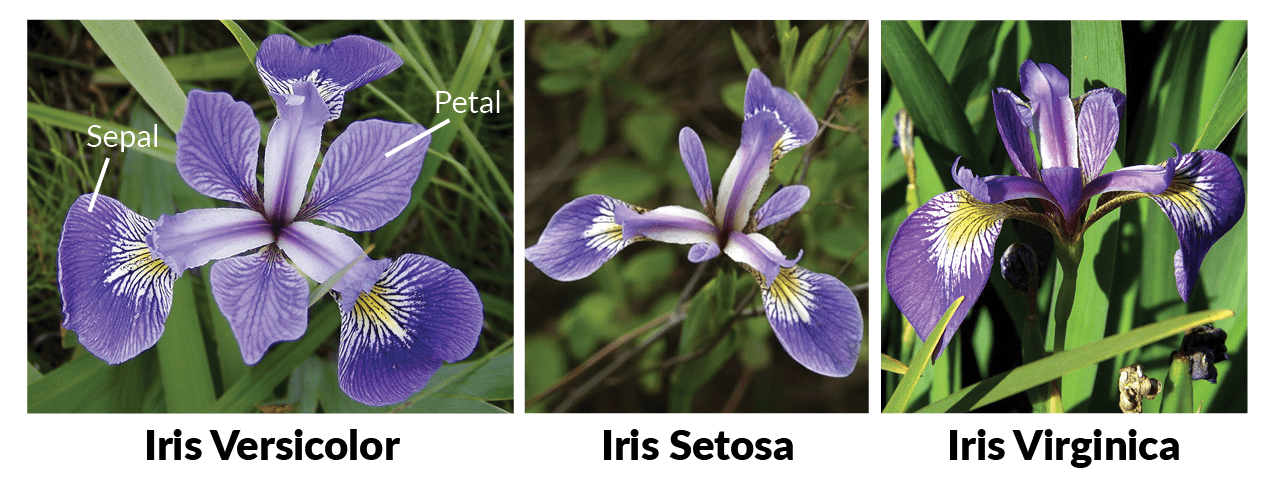

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Temos 5 colunas presentes no dataset fornecido, sendo quatro delas variáveis características (dados de entrada) e uma delas uma variável-alvo (que queremos que o nosso modelo seja capaz de prever).

As variáveis características são:

    sepal length       - Comprimento 'sepal'
    sepal width        - Largura 'sepal'
    petal length       - Comprimento 'petal'
    petal width        - Largura 'petal'

A variável-alvo é:

    class    - um tipo *softmax* que indica a classe da iris: 
            iris-versicolor
            Iris-virginica
            Iris-setosa 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


É possivel observar que todas as variáveis são do tipo ``float64`` (números "decimais") exceto a variável-alvo que é do tipo ``object``.

nós precisaremos realizar a transformação do tipo "object" para o tipo númerico.

A função ``describe()`` gera várias informações sobre as variáveis numéricas que também podem ser úteis:

In [5]:
df.describe()

sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [6]:
df['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

Podemos observar que todos os nossos dados estão balanceados.

###### Separando os previsores e a classe

In [7]:
previsores = df.iloc[:, 0:4].values
classe = df.iloc[:, 4].values

#### Encontrando dados faltantes (NaN)
Nosso dataset não possui valores faltantes como diz no site UCI, mas por via das dúvidas:

In [8]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

Como esperado, não temos valores faltantes :D

###### Transformação dos dados de saída de categórico para númerico

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lbe = LabelEncoder()

In [11]:
classe = lbe.fit_transform(classe)
classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

###### Importações
Para isso, utilizaremos a biblioteca ``keras``

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

#### Redes Neurais Artificiais
O objetivo do algoritmo de Redes neurais é imitar o sistema nervoso de humanos no processo de aprendizagem, ela é inspirada nas redes neurais biológicas
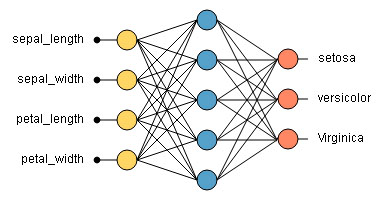

###### Parâmetros da rede neural artificial:
Link: https://keras.io/

    Sequential - Criação de uma nova rede neural
    Dense - Todos os neurônios conectados
    units - Quantidade de neurônios que fazem parte da camada oculta
    activation - Função de ativação que será inserida
    input_dim - quantos elementos existem na camada de entrada
    Dropout - é usado para diminuir a chance de overfitting (20% dos neurônios de entrada são zerados)
   
Ponto de partida para o paramêtro ``units`` - número de entradas(4) +  número de saidas(3) / 2 = 3.5 (arrendodamos para 4)

In [13]:
def criar_rede():
    rn = Sequential()
    # Camada inicial
    rn.add(Dense(units = 4, activation = 'relu', input_dim = 4))
    # Camada oculta
    rn.add(Dense(units = 4, activation = 'relu'))
    # Camada de saída (softmax utilizada para 3 ou mais saídas)
    rn.add(Dense(units = 3, activation = 'softmax'))
    # Configurações
    rn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])
    return rn

###### Parâmetros da criação da rede

    build_fn - Função de criação da rede neural
    epochs - quantidade de vezes que será feito o ajuste dos pesos
    batch_size - cálculo de erro a cada 10 registros

###### Parâmetros da validação cruzada

    estimator - Função de criação da rede neural
    X - Atributos previsores
    y - Classe de saída
    cv - Quantidade de vezes do teste (10 divisões na base de dados)
    scoring - retorno dos resultados

In [14]:
classifier = KerasClassifier(build_fn = criar_rede, epochs = 1000, batch_size = 10)

In [15]:
resultados = cross_val_score(estimator = classifier, X = previsores, y = classe, cv = 10, scoring = 'accuracy')
media = resultados.mean()
desvio = resultados.std()

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14/14 [==============================] - 0s 1ms/step - loss: 3.9594 - categorical_accuracy: 0.3704
Epoch 2/1000
14/14 [==============================] - 0s 1ms/step - loss: 3.5066 - categorical_accuracy: 0.3704
Epoch 3/1000
14/14 [==============================] - 0s 1ms/step - loss: 3.1333 - categorical_accuracy: 0.3704
Epoch 4/1000
14/14 [======================

14/14 [==============================] - 0s 929us/step - loss: 0.9916 - categorical_accuracy: 0.3704
Epoch 66/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9888 - categorical_accuracy: 0.3704
Epoch 67/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9866 - categorical_accuracy: 0.3704
Epoch 68/1000
14/14 [==============================] - 0s 929us/step - loss: 0.9839 - categorical_accuracy: 0.3704
Epoch 69/1000
14/14 [==============================] - 0s 929us/step - loss: 0.9813 - categorical_accuracy: 0.3704
Epoch 70/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9793 - categorical_accuracy: 0.3704
Epoch 71/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9773 - categorical_accuracy: 0.3704
Epoch 72/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9734 - categorical_accuracy: 0.3704
Epoch 73/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9699 - categorical_accuracy

14/14 [==============================] - 0s 858us/step - loss: 0.6442 - categorical_accuracy: 0.6667
Epoch 138/1000
14/14 [==============================] - 0s 929us/step - loss: 0.6410 - categorical_accuracy: 0.6519
Epoch 139/1000
14/14 [==============================] - 0s 858us/step - loss: 0.6375 - categorical_accuracy: 0.6519
Epoch 140/1000
14/14 [==============================] - 0s 929us/step - loss: 0.6329 - categorical_accuracy: 0.6593
Epoch 141/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6306 - categorical_accuracy: 0.6815
Epoch 142/1000
14/14 [==============================] - 0s 929us/step - loss: 0.6265 - categorical_accuracy: 0.6815
Epoch 143/1000
14/14 [==============================] - 0s 929us/step - loss: 0.6234 - categorical_accuracy: 0.6815
Epoch 144/1000
14/14 [==============================] - 0s 929us/step - loss: 0.6204 - categorical_accuracy: 0.6815
Epoch 145/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6169 - cate

14/14 [==============================] - 0s 929us/step - loss: 0.4657 - categorical_accuracy: 0.8963
Epoch 209/1000
14/14 [==============================] - 0s 858us/step - loss: 0.4637 - categorical_accuracy: 0.9037
Epoch 210/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4629 - categorical_accuracy: 0.9259
Epoch 211/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4597 - categorical_accuracy: 0.9185
Epoch 212/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4572 - categorical_accuracy: 0.9111
Epoch 213/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4552 - categorical_accuracy: 0.9037
Epoch 214/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4536 - categorical_accuracy: 0.8963
Epoch 215/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4514 - categorical_accuracy: 0.8741
Epoch 216/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4494 - categorical_ac

14/14 [==============================] - 0s 858us/step - loss: 0.3199 - categorical_accuracy: 0.9556
Epoch 280/1000
14/14 [==============================] - 0s 929us/step - loss: 0.3190 - categorical_accuracy: 0.9630
Epoch 281/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3161 - categorical_accuracy: 0.9704
Epoch 282/1000
14/14 [==============================] - 0s 929us/step - loss: 0.3148 - categorical_accuracy: 0.9556
Epoch 283/1000
14/14 [==============================] - 0s 858us/step - loss: 0.3122 - categorical_accuracy: 0.9630
Epoch 284/1000
14/14 [==============================] - 0s 929us/step - loss: 0.3104 - categorical_accuracy: 0.9630
Epoch 285/1000
14/14 [==============================] - 0s 929us/step - loss: 0.3086 - categorical_accuracy: 0.9556
Epoch 286/1000
14/14 [==============================] - 0s 929us/step - loss: 0.3069 - categorical_accuracy: 0.9556
Epoch 287/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3051 - cate

14/14 [==============================] - 0s 1ms/step - loss: 0.2072 - categorical_accuracy: 0.9704
Epoch 351/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2052 - categorical_accuracy: 0.9704
Epoch 352/1000
14/14 [==============================] - 0s 929us/step - loss: 0.2043 - categorical_accuracy: 0.9704
Epoch 353/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2051 - categorical_accuracy: 0.9704
Epoch 354/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2027 - categorical_accuracy: 0.9630
Epoch 355/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2008 - categorical_accuracy: 0.9704
Epoch 356/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1991 - categorical_accuracy: 0.9704
Epoch 357/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1995 - categorical_accuracy: 0.9630
Epoch 358/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1972 - categorical_ac

14/14 [==============================] - 0s 929us/step - loss: 0.1392 - categorical_accuracy: 0.9704
Epoch 422/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1380 - categorical_accuracy: 0.9704
Epoch 423/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1401 - categorical_accuracy: 0.9704
Epoch 424/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1372 - categorical_accuracy: 0.9704
Epoch 425/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1394 - categorical_accuracy: 0.9630
Epoch 426/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1375 - categorical_accuracy: 0.9630
Epoch 427/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1350 - categorical_accuracy: 0.9778
Epoch 428/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1341 - categorical_accuracy: 0.9704
Epoch 429/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1339 - categorica

14/14 [==============================] - 0s 1ms/step - loss: 0.1034 - categorical_accuracy: 0.9778
Epoch 493/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1032 - categorical_accuracy: 0.9704
Epoch 494/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1035 - categorical_accuracy: 0.9778
Epoch 495/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1030 - categorical_accuracy: 0.9704
Epoch 496/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1019 - categorical_accuracy: 0.9704
Epoch 497/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1024 - categorical_accuracy: 0.9704
Epoch 498/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1011 - categorical_accuracy: 0.9778
Epoch 499/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1007 - categorical_accuracy: 0.9704
Epoch 500/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1004 - categorica

14/14 [==============================] - 0s 1ms/step - loss: 0.0838 - categorical_accuracy: 0.9704
Epoch 564/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0844 - categorical_accuracy: 0.9704
Epoch 565/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0836 - categorical_accuracy: 0.9704
Epoch 566/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0832 - categorical_accuracy: 0.9704
Epoch 567/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0841 - categorical_accuracy: 0.9704
Epoch 568/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0832 - categorical_accuracy: 0.9704
Epoch 569/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0828 - categorical_accuracy: 0.9704
Epoch 570/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0827 - categorical_accuracy: 0.9704
Epoch 571/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0833 - categorica

14/14 [==============================] - 0s 1ms/step - loss: 0.0735 - categorical_accuracy: 0.9852
Epoch 635/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0716 - categorical_accuracy: 0.9778
Epoch 636/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0730 - categorical_accuracy: 0.9704
Epoch 637/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0727 - categorical_accuracy: 0.9778
Epoch 638/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0720 - categorical_accuracy: 0.9704
Epoch 639/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0726 - categorical_accuracy: 0.9778
Epoch 640/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0724 - categorical_accuracy: 0.9778
Epoch 641/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0713 - categorical_accuracy: 0.9778
Epoch 642/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0717 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0658 - categorical_accuracy: 0.9852
Epoch 706/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0658 - categorical_accuracy: 0.9778
Epoch 707/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0656 - categorical_accuracy: 0.9704
Epoch 708/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0653 - categorical_accuracy: 0.9704
Epoch 709/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0651 - categorical_accuracy: 0.9778
Epoch 710/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0652 - categorical_accuracy: 0.9778
Epoch 711/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0649 - categorical_accuracy: 0.9852
Epoch 712/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0651 - categorical_accuracy: 0.9852
Epoch 713/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0650 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.0606 - categorical_accuracy: 0.9852
Epoch 777/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0610 - categorical_accuracy: 0.9778
Epoch 778/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0605 - categorical_accuracy: 0.9778
Epoch 779/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0606 - categorical_accuracy: 0.9852
Epoch 780/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0603 - categorical_accuracy: 0.9852
Epoch 781/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0608 - categorical_accuracy: 0.9778
Epoch 782/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0613 - categorical_accuracy: 0.9778
Epoch 783/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0602 - categorical_accuracy: 0.9852
Epoch 784/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0612 - categorical_accu

14/14 [==============================] - 0s 929us/step - loss: 0.0572 - categorical_accuracy: 0.9852
Epoch 848/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0570 - categorical_accuracy: 0.9852
Epoch 849/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0588 - categorical_accuracy: 0.9704
Epoch 850/1000
14/14 [==============================] - 0s 715us/step - loss: 0.0574 - categorical_accuracy: 0.9778
Epoch 851/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0575 - categorical_accuracy: 0.9852
Epoch 852/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0586 - categorical_accuracy: 0.9852
Epoch 853/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0585 - categorical_accuracy: 0.9778
Epoch 854/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0566 - categorical_accuracy: 0.9852
Epoch 855/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0572 - categorica

14/14 [==============================] - 0s 1ms/step - loss: 0.0552 - categorical_accuracy: 0.9852
Epoch 919/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0549 - categorical_accuracy: 0.9852
Epoch 920/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0549 - categorical_accuracy: 0.9852
Epoch 921/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0551 - categorical_accuracy: 0.9852
Epoch 922/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0550 - categorical_accuracy: 0.9852
Epoch 923/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0550 - categorical_accuracy: 0.9852
Epoch 924/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0543 - categorical_accuracy: 0.9852
Epoch 925/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0549 - categorical_accuracy: 0.9852
Epoch 926/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0547 - categorical_accura

14/14 [==============================] - 0s 929us/step - loss: 0.0529 - categorical_accuracy: 0.9852
Epoch 990/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0527 - categorical_accuracy: 0.9852
Epoch 991/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0527 - categorical_accuracy: 0.9852
Epoch 992/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0534 - categorical_accuracy: 0.9852
Epoch 993/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0525 - categorical_accuracy: 0.9852
Epoch 994/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0524 - categorical_accuracy: 0.9852
Epoch 995/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0528 - categorical_accuracy: 0.9852
Epoch 996/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0529 - categorical_accuracy: 0.9852
Epoch 997/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0531 - categorical_

14/14 [==============================] - 0s 1ms/step - loss: 0.6875 - categorical_accuracy: 0.7926
Epoch 40/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6781 - categorical_accuracy: 0.7259
Epoch 41/1000
14/14 [==============================] - 0s 929us/step - loss: 0.6687 - categorical_accuracy: 0.8000
Epoch 42/1000
14/14 [==============================] - 0s 858us/step - loss: 0.6592 - categorical_accuracy: 0.8593
Epoch 43/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6497 - categorical_accuracy: 0.8667
Epoch 44/1000
14/14 [==============================] - 0s 858us/step - loss: 0.6409 - categorical_accuracy: 0.8519
Epoch 45/1000
14/14 [==============================] - 0s 929us/step - loss: 0.6321 - categorical_accuracy: 0.8963
Epoch 46/1000
14/14 [==============================] - 0s 929us/step - loss: 0.6222 - categorical_accuracy: 0.8815
Epoch 47/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6142 - categorical_accu

14/14 [==============================] - 0s 929us/step - loss: 0.2908 - categorical_accuracy: 0.9556
Epoch 112/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2903 - categorical_accuracy: 0.9556
Epoch 113/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2852 - categorical_accuracy: 0.9630
Epoch 114/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2754 - categorical_accuracy: 0.9704
Epoch 115/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2702 - categorical_accuracy: 0.9630
Epoch 116/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2668 - categorical_accuracy: 0.9630
Epoch 117/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2629 - categorical_accuracy: 0.9630
Epoch 118/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2657 - categorical_accuracy: 0.9556
Epoch 119/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2518 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.1263 - categorical_accuracy: 0.9630
Epoch 183/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1273 - categorical_accuracy: 0.9630
Epoch 184/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1255 - categorical_accuracy: 0.9556
Epoch 185/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1278 - categorical_accuracy: 0.9556
Epoch 186/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1233 - categorical_accuracy: 0.9704
Epoch 187/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1228 - categorical_accuracy: 0.9630
Epoch 188/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1246 - categorical_accuracy: 0.9630
Epoch 189/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1219 - categorical_accuracy: 0.9630
Epoch 190/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1198 - categorical_

14/14 [==============================] - 0s 2ms/step - loss: 0.0932 - categorical_accuracy: 0.9630
Epoch 254/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0936 - categorical_accuracy: 0.9630
Epoch 255/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0946 - categorical_accuracy: 0.9630
Epoch 256/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0955 - categorical_accuracy: 0.9704
Epoch 257/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0917 - categorical_accuracy: 0.9630
Epoch 258/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0956 - categorical_accuracy: 0.9630
Epoch 259/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0931 - categorical_accuracy: 0.9556
Epoch 260/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0914 - categorical_accuracy: 0.9630
Epoch 261/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0910 - categorical_accura

14/14 [==============================] - 0s 786us/step - loss: 0.0853 - categorical_accuracy: 0.9704
Epoch 325/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0798 - categorical_accuracy: 0.9630
Epoch 326/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0834 - categorical_accuracy: 0.9630
Epoch 327/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0827 - categorical_accuracy: 0.9704
Epoch 328/1000
14/14 [==============================] - 0s 786us/step - loss: 0.0842 - categorical_accuracy: 0.9556
Epoch 329/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0818 - categorical_accuracy: 0.9704
Epoch 330/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0836 - categorical_accuracy: 0.9556
Epoch 331/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0800 - categorical_accuracy: 0.9630
Epoch 332/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0817 - ca

14/14 [==============================] - 0s 1ms/step - loss: 0.0761 - categorical_accuracy: 0.9630
Epoch 396/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0779 - categorical_accuracy: 0.9704
Epoch 397/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0729 - categorical_accuracy: 0.9630
Epoch 398/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0747 - categorical_accuracy: 0.9630
Epoch 399/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0740 - categorical_accuracy: 0.9630
Epoch 400/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0759 - categorical_accuracy: 0.9630
Epoch 401/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0738 - categorical_accuracy: 0.9630
Epoch 402/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0735 - categorical_accuracy: 0.9630
Epoch 403/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0776 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0701 - categorical_accuracy: 0.9630
Epoch 467/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0681 - categorical_accuracy: 0.9630
Epoch 468/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0722 - categorical_accuracy: 0.9704
Epoch 469/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0746 - categorical_accuracy: 0.9630
Epoch 470/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0753 - categorical_accuracy: 0.9630
Epoch 471/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0689 - categorical_accuracy: 0.9630
Epoch 472/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0737 - categorical_accuracy: 0.9704
Epoch 473/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0736 - categorical_accuracy: 0.9556
Epoch 474/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0699 - categorical_accura

14/14 [==============================] - 0s 929us/step - loss: 0.0696 - categorical_accuracy: 0.9630
Epoch 538/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0650 - categorical_accuracy: 0.9704
Epoch 539/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0673 - categorical_accuracy: 0.9704
Epoch 540/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0777 - categorical_accuracy: 0.9556
Epoch 541/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0599 - categorical_accuracy: 0.9704
Epoch 542/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0692 - categorical_accuracy: 0.9778
Epoch 543/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0665 - categorical_accuracy: 0.9630
Epoch 544/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0654 - categorical_accuracy: 0.9630
Epoch 545/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0647 - categorical_accu

14/14 [==============================] - 0s 929us/step - loss: 0.0627 - categorical_accuracy: 0.9852
Epoch 609/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0637 - categorical_accuracy: 0.9630
Epoch 610/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0630 - categorical_accuracy: 0.9630
Epoch 611/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0619 - categorical_accuracy: 0.9630
Epoch 612/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0629 - categorical_accuracy: 0.9630
Epoch 613/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0668 - categorical_accuracy: 0.9704
Epoch 614/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0660 - categorical_accuracy: 0.9630
Epoch 615/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0618 - categorical_accuracy: 0.9630
Epoch 616/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0622 - categorical_ac

14/14 [==============================] - 0s 1ms/step - loss: 0.0633 - categorical_accuracy: 0.9704
Epoch 680/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0651 - categorical_accuracy: 0.9704
Epoch 681/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0622 - categorical_accuracy: 0.9630
Epoch 682/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0622 - categorical_accuracy: 0.9704
Epoch 683/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0605 - categorical_accuracy: 0.9852
Epoch 684/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0615 - categorical_accuracy: 0.9704
Epoch 685/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0609 - categorical_accuracy: 0.9630
Epoch 686/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0609 - categorical_accuracy: 0.9778
Epoch 687/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0628 - categorical_accu

14/14 [==============================] - 0s 929us/step - loss: 0.0593 - categorical_accuracy: 0.9852
Epoch 751/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0606 - categorical_accuracy: 0.9852
Epoch 752/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0623 - categorical_accuracy: 0.9630
Epoch 753/1000
14/14 [==============================] - 0s 786us/step - loss: 0.0623 - categorical_accuracy: 0.9778
Epoch 754/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0695 - categorical_accuracy: 0.9630
Epoch 755/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0668 - categorical_accuracy: 0.9778
Epoch 756/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0559 - categorical_accuracy: 0.9778
Epoch 757/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0608 - categorical_accuracy: 0.9704
Epoch 758/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0637 - catego

14/14 [==============================] - 0s 1ms/step - loss: 0.0603 - categorical_accuracy: 0.9630
Epoch 822/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0600 - categorical_accuracy: 0.9778
Epoch 823/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0630 - categorical_accuracy: 0.9704
Epoch 824/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0575 - categorical_accuracy: 0.9852
Epoch 825/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0566 - categorical_accuracy: 0.9852
Epoch 826/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0670 - categorical_accuracy: 0.9630
Epoch 827/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0640 - categorical_accuracy: 0.9778
Epoch 828/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0576 - categorical_accuracy: 0.9852
Epoch 829/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0644 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0576 - categorical_accuracy: 0.9852
Epoch 893/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0579 - categorical_accuracy: 0.9704
Epoch 894/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0557 - categorical_accuracy: 0.9852
Epoch 895/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0583 - categorical_accuracy: 0.9852
Epoch 896/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0586 - categorical_accuracy: 0.9630
Epoch 897/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0566 - categorical_accuracy: 0.9630
Epoch 898/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0609 - categorical_accuracy: 0.9852
Epoch 899/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0568 - categorical_accuracy: 0.9852
Epoch 900/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0570 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0566 - categorical_accuracy: 0.9778
Epoch 964/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0617 - categorical_accuracy: 0.9778
Epoch 965/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0574 - categorical_accuracy: 0.9778
Epoch 966/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0612 - categorical_accuracy: 0.9630
Epoch 967/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0609 - categorical_accuracy: 0.9778
Epoch 968/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0540 - categorical_accuracy: 0.9704
Epoch 969/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0569 - categorical_accuracy: 0.9704
Epoch 970/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0588 - categorical_accuracy: 0.9630
Epoch 971/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0591 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.9851 - categorical_accuracy: 0.4296
Epoch 19/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9675 - categorical_accuracy: 0.4296
Epoch 20/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9505 - categorical_accuracy: 0.4741
Epoch 21/1000
14/14 [==============================] - 0s 786us/step - loss: 0.9363 - categorical_accuracy: 0.5556
Epoch 22/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9173 - categorical_accuracy: 0.6148
Epoch 23/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.8997 - categorical_accuracy: 0.6222
Epoch 24/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.8844 - categorical_accuracy: 0.6296
Epoch 25/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.8698 - categorical_accuracy: 0.6296
Epoch 26/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.8547 - categorical_accuracy: 0.

14/14 [==============================] - 0s 1ms/step - loss: 0.3095 - categorical_accuracy: 0.9481
Epoch 91/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3039 - categorical_accuracy: 0.9630
Epoch 92/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2985 - categorical_accuracy: 0.9630
Epoch 93/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2942 - categorical_accuracy: 0.9630
Epoch 94/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2911 - categorical_accuracy: 0.9630
Epoch 95/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2848 - categorical_accuracy: 0.9630
Epoch 96/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2818 - categorical_accuracy: 0.9630
Epoch 97/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2785 - categorical_accuracy: 0.9704
Epoch 98/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2721 - categorical_accuracy: 0.94

14/14 [==============================] - 0s 1ms/step - loss: 0.1272 - categorical_accuracy: 0.9704
Epoch 162/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1267 - categorical_accuracy: 0.9630
Epoch 163/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1240 - categorical_accuracy: 0.9630
Epoch 164/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1238 - categorical_accuracy: 0.9778
Epoch 165/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1240 - categorical_accuracy: 0.9630
Epoch 166/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1223 - categorical_accuracy: 0.9704
Epoch 167/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1207 - categorical_accuracy: 0.9704
Epoch 168/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1201 - categorical_accuracy: 0.9778
Epoch 169/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1197 - categorical_ac

14/14 [==============================] - 0s 1ms/step - loss: 0.0907 - categorical_accuracy: 0.9704
Epoch 233/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0894 - categorical_accuracy: 0.9704
Epoch 234/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0894 - categorical_accuracy: 0.9704
Epoch 235/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0895 - categorical_accuracy: 0.9704
Epoch 236/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0892 - categorical_accuracy: 0.9778
Epoch 237/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0882 - categorical_accuracy: 0.9704
Epoch 238/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0970 - categorical_accuracy: 0.9556
Epoch 239/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0907 - categorical_accuracy: 0.9704
Epoch 240/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0876 - categorical_accura

14/14 [==============================] - 0s 858us/step - loss: 0.0727 - categorical_accuracy: 0.9704
Epoch 304/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0736 - categorical_accuracy: 0.9704
Epoch 305/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0729 - categorical_accuracy: 0.9704
Epoch 306/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0725 - categorical_accuracy: 0.9704
Epoch 307/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0727 - categorical_accuracy: 0.9704
Epoch 308/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0738 - categorical_accuracy: 0.9704
Epoch 309/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0748 - categorical_accuracy: 0.9704
Epoch 310/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0733 - categorical_accuracy: 0.9704
Epoch 311/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0738 - categorica

14/14 [==============================] - 0s 858us/step - loss: 0.0679 - categorical_accuracy: 0.9704
Epoch 375/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0654 - categorical_accuracy: 0.9704
Epoch 376/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0657 - categorical_accuracy: 0.9704
Epoch 377/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0658 - categorical_accuracy: 0.9704
Epoch 378/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0655 - categorical_accuracy: 0.9704
Epoch 379/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0663 - categorical_accuracy: 0.9704
Epoch 380/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0673 - categorical_accuracy: 0.9704
Epoch 381/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0649 - categorical_accuracy: 0.9704
Epoch 382/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0655 - cate

14/14 [==============================] - 0s 1ms/step - loss: 0.0610 - categorical_accuracy: 0.9704
Epoch 446/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0630 - categorical_accuracy: 0.9704
Epoch 447/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0616 - categorical_accuracy: 0.9704
Epoch 448/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0624 - categorical_accuracy: 0.9704
Epoch 449/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0614 - categorical_accuracy: 0.9704
Epoch 450/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0614 - categorical_accuracy: 0.9704
Epoch 451/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0626 - categorical_accuracy: 0.9704
Epoch 452/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0621 - categorical_accuracy: 0.9704
Epoch 453/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0631 - categorical_

14/14 [==============================] - 0s 1ms/step - loss: 0.0628 - categorical_accuracy: 0.9704
Epoch 517/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0595 - categorical_accuracy: 0.9704
Epoch 518/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0582 - categorical_accuracy: 0.9704
Epoch 519/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0582 - categorical_accuracy: 0.9704
Epoch 520/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0583 - categorical_accuracy: 0.9704
Epoch 521/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0608 - categorical_accuracy: 0.9704
Epoch 522/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0589 - categorical_accuracy: 0.9704
Epoch 523/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0581 - categorical_accuracy: 0.9704
Epoch 524/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0582 - categorical_accu

Epoch 588/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0547 - categorical_accuracy: 0.9704
Epoch 589/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0572 - categorical_accuracy: 0.9778
Epoch 590/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0569 - categorical_accuracy: 0.9778
Epoch 591/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0571 - categorical_accuracy: 0.9778
Epoch 592/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0557 - categorical_accuracy: 0.9704
Epoch 593/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0571 - categorical_accuracy: 0.9778
Epoch 594/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0554 - categorical_accuracy: 0.9778
Epoch 595/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0570 - categorical_accuracy: 0.9704
Epoch 596/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0561 - cat

14/14 [==============================] - 0s 1ms/step - loss: 0.0552 - categorical_accuracy: 0.9778
Epoch 660/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0542 - categorical_accuracy: 0.9704
Epoch 661/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0561 - categorical_accuracy: 0.9704
Epoch 662/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0555 - categorical_accuracy: 0.9704
Epoch 663/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0542 - categorical_accuracy: 0.9778
Epoch 664/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0562 - categorical_accuracy: 0.9778
Epoch 665/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0569 - categorical_accuracy: 0.9778
Epoch 666/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0550 - categorical_accuracy: 0.9704
Epoch 667/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0551 - categorical_accura

Epoch 731/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0530 - categorical_accuracy: 0.9778
Epoch 732/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0532 - categorical_accuracy: 0.9778
Epoch 733/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0545 - categorical_accuracy: 0.9704
Epoch 734/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0551 - categorical_accuracy: 0.9704
Epoch 735/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0528 - categorical_accuracy: 0.9852
Epoch 736/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0522 - categorical_accuracy: 0.9852
Epoch 737/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0522 - categorical_accuracy: 0.9852
Epoch 738/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0520 - categorical_accuracy: 0.9852
Epoch 739/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0523 - cat

14/14 [==============================] - 0s 2ms/step - loss: 0.0521 - categorical_accuracy: 0.9852
Epoch 803/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0525 - categorical_accuracy: 0.9852
Epoch 804/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0532 - categorical_accuracy: 0.9778
Epoch 805/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0529 - categorical_accuracy: 0.9852
Epoch 806/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0537 - categorical_accuracy: 0.9778
Epoch 807/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0515 - categorical_accuracy: 0.9778
Epoch 808/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0512 - categorical_accuracy: 0.9778
Epoch 809/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0528 - categorical_accuracy: 0.9778
Epoch 810/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0513 - categorical_accura

Epoch 874/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0521 - categorical_accuracy: 0.9778
Epoch 875/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0504 - categorical_accuracy: 0.9852
Epoch 876/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0512 - categorical_accuracy: 0.9852
Epoch 877/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0519 - categorical_accuracy: 0.9852
Epoch 878/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0499 - categorical_accuracy: 0.9852
Epoch 879/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0517 - categorical_accuracy: 0.9778
Epoch 880/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0508 - categorical_accuracy: 0.9778
Epoch 881/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0502 - categorical_accuracy: 0.9852
Epoch 882/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0522 - cat

14/14 [==============================] - 0s 1ms/step - loss: 0.0495 - categorical_accuracy: 0.9852
Epoch 946/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0492 - categorical_accuracy: 0.9852
Epoch 947/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0490 - categorical_accuracy: 0.9852
Epoch 948/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0490 - categorical_accuracy: 0.9852
Epoch 949/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0526 - categorical_accuracy: 0.9778
Epoch 950/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0490 - categorical_accuracy: 0.9852
Epoch 951/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0494 - categorical_accuracy: 0.9852
Epoch 952/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0487 - categorical_accuracy: 0.9852
Epoch 953/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0490 - categorical_accura

14/14 [==============================] - 0s 858us/step - loss: 1.0122 - categorical_accuracy: 0.4593
Epoch 2/1000
14/14 [==============================] - 0s 929us/step - loss: 0.9439 - categorical_accuracy: 0.6667
Epoch 3/1000
14/14 [==============================] - 0s 929us/step - loss: 0.8858 - categorical_accuracy: 0.7037
Epoch 4/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.8423 - categorical_accuracy: 0.7037
Epoch 5/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.8048 - categorical_accuracy: 0.7037
Epoch 6/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.7705 - categorical_accuracy: 0.7037
Epoch 7/1000
14/14 [==============================] - 0s 1000us/step - loss: 0.7384 - categorical_accuracy: 0.7037
Epoch 8/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.7114 - categorical_accuracy: 0.7037
Epoch 9/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6850 - categorical_accuracy: 0.7

14/14 [==============================] - 0s 1ms/step - loss: 0.3029 - categorical_accuracy: 0.9556
Epoch 74/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2976 - categorical_accuracy: 0.9630
Epoch 75/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2944 - categorical_accuracy: 0.9407
Epoch 76/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2913 - categorical_accuracy: 0.9556
Epoch 77/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2897 - categorical_accuracy: 0.9630
Epoch 78/1000
14/14 [==============================] - 0s 929us/step - loss: 0.2842 - categorical_accuracy: 0.9630
Epoch 79/1000
14/14 [==============================] - 0s 858us/step - loss: 0.2814 - categorical_accuracy: 0.9556
Epoch 80/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2782 - categorical_accuracy: 0.9630
Epoch 81/1000
14/14 [==============================] - 0s 929us/step - loss: 0.2780 - categorical_accuracy

14/14 [==============================] - 0s 1ms/step - loss: 0.1461 - categorical_accuracy: 0.9778
Epoch 145/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1414 - categorical_accuracy: 0.9704
Epoch 146/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1412 - categorical_accuracy: 0.9778
Epoch 147/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1398 - categorical_accuracy: 0.9778
Epoch 148/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1392 - categorical_accuracy: 0.9704
Epoch 149/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1381 - categorical_accuracy: 0.9778
Epoch 150/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1360 - categorical_accuracy: 0.9704
Epoch 151/1000
14/14 [==============================] - 0s 858us/step - loss: 0.1364 - categorical_accuracy: 0.9704
Epoch 152/1000
14/14 [==============================] - 0s 858us/step - loss: 0.1336 - catego

14/14 [==============================] - 0s 786us/step - loss: 0.0951 - categorical_accuracy: 0.9778
Epoch 216/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0961 - categorical_accuracy: 0.9704
Epoch 217/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0949 - categorical_accuracy: 0.9704
Epoch 218/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0946 - categorical_accuracy: 0.9704
Epoch 219/1000
14/14 [==============================] - 0s 829us/step - loss: 0.0943 - categorical_accuracy: 0.9778
Epoch 220/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0938 - categorical_accuracy: 0.9704
Epoch 221/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0941 - categorical_accuracy: 0.9704
Epoch 222/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0941 - categorical_accuracy: 0.9778
Epoch 223/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0930 - categorical_ac

14/14 [==============================] - 0s 1ms/step - loss: 0.0811 - categorical_accuracy: 0.9704
Epoch 287/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0805 - categorical_accuracy: 0.9704
Epoch 288/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0788 - categorical_accuracy: 0.9704
Epoch 289/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0781 - categorical_accuracy: 0.9704
Epoch 290/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0786 - categorical_accuracy: 0.9704
Epoch 291/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0787 - categorical_accuracy: 0.9704
Epoch 292/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0792 - categorical_accuracy: 0.9704
Epoch 293/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0777 - categorical_accuracy: 0.9704
Epoch 294/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0802 - categorical_accu

14/14 [==============================] - 0s 929us/step - loss: 0.0704 - categorical_accuracy: 0.9778
Epoch 358/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0705 - categorical_accuracy: 0.9778
Epoch 359/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0729 - categorical_accuracy: 0.9630
Epoch 360/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0702 - categorical_accuracy: 0.9704
Epoch 361/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0719 - categorical_accuracy: 0.9630
Epoch 362/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0700 - categorical_accuracy: 0.9778
Epoch 363/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0708 - categorical_accuracy: 0.9778
Epoch 364/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0705 - categorical_accuracy: 0.9778
Epoch 365/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0709 - cate

14/14 [==============================] - 0s 2ms/step - loss: 0.0668 - categorical_accuracy: 0.9704
Epoch 429/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0683 - categorical_accuracy: 0.9704
Epoch 430/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0716 - categorical_accuracy: 0.9778
Epoch 431/1000
14/14 [==============================] - 0s 717us/step - loss: 0.0731 - categorical_accuracy: 0.9704
Epoch 432/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0676 - categorical_accuracy: 0.9778
Epoch 433/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0687 - categorical_accuracy: 0.9852
Epoch 434/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0660 - categorical_accuracy: 0.9704
Epoch 435/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0661 - categorical_accuracy: 0.9704
Epoch 436/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0665 - categorical_a

14/14 [==============================] - 0s 786us/step - loss: 0.0640 - categorical_accuracy: 0.9852
Epoch 500/1000
14/14 [==============================] - 0s 431us/step - loss: 0.0643 - categorical_accuracy: 0.9778
Epoch 501/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0667 - categorical_accuracy: 0.9778
Epoch 502/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0642 - categorical_accuracy: 0.9704
Epoch 503/1000
14/14 [==============================] - 0s 786us/step - loss: 0.0635 - categorical_accuracy: 0.9704
Epoch 504/1000
14/14 [==============================] - 0s 786us/step - loss: 0.0635 - categorical_accuracy: 0.9704
Epoch 505/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0627 - categorical_accuracy: 0.9704
Epoch 506/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0635 - categorical_accuracy: 0.9778
Epoch 507/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0656 - categorical_

14/14 [==============================] - 0s 1ms/step - loss: 0.0611 - categorical_accuracy: 0.9852
Epoch 571/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0632 - categorical_accuracy: 0.9704
Epoch 572/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0617 - categorical_accuracy: 0.9778
Epoch 573/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0610 - categorical_accuracy: 0.9704
Epoch 574/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0621 - categorical_accuracy: 0.9704
Epoch 575/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0642 - categorical_accuracy: 0.9778
Epoch 576/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0679 - categorical_accuracy: 0.9630
Epoch 577/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0617 - categorical_accuracy: 0.9778
Epoch 578/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0623 - categorical_ac

14/14 [==============================] - 0s 858us/step - loss: 0.0601 - categorical_accuracy: 0.9778
Epoch 642/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0636 - categorical_accuracy: 0.9704
Epoch 643/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0593 - categorical_accuracy: 0.9778
Epoch 644/1000
14/14 [==============================] - 0s 786us/step - loss: 0.0602 - categorical_accuracy: 0.9852
Epoch 645/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0601 - categorical_accuracy: 0.9778
Epoch 646/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0608 - categorical_accuracy: 0.9778
Epoch 647/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0606 - categorical_accuracy: 0.9704
Epoch 648/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0620 - categorical_accuracy: 0.9704
Epoch 649/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0601 - categori

14/14 [==============================] - 0s 1ms/step - loss: 0.0613 - categorical_accuracy: 0.9704
Epoch 713/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0583 - categorical_accuracy: 0.9778
Epoch 714/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0604 - categorical_accuracy: 0.9852
Epoch 715/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0612 - categorical_accuracy: 0.9852
Epoch 716/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0586 - categorical_accuracy: 0.9704
Epoch 717/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0612 - categorical_accuracy: 0.9778
Epoch 718/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0595 - categorical_accuracy: 0.9778
Epoch 719/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0603 - categorical_accuracy: 0.9778
Epoch 720/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0592 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0620 - categorical_accuracy: 0.9852
Epoch 784/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0586 - categorical_accuracy: 0.9852
Epoch 785/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0591 - categorical_accuracy: 0.9852
Epoch 786/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0618 - categorical_accuracy: 0.9704
Epoch 787/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0586 - categorical_accuracy: 0.9778
Epoch 788/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0617 - categorical_accuracy: 0.9852
Epoch 789/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0594 - categorical_accuracy: 0.9852
Epoch 790/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0578 - categorical_accuracy: 0.9778
Epoch 791/1000
14/14 [==============================] - 0s 786us/step - loss: 0.0582 - categorical_accur

14/14 [==============================] - 0s 0s/step - loss: 0.0578 - categorical_accuracy: 0.9778
Epoch 855/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0565 - categorical_accuracy: 0.9778
Epoch 856/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0609 - categorical_accuracy: 0.9778
Epoch 857/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0609 - categorical_accuracy: 0.9704
Epoch 858/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0577 - categorical_accuracy: 0.9778
Epoch 859/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0579 - categorical_accuracy: 0.9778
Epoch 860/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0609 - categorical_accuracy: 0.9852
Epoch 861/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0616 - categorical_accuracy: 0.9704
Epoch 862/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0584 - categorical_accuracy: 

14/14 [==============================] - 0s 1ms/step - loss: 0.0580 - categorical_accuracy: 0.9704
Epoch 926/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0569 - categorical_accuracy: 0.9778
Epoch 927/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0569 - categorical_accuracy: 0.9852 
Epoch 928/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0564 - categorical_accuracy: 0.9778
Epoch 929/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0575 - categorical_accuracy: 0.9704
Epoch 930/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0625 - categorical_accuracy: 0.9852
Epoch 931/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0684 - categorical_accuracy: 0.9704
Epoch 932/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0579 - categorical_accuracy: 0.9704
Epoch 933/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0606 - categorical_accuracy: 0

14/14 [==============================] - 0s 858us/step - loss: 0.0556 - categorical_accuracy: 0.9778
Epoch 998/1000
14/14 [==============================] - 0s 786us/step - loss: 0.0581 - categorical_accuracy: 0.9852
Epoch 999/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0553 - categorical_accuracy: 0.9852
Epoch 1000/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0622 - categorical_accuracy: 0.9704
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warnin

14/14 [==============================] - 0s 1ms/step - loss: 0.5592 - categorical_accuracy: 0.7407
Epoch 53/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5492 - categorical_accuracy: 0.7407
Epoch 54/1000
14/14 [==============================] - 0s 858us/step - loss: 0.5377 - categorical_accuracy: 0.7407
Epoch 55/1000
14/14 [==============================] - 0s 858us/step - loss: 0.5280 - categorical_accuracy: 0.7407
Epoch 56/1000
14/14 [==============================] - 0s 858us/step - loss: 0.5190 - categorical_accuracy: 0.7407
Epoch 57/1000
14/14 [==============================] - 0s 574us/step - loss: 0.5102 - categorical_accuracy: 0.7407
Epoch 58/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5016 - categorical_accuracy: 0.7407
Epoch 59/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4936 - categorical_accuracy: 0.7407
Epoch 60/1000
14/14 [==============================] - 0s 0s/step - loss: 0.4866 - categorical_accurac

14/14 [==============================] - 0s 1ms/step - loss: 0.3532 - categorical_accuracy: 0.7704
Epoch 125/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3513 - categorical_accuracy: 0.7630
Epoch 126/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3512 - categorical_accuracy: 0.7704
Epoch 127/1000
14/14 [==============================] - 0s 858us/step - loss: 0.3502 - categorical_accuracy: 0.7704
Epoch 128/1000
14/14 [==============================] - 0s 786us/step - loss: 0.3484 - categorical_accuracy: 0.7630
Epoch 129/1000
14/14 [==============================] - 0s 786us/step - loss: 0.3473 - categorical_accuracy: 0.7704
Epoch 130/1000
14/14 [==============================] - 0s 360us/step - loss: 0.3470 - categorical_accuracy: 0.7704
Epoch 131/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3457 - categorical_accuracy: 0.7704
Epoch 132/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3445 - categorica

14/14 [==============================] - 0s 858us/step - loss: 0.2600 - categorical_accuracy: 0.9407
Epoch 196/1000
14/14 [==============================] - 0s 858us/step - loss: 0.2585 - categorical_accuracy: 0.9481
Epoch 197/1000
14/14 [==============================] - 0s 858us/step - loss: 0.2575 - categorical_accuracy: 0.9481
Epoch 198/1000
14/14 [==============================] - 0s 858us/step - loss: 0.2556 - categorical_accuracy: 0.9333
Epoch 199/1000
14/14 [==============================] - 0s 789us/step - loss: 0.2536 - categorical_accuracy: 0.9259
Epoch 200/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2524 - categorical_accuracy: 0.9259
Epoch 201/1000
14/14 [==============================] - 0s 786us/step - loss: 0.2497 - categorical_accuracy: 0.9407
Epoch 202/1000
14/14 [==============================] - 0s 858us/step - loss: 0.2482 - categorical_accuracy: 0.9481
Epoch 203/1000
14/14 [==============================] - 0s 786us/step - loss: 0.2467 - ca

14/14 [==============================] - 0s 1ms/step - loss: 0.1531 - categorical_accuracy: 0.9852
Epoch 267/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1512 - categorical_accuracy: 0.9852
Epoch 268/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1505 - categorical_accuracy: 0.9852
Epoch 269/1000
14/14 [==============================] - 0s 0s/step - loss: 0.1488 - categorical_accuracy: 0.9852
Epoch 270/1000
14/14 [==============================] - 0s 0s/step - loss: 0.1484 - categorical_accuracy: 0.9852
Epoch 271/1000
14/14 [==============================] - 0s 0s/step - loss: 0.1465 - categorical_accuracy: 0.9852
Epoch 272/1000
14/14 [==============================] - 0s 0s/step - loss: 0.1449 - categorical_accuracy: 0.9852
Epoch 273/1000
14/14 [==============================] - 0s 0s/step - loss: 0.1452 - categorical_accuracy: 0.9852
Epoch 274/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1446 - categorical_accuracy: 0

14/14 [==============================] - 0s 929us/step - loss: 0.0929 - categorical_accuracy: 0.9852
Epoch 338/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0925 - categorical_accuracy: 0.9852
Epoch 339/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0924 - categorical_accuracy: 0.9852
Epoch 340/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0922 - categorical_accuracy: 0.9852
Epoch 341/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0910 - categorical_accuracy: 0.9852
Epoch 342/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0902 - categorical_accuracy: 0.9852
Epoch 343/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0919 - categorical_accuracy: 0.9852
Epoch 344/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0898 - categorical_accuracy: 0.9852
Epoch 345/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0888 - categorical_

14/14 [==============================] - 0s 1ms/step - loss: 0.0659 - categorical_accuracy: 0.9926
Epoch 409/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0660 - categorical_accuracy: 0.9926
Epoch 410/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0653 - categorical_accuracy: 0.9926
Epoch 411/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0653 - categorical_accuracy: 0.9926
Epoch 412/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0649 - categorical_accuracy: 0.9926
Epoch 413/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0651 - categorical_accuracy: 0.9926
Epoch 414/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0655 - categorical_accuracy: 0.9852
Epoch 415/1000
14/14 [==============================] - 0s 0s/step - loss: 0.0640 - categorical_accuracy: 0.9926
Epoch 416/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0641 - categorical_accurac

14/14 [==============================] - 0s 2ms/step - loss: 0.0539 - categorical_accuracy: 0.9926
Epoch 480/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0537 - categorical_accuracy: 0.9926
Epoch 481/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0535 - categorical_accuracy: 0.9926
Epoch 482/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0535 - categorical_accuracy: 0.9926
Epoch 483/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0541 - categorical_accuracy: 0.9926
Epoch 484/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0545 - categorical_accuracy: 0.9926
Epoch 485/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0564 - categorical_accuracy: 0.9926
Epoch 486/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0526 - categorical_accuracy: 0.9926
Epoch 487/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0538 - categorica

14/14 [==============================] - 0s 1ms/step - loss: 0.0501 - categorical_accuracy: 0.9852
Epoch 551/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0497 - categorical_accuracy: 0.9852
Epoch 552/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0479 - categorical_accuracy: 0.9926
Epoch 553/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0475 - categorical_accuracy: 0.9926
Epoch 554/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0480 - categorical_accuracy: 0.9926
Epoch 555/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0480 - categorical_accuracy: 0.9926
Epoch 556/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0476 - categorical_accuracy: 0.9926
Epoch 557/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0485 - categorical_accuracy: 0.9926
Epoch 558/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0480 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0450 - categorical_accuracy: 0.9926
Epoch 622/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0448 - categorical_accuracy: 0.9926
Epoch 623/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0443 - categorical_accuracy: 0.9926
Epoch 624/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0457 - categorical_accuracy: 0.9926
Epoch 625/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0443 - categorical_accuracy: 0.9926
Epoch 626/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0441 - categorical_accuracy: 0.9852
Epoch 627/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0447 - categorical_accuracy: 0.9852
Epoch 628/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0445 - categorical_accuracy: 0.9852
Epoch 629/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0438 - categorical_accura

14/14 [==============================] - 0s 2ms/step - loss: 0.0427 - categorical_accuracy: 0.9926
Epoch 693/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0431 - categorical_accuracy: 0.9852
Epoch 694/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0428 - categorical_accuracy: 0.9926
Epoch 695/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0436 - categorical_accuracy: 0.9852
Epoch 696/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0435 - categorical_accuracy: 0.9926
Epoch 697/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0431 - categorical_accuracy: 0.9926
Epoch 698/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0433 - categorical_accuracy: 0.9926
Epoch 699/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0432 - categorical_accuracy: 0.9926
Epoch 700/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0432 - categorical_accura

Epoch 764/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0420 - categorical_accuracy: 0.9926
Epoch 765/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0425 - categorical_accuracy: 0.9926
Epoch 766/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0441 - categorical_accuracy: 0.9852
Epoch 767/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0434 - categorical_accuracy: 0.9852
Epoch 768/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0416 - categorical_accuracy: 0.9926
Epoch 769/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0420 - categorical_accuracy: 0.9926
Epoch 770/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0418 - categorical_accuracy: 0.9852
Epoch 771/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0423 - categorical_accuracy: 0.9852
Epoch 772/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0417 - cat

14/14 [==============================] - 0s 1ms/step - loss: 0.0419 - categorical_accuracy: 0.9852
Epoch 836/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0409 - categorical_accuracy: 0.9926
Epoch 837/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0416 - categorical_accuracy: 0.9926
Epoch 838/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0407 - categorical_accuracy: 0.9926
Epoch 839/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0406 - categorical_accuracy: 0.9852
Epoch 840/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0406 - categorical_accuracy: 0.9852
Epoch 841/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0426 - categorical_accuracy: 0.9852
Epoch 842/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0408 - categorical_accuracy: 0.9852
Epoch 843/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0406 - categorical_accura

Epoch 907/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0401 - categorical_accuracy: 0.9852
Epoch 908/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0408 - categorical_accuracy: 0.9852
Epoch 909/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0401 - categorical_accuracy: 0.9852
Epoch 910/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0409 - categorical_accuracy: 0.9852
Epoch 911/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0398 - categorical_accuracy: 0.9852
Epoch 912/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0417 - categorical_accuracy: 0.9926
Epoch 913/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0404 - categorical_accuracy: 0.9926
Epoch 914/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0410 - categorical_accuracy: 0.9926
Epoch 915/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0424 - cat

14/14 [==============================] - 0s 929us/step - loss: 0.0413 - categorical_accuracy: 0.9926
Epoch 979/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0396 - categorical_accuracy: 0.9852
Epoch 980/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0397 - categorical_accuracy: 0.9852
Epoch 981/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0403 - categorical_accuracy: 0.9852
Epoch 982/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0405 - categorical_accuracy: 0.9852
Epoch 983/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0414 - categorical_accuracy: 0.9852
Epoch 984/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0392 - categorical_accuracy: 0.9852
Epoch 985/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0401 - categorical_accuracy: 0.9852
Epoch 986/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0395 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.8029 - categorical_accuracy: 0.7185
Epoch 28/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.7897 - categorical_accuracy: 0.7185
Epoch 29/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.7767 - categorical_accuracy: 0.7185
Epoch 30/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.7636 - categorical_accuracy: 0.7185
Epoch 31/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.7518 - categorical_accuracy: 0.7185
Epoch 32/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.7411 - categorical_accuracy: 0.7185
Epoch 33/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.7311 - categorical_accuracy: 0.7259
Epoch 34/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.7205 - categorical_accuracy: 0.7333
Epoch 35/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.7107 - categorical_accuracy: 0.73

14/14 [==============================] - 0s 1ms/step - loss: 0.4194 - categorical_accuracy: 0.9037
Epoch 100/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4164 - categorical_accuracy: 0.9111
Epoch 101/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4128 - categorical_accuracy: 0.9037
Epoch 102/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4105 - categorical_accuracy: 0.9259
Epoch 103/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4074 - categorical_accuracy: 0.9111
Epoch 104/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4060 - categorical_accuracy: 0.9259
Epoch 105/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4020 - categorical_accuracy: 0.9185
Epoch 106/1000
14/14 [==============================] - 0s 929us/step - loss: 0.3984 - categorical_accuracy: 0.9333
Epoch 107/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3958 - categorical_accu

14/14 [==============================] - 0s 2ms/step - loss: 0.2634 - categorical_accuracy: 0.9778
Epoch 171/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2619 - categorical_accuracy: 0.9778
Epoch 172/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2617 - categorical_accuracy: 0.9778
Epoch 173/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2593 - categorical_accuracy: 0.9778
Epoch 174/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2570 - categorical_accuracy: 0.9778
Epoch 175/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2562 - categorical_accuracy: 0.9778
Epoch 176/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2546 - categorical_accuracy: 0.9778
Epoch 177/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2525 - categorical_accuracy: 0.9778
Epoch 178/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2519 - categorical_accura

14/14 [==============================] - 0s 858us/step - loss: 0.1837 - categorical_accuracy: 0.9778
Epoch 242/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1845 - categorical_accuracy: 0.9778
Epoch 243/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1814 - categorical_accuracy: 0.9778
Epoch 244/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1811 - categorical_accuracy: 0.9778
Epoch 245/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1804 - categorical_accuracy: 0.9778
Epoch 246/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1798 - categorical_accuracy: 0.9778
Epoch 247/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1770 - categorical_accuracy: 0.9778
Epoch 248/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1775 - categorical_accuracy: 0.9778
Epoch 249/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1778 - categorical_

14/14 [==============================] - 0s 1ms/step - loss: 0.1386 - categorical_accuracy: 0.9778
Epoch 313/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1352 - categorical_accuracy: 0.9778
Epoch 314/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1331 - categorical_accuracy: 0.9778
Epoch 315/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1337 - categorical_accuracy: 0.9778
Epoch 316/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1321 - categorical_accuracy: 0.9778
Epoch 317/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1333 - categorical_accuracy: 0.9778
Epoch 318/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1333 - categorical_accuracy: 0.9778
Epoch 319/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1311 - categorical_accuracy: 0.9778
Epoch 320/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1324 - categorical_accura

14/14 [==============================] - 0s 945us/step - loss: 0.1041 - categorical_accuracy: 0.9778
Epoch 384/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1044 - categorical_accuracy: 0.9852
Epoch 385/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1056 - categorical_accuracy: 0.9778
Epoch 386/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1019 - categorical_accuracy: 0.9852
Epoch 387/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1037 - categorical_accuracy: 0.9852
Epoch 388/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1020 - categorical_accuracy: 0.9852
Epoch 389/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1021 - categorical_accuracy: 0.9778
Epoch 390/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1012 - categorical_accuracy: 0.9852
Epoch 391/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1001 - categorical_accu

14/14 [==============================] - 0s 858us/step - loss: 0.0806 - categorical_accuracy: 0.9852
Epoch 455/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0804 - categorical_accuracy: 0.9852
Epoch 456/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0798 - categorical_accuracy: 0.9852
Epoch 457/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0803 - categorical_accuracy: 0.9852
Epoch 458/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0799 - categorical_accuracy: 0.9852
Epoch 459/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0809 - categorical_accuracy: 0.9852
Epoch 460/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0783 - categorical_accuracy: 0.9852
Epoch 461/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0803 - categorical_accuracy: 0.9852
Epoch 462/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0837 - categorical_

14/14 [==============================] - 0s 1ms/step - loss: 0.0641 - categorical_accuracy: 0.9852
Epoch 526/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0657 - categorical_accuracy: 0.9926
Epoch 527/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0691 - categorical_accuracy: 0.9852
Epoch 528/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0650 - categorical_accuracy: 0.9852
Epoch 529/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0657 - categorical_accuracy: 0.9926
Epoch 530/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0649 - categorical_accuracy: 0.9852
Epoch 531/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0628 - categorical_accuracy: 0.9852
Epoch 532/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0659 - categorical_accuracy: 0.9926
Epoch 533/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0637 - categorical_accu

14/14 [==============================] - 0s 929us/step - loss: 0.0520 - categorical_accuracy: 0.9926
Epoch 597/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0568 - categorical_accuracy: 0.9852
Epoch 598/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0529 - categorical_accuracy: 0.9926
Epoch 599/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0530 - categorical_accuracy: 0.9852
Epoch 600/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0513 - categorical_accuracy: 0.9926
Epoch 601/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0517 - categorical_accuracy: 0.9926
Epoch 602/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0510 - categorical_accuracy: 0.9926
Epoch 603/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0504 - categorical_accuracy: 0.9926
Epoch 604/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0503 - categorical_accu

14/14 [==============================] - 0s 929us/step - loss: 0.0425 - categorical_accuracy: 0.9926
Epoch 668/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0428 - categorical_accuracy: 0.9926
Epoch 669/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0419 - categorical_accuracy: 0.9926
Epoch 670/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0425 - categorical_accuracy: 0.9926
Epoch 671/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0421 - categorical_accuracy: 0.9926
Epoch 672/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0452 - categorical_accuracy: 0.9926
Epoch 673/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0407 - categorical_accuracy: 0.9926
Epoch 674/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0425 - categorical_accuracy: 0.9926
Epoch 675/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0427 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.0350 - categorical_accuracy: 0.9926
Epoch 739/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0369 - categorical_accuracy: 0.9926
Epoch 740/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0352 - categorical_accuracy: 0.9926
Epoch 741/1000
14/14 [==============================] - ETA: 0s - loss: 0.0193 - categorical_accuracy: 1.00 - 0s 1ms/step - loss: 0.0360 - categorical_accuracy: 0.9926
Epoch 742/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0346 - categorical_accuracy: 0.9926
Epoch 743/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0346 - categorical_accuracy: 0.9926
Epoch 744/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0352 - categorical_accuracy: 0.9926
Epoch 745/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0370 - categorical_accuracy: 0.9926
Epoch 746/1000
14/14 [===========================

14/14 [==============================] - 0s 1ms/step - loss: 0.0299 - categorical_accuracy: 0.9926
Epoch 810/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0302 - categorical_accuracy: 0.9926
Epoch 811/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0304 - categorical_accuracy: 0.9926
Epoch 812/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0325 - categorical_accuracy: 0.9926
Epoch 813/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0291 - categorical_accuracy: 0.9926
Epoch 814/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0292 - categorical_accuracy: 0.9926
Epoch 815/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0294 - categorical_accuracy: 0.9926
Epoch 816/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0290 - categorical_accuracy: 0.9926
Epoch 817/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0296 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.0252 - categorical_accuracy: 1.0000
Epoch 881/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0248 - categorical_accuracy: 0.9926
Epoch 882/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0249 - categorical_accuracy: 0.9926
Epoch 883/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0247 - categorical_accuracy: 1.0000
Epoch 884/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0264 - categorical_accuracy: 0.9926
Epoch 885/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0251 - categorical_accuracy: 0.9926
Epoch 886/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0255 - categorical_accuracy: 0.9926
Epoch 887/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0241 - categorical_accuracy: 0.9926
Epoch 888/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0247 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0221 - categorical_accuracy: 0.9926
Epoch 952/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0229 - categorical_accuracy: 0.9926
Epoch 953/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0257 - categorical_accuracy: 0.9926
Epoch 954/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0200 - categorical_accuracy: 1.0000
Epoch 955/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0232 - categorical_accuracy: 0.9926
Epoch 956/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0209 - categorical_accuracy: 1.0000
Epoch 957/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0226 - categorical_accuracy: 0.9926
Epoch 958/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0214 - categorical_accuracy: 0.9926
Epoch 959/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0214 - categorical_ac

14/14 [==============================] - 0s 2ms/step - loss: 2.1842 - categorical_accuracy: 0.2963
Epoch 2/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.6824 - categorical_accuracy: 0.3481
Epoch 3/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.3337 - categorical_accuracy: 0.5259
Epoch 4/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0943 - categorical_accuracy: 0.5185
Epoch 5/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9816 - categorical_accuracy: 0.4889
Epoch 6/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9626 - categorical_accuracy: 0.4963
Epoch 7/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9472 - categorical_accuracy: 0.5111
Epoch 8/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9355 - categorical_accuracy: 0.5481
Epoch 9/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.9227 - categorical_accuracy: 0.5481
Epoch

14/14 [==============================] - 0s 1ms/step - loss: 0.4605 - categorical_accuracy: 0.7037
Epoch 74/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4568 - categorical_accuracy: 0.7037
Epoch 75/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4528 - categorical_accuracy: 0.7037
Epoch 76/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4490 - categorical_accuracy: 0.7037
Epoch 77/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4453 - categorical_accuracy: 0.7037
Epoch 78/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4415 - categorical_accuracy: 0.7037
Epoch 79/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4384 - categorical_accuracy: 0.7037
Epoch 80/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4338 - categorical_accuracy: 0.7037
Epoch 81/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4302 - categorical_accuracy: 0.70

14/14 [==============================] - 0s 1ms/step - loss: 0.2060 - categorical_accuracy: 0.9704
Epoch 146/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2052 - categorical_accuracy: 0.9778
Epoch 147/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2018 - categorical_accuracy: 0.9778
Epoch 148/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1985 - categorical_accuracy: 0.9704
Epoch 149/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1960 - categorical_accuracy: 0.9778
Epoch 150/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1936 - categorical_accuracy: 0.9704
Epoch 151/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1917 - categorical_accuracy: 0.9778
Epoch 152/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1886 - categorical_accuracy: 0.9704
Epoch 153/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1861 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.1058 - categorical_accuracy: 0.9704
Epoch 217/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1058 - categorical_accuracy: 0.9778
Epoch 218/1000
14/14 [==============================] - 0s 858us/step - loss: 0.1060 - categorical_accuracy: 0.9778
Epoch 219/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1030 - categorical_accuracy: 0.9778
Epoch 220/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1055 - categorical_accuracy: 0.9778
Epoch 221/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1024 - categorical_accuracy: 0.9704
Epoch 222/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1033 - categorical_accuracy: 0.9778
Epoch 223/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1008 - categorical_accuracy: 0.9778
Epoch 224/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1003 - categorical_accu

14/14 [==============================] - 0s 929us/step - loss: 0.0809 - categorical_accuracy: 0.9704
Epoch 288/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0799 - categorical_accuracy: 0.9778
Epoch 289/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0792 - categorical_accuracy: 0.9778
Epoch 290/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0800 - categorical_accuracy: 0.9704
Epoch 291/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0787 - categorical_accuracy: 0.9704
Epoch 292/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0787 - categorical_accuracy: 0.9778
Epoch 293/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0781 - categorical_accuracy: 0.9778
Epoch 294/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0773 - categorical_accuracy: 0.9704
Epoch 295/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0762 - categorical_ac

14/14 [==============================] - 0s 1ms/step - loss: 0.0678 - categorical_accuracy: 0.9778
Epoch 359/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0681 - categorical_accuracy: 0.9778
Epoch 360/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0677 - categorical_accuracy: 0.9778
Epoch 361/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0675 - categorical_accuracy: 0.9704
Epoch 362/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0727 - categorical_accuracy: 0.9704
Epoch 363/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0675 - categorical_accuracy: 0.9778
Epoch 364/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0727 - categorical_accuracy: 0.9630
Epoch 365/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0654 - categorical_accuracy: 0.9778
Epoch 366/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0734 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.0655 - categorical_accuracy: 0.9778
Epoch 430/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0642 - categorical_accuracy: 0.9778
Epoch 431/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0642 - categorical_accuracy: 0.9778
Epoch 432/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0627 - categorical_accuracy: 0.9778
Epoch 433/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0646 - categorical_accuracy: 0.9778
Epoch 434/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0626 - categorical_accuracy: 0.9778
Epoch 435/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0620 - categorical_accuracy: 0.9778
Epoch 436/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0628 - categorical_accuracy: 0.9778
Epoch 437/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0626 - categorical_accura

14/14 [==============================] - 0s 929us/step - loss: 0.0596 - categorical_accuracy: 0.9778
Epoch 501/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0598 - categorical_accuracy: 0.9704
Epoch 502/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0611 - categorical_accuracy: 0.9778
Epoch 503/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0601 - categorical_accuracy: 0.9778
Epoch 504/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0622 - categorical_accuracy: 0.9778
Epoch 505/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0591 - categorical_accuracy: 0.9778
Epoch 506/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0593 - categorical_accuracy: 0.9778
Epoch 507/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0591 - categorical_accuracy: 0.9778
Epoch 508/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0618 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.0580 - categorical_accuracy: 0.9778
Epoch 572/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0576 - categorical_accuracy: 0.9778
Epoch 573/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0570 - categorical_accuracy: 0.9778
Epoch 574/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0566 - categorical_accuracy: 0.9852
Epoch 575/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0592 - categorical_accuracy: 0.9778
Epoch 576/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0637 - categorical_accuracy: 0.9778
Epoch 577/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0572 - categorical_accuracy: 0.9852
Epoch 578/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0592 - categorical_accuracy: 0.9778
Epoch 579/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0575 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.0562 - categorical_accuracy: 0.9778
Epoch 643/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0571 - categorical_accuracy: 0.9704
Epoch 644/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0590 - categorical_accuracy: 0.9778
Epoch 645/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0613 - categorical_accuracy: 0.9852
Epoch 646/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0575 - categorical_accuracy: 0.9778
Epoch 647/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0569 - categorical_accuracy: 0.9778
Epoch 648/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0557 - categorical_accuracy: 0.9778
Epoch 649/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0578 - categorical_accuracy: 0.9852
Epoch 650/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0556 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.0562 - categorical_accuracy: 0.9704
Epoch 714/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0550 - categorical_accuracy: 0.9778
Epoch 715/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0604 - categorical_accuracy: 0.9852
Epoch 716/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0532 - categorical_accuracy: 0.9778
Epoch 717/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0567 - categorical_accuracy: 0.9778
Epoch 718/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0551 - categorical_accuracy: 0.9778
Epoch 719/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0546 - categorical_accuracy: 0.9778
Epoch 720/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0558 - categorical_accuracy: 0.9778
Epoch 721/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0541 - categorical_

14/14 [==============================] - 0s 1ms/step - loss: 0.0555 - categorical_accuracy: 0.9852
Epoch 785/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0560 - categorical_accuracy: 0.9778
Epoch 786/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0533 - categorical_accuracy: 0.9778
Epoch 787/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0560 - categorical_accuracy: 0.9852
Epoch 788/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0561 - categorical_accuracy: 0.9704
Epoch 789/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0544 - categorical_accuracy: 0.9778
Epoch 790/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0539 - categorical_accuracy: 0.9852
Epoch 791/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0529 - categorical_accuracy: 0.9778
Epoch 792/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0545 - categorical_accura

14/14 [==============================] - 0s 929us/step - loss: 0.0593 - categorical_accuracy: 0.9704
Epoch 856/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0515 - categorical_accuracy: 0.9778
Epoch 857/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0560 - categorical_accuracy: 0.9852
Epoch 858/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0578 - categorical_accuracy: 0.9778
Epoch 859/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0544 - categorical_accuracy: 0.9778
Epoch 860/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0554 - categorical_accuracy: 0.9778
Epoch 861/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0533 - categorical_accuracy: 0.9852
Epoch 862/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0535 - categorical_accuracy: 0.9778
Epoch 863/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0522 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.0561 - categorical_accuracy: 0.9852
Epoch 927/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0540 - categorical_accuracy: 0.9778
Epoch 928/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0548 - categorical_accuracy: 0.9704
Epoch 929/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0542 - categorical_accuracy: 0.9778
Epoch 930/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0523 - categorical_accuracy: 0.9778
Epoch 931/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0552 - categorical_accuracy: 0.9778
Epoch 932/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0548 - categorical_accuracy: 0.9778
Epoch 933/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0553 - categorical_accuracy: 0.9852
Epoch 934/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0548 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0517 - categorical_accuracy: 0.9852
Epoch 998/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0603 - categorical_accuracy: 0.9778
Epoch 999/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0613 - categorical_accuracy: 0.9704
Epoch 1000/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0574 - categorical_accuracy: 0.9778
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decor

14/14 [==============================] - 0s 929us/step - loss: 0.9990 - categorical_accuracy: 0.6741
Epoch 47/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9953 - categorical_accuracy: 0.6741
Epoch 48/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9914 - categorical_accuracy: 0.6815
Epoch 49/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.9870 - categorical_accuracy: 0.6815
Epoch 50/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9829 - categorical_accuracy: 0.6815
Epoch 51/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9784 - categorical_accuracy: 0.6815
Epoch 52/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9743 - categorical_accuracy: 0.6815
Epoch 53/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9702 - categorical_accuracy: 0.6815
Epoch 54/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9644 - categorical_accuracy: 0.

14/14 [==============================] - 0s 1ms/step - loss: 0.6300 - categorical_accuracy: 0.7407
Epoch 119/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6265 - categorical_accuracy: 0.7407
Epoch 120/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6232 - categorical_accuracy: 0.7407
Epoch 121/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6203 - categorical_accuracy: 0.7407
Epoch 122/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6173 - categorical_accuracy: 0.7407
Epoch 123/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6143 - categorical_accuracy: 0.7407
Epoch 124/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6120 - categorical_accuracy: 0.7407
Epoch 125/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6088 - categorical_accuracy: 0.7407
Epoch 126/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.6060 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.5041 - categorical_accuracy: 0.7407
Epoch 190/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5030 - categorical_accuracy: 0.7407
Epoch 191/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5021 - categorical_accuracy: 0.7407
Epoch 192/1000
14/14 [==============================] - 0s 929us/step - loss: 0.5011 - categorical_accuracy: 0.7481
Epoch 193/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5000 - categorical_accuracy: 0.7481
Epoch 194/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4990 - categorical_accuracy: 0.7481
Epoch 195/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4984 - categorical_accuracy: 0.7407
Epoch 196/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4974 - categorical_accuracy: 0.7407
Epoch 197/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4960 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.4439 - categorical_accuracy: 0.8815
Epoch 261/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4439 - categorical_accuracy: 0.8519
Epoch 262/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4424 - categorical_accuracy: 0.8593
Epoch 263/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4418 - categorical_accuracy: 0.8741
Epoch 264/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4411 - categorical_accuracy: 0.8741
Epoch 265/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4403 - categorical_accuracy: 0.8741
Epoch 266/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4395 - categorical_accuracy: 0.8741
Epoch 267/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4393 - categorical_accuracy: 0.8667
Epoch 268/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4385 - categorical_accura

Epoch 332/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3873 - categorical_accuracy: 0.9407
Epoch 333/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3860 - categorical_accuracy: 0.9333
Epoch 334/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3852 - categorical_accuracy: 0.9111
Epoch 335/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3841 - categorical_accuracy: 0.9333
Epoch 336/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3832 - categorical_accuracy: 0.9333
Epoch 337/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3822 - categorical_accuracy: 0.9333
Epoch 338/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3808 - categorical_accuracy: 0.9333
Epoch 339/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3802 - categorical_accuracy: 0.9333
Epoch 340/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3805 - cat

14/14 [==============================] - 0s 1ms/step - loss: 0.3172 - categorical_accuracy: 0.9556
Epoch 404/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3155 - categorical_accuracy: 0.9407
Epoch 405/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3142 - categorical_accuracy: 0.9481
Epoch 406/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3129 - categorical_accuracy: 0.9481
Epoch 407/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3120 - categorical_accuracy: 0.9481
Epoch 408/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3115 - categorical_accuracy: 0.9481
Epoch 409/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3102 - categorical_accuracy: 0.9481
Epoch 410/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3095 - categorical_accuracy: 0.9481
Epoch 411/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3091 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.2552 - categorical_accuracy: 0.9481
Epoch 475/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2564 - categorical_accuracy: 0.9556
Epoch 476/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2535 - categorical_accuracy: 0.9556
Epoch 477/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2535 - categorical_accuracy: 0.9481
Epoch 478/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2526 - categorical_accuracy: 0.9481
Epoch 479/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2514 - categorical_accuracy: 0.9556
Epoch 480/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2511 - categorical_accuracy: 0.9556
Epoch 481/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2499 - categorical_accuracy: 0.9556
Epoch 482/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2498 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.2106 - categorical_accuracy: 0.9630
Epoch 546/1000
14/14 [==============================] - 0s 929us/step - loss: 0.2104 - categorical_accuracy: 0.9704
Epoch 547/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2096 - categorical_accuracy: 0.9630
Epoch 548/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2090 - categorical_accuracy: 0.9556
Epoch 549/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2093 - categorical_accuracy: 0.9556
Epoch 550/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2079 - categorical_accuracy: 0.9556
Epoch 551/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2086 - categorical_accuracy: 0.9630
Epoch 552/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2074 - categorical_accuracy: 0.9556
Epoch 553/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2071 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.1794 - categorical_accuracy: 0.9630
Epoch 617/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1784 - categorical_accuracy: 0.9630
Epoch 618/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1789 - categorical_accuracy: 0.9630
Epoch 619/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1774 - categorical_accuracy: 0.9630
Epoch 620/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1776 - categorical_accuracy: 0.9630
Epoch 621/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1766 - categorical_accuracy: 0.9630
Epoch 622/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1775 - categorical_accuracy: 0.9556
Epoch 623/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1753 - categorical_accuracy: 0.9630
Epoch 624/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1764 - categorical_accura

Epoch 688/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1551 - categorical_accuracy: 0.9630
Epoch 689/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1547 - categorical_accuracy: 0.9630
Epoch 690/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1540 - categorical_accuracy: 0.9630
Epoch 691/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1544 - categorical_accuracy: 0.9704
Epoch 692/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1537 - categorical_accuracy: 0.9704
Epoch 693/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1533 - categorical_accuracy: 0.9630
Epoch 694/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1532 - categorical_accuracy: 0.9630
Epoch 695/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1533 - categorical_accuracy: 0.9704
Epoch 696/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1525 - cat

14/14 [==============================] - 0s 1ms/step - loss: 0.1368 - categorical_accuracy: 0.9704
Epoch 760/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1363 - categorical_accuracy: 0.9704
Epoch 761/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1365 - categorical_accuracy: 0.9704
Epoch 762/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1363 - categorical_accuracy: 0.9704
Epoch 763/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1360 - categorical_accuracy: 0.9704
Epoch 764/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1358 - categorical_accuracy: 0.9704
Epoch 765/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1355 - categorical_accuracy: 0.9704
Epoch 766/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1368 - categorical_accuracy: 0.9630
Epoch 767/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1351 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.1232 - categorical_accuracy: 0.9704
Epoch 831/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1224 - categorical_accuracy: 0.9778
Epoch 832/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1229 - categorical_accuracy: 0.9704
Epoch 833/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1225 - categorical_accuracy: 0.9630
Epoch 834/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1224 - categorical_accuracy: 0.9630
Epoch 835/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1227 - categorical_accuracy: 0.9704
Epoch 836/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1233 - categorical_accuracy: 0.9630
Epoch 837/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1217 - categorical_accuracy: 0.9630
Epoch 838/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1218 - categorical_accu

Epoch 902/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1116 - categorical_accuracy: 0.9704
Epoch 903/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1115 - categorical_accuracy: 0.9704
Epoch 904/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1113 - categorical_accuracy: 0.9778
Epoch 905/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1112 - categorical_accuracy: 0.9778
Epoch 906/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1111 - categorical_accuracy: 0.9704
Epoch 907/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1118 - categorical_accuracy: 0.9704
Epoch 908/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1104 - categorical_accuracy: 0.9704
Epoch 909/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1117 - categorical_accuracy: 0.9704
Epoch 910/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1112 - cat

14/14 [==============================] - 0s 1ms/step - loss: 0.1035 - categorical_accuracy: 0.9704
Epoch 974/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1081 - categorical_accuracy: 0.9630
Epoch 975/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1027 - categorical_accuracy: 0.9704
Epoch 976/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1029 - categorical_accuracy: 0.9704
Epoch 977/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1022 - categorical_accuracy: 0.9704
Epoch 978/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1033 - categorical_accuracy: 0.9704
Epoch 979/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1023 - categorical_accuracy: 0.9704
Epoch 980/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1024 - categorical_accuracy: 0.9704
Epoch 981/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1016 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 1.0809 - categorical_accuracy: 0.3704
Epoch 23/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0757 - categorical_accuracy: 0.3704
Epoch 24/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.0712 - categorical_accuracy: 0.3704
Epoch 25/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0667 - categorical_accuracy: 0.3704
Epoch 26/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0629 - categorical_accuracy: 0.4000
Epoch 27/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0575 - categorical_accuracy: 0.4444
Epoch 28/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0540 - categorical_accuracy: 0.4074
Epoch 29/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0473 - categorical_accuracy: 0.4148
Epoch 30/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0433 - categorical_accuracy: 0.48

14/14 [==============================] - 0s 1ms/step - loss: 0.4164 - categorical_accuracy: 0.8963
Epoch 94/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4132 - categorical_accuracy: 0.8667
Epoch 95/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4095 - categorical_accuracy: 0.8963
Epoch 96/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4055 - categorical_accuracy: 0.8889
Epoch 97/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4012 - categorical_accuracy: 0.8889
Epoch 98/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3976 - categorical_accuracy: 0.8889
Epoch 99/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3931 - categorical_accuracy: 0.9111
Epoch 100/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3894 - categorical_accuracy: 0.8963
Epoch 101/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3872 - categorical_accuracy: 0.

14/14 [==============================] - 0s 1ms/step - loss: 0.2145 - categorical_accuracy: 0.9704
Epoch 165/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2114 - categorical_accuracy: 0.9704
Epoch 166/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2105 - categorical_accuracy: 0.9630
Epoch 167/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2101 - categorical_accuracy: 0.9704
Epoch 168/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2050 - categorical_accuracy: 0.9704
Epoch 169/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2032 - categorical_accuracy: 0.9704
Epoch 170/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2022 - categorical_accuracy: 0.9630
Epoch 171/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1992 - categorical_accuracy: 0.9704
Epoch 172/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1994 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.1218 - categorical_accuracy: 0.9852
Epoch 236/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1208 - categorical_accuracy: 0.9852
Epoch 237/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1218 - categorical_accuracy: 0.9778
Epoch 238/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1199 - categorical_accuracy: 0.9852
Epoch 239/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1190 - categorical_accuracy: 0.9778
Epoch 240/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1178 - categorical_accuracy: 0.9778
Epoch 241/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1183 - categorical_accuracy: 0.9778
Epoch 242/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1174 - categorical_accuracy: 0.9852
Epoch 243/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1168 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0821 - categorical_accuracy: 0.9852
Epoch 307/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0848 - categorical_accuracy: 0.9926
Epoch 308/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0837 - categorical_accuracy: 0.9778
Epoch 309/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0795 - categorical_accuracy: 0.9852
Epoch 310/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0849 - categorical_accuracy: 0.9852
Epoch 311/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0791 - categorical_accuracy: 0.9926
Epoch 312/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0796 - categorical_accuracy: 0.9778
Epoch 313/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0774 - categorical_accuracy: 0.9852
Epoch 314/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0785 - categorical_accura

Epoch 378/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0611 - categorical_accuracy: 0.9926
Epoch 379/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0604 - categorical_accuracy: 0.9852
Epoch 380/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0590 - categorical_accuracy: 0.9852
Epoch 381/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0612 - categorical_accuracy: 0.9778
Epoch 382/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0577 - categorical_accuracy: 0.9926
Epoch 383/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0620 - categorical_accuracy: 0.9852
Epoch 384/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0588 - categorical_accuracy: 0.9926
Epoch 385/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0587 - categorical_accuracy: 0.9852
Epoch 386/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0584 - c

14/14 [==============================] - 0s 1ms/step - loss: 0.0506 - categorical_accuracy: 0.9852
Epoch 450/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0490 - categorical_accuracy: 0.9926
Epoch 451/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0496 - categorical_accuracy: 0.9926
Epoch 452/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0493 - categorical_accuracy: 0.9926
Epoch 453/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0498 - categorical_accuracy: 0.9926
Epoch 454/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0552 - categorical_accuracy: 0.9778
Epoch 455/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0501 - categorical_accuracy: 0.9778
Epoch 456/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0500 - categorical_accuracy: 0.9852
Epoch 457/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0511 - categorical_accura

Epoch 521/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0423 - categorical_accuracy: 0.9926
Epoch 522/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0419 - categorical_accuracy: 0.9926
Epoch 523/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0421 - categorical_accuracy: 0.9852
Epoch 524/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0436 - categorical_accuracy: 0.9926
Epoch 525/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0441 - categorical_accuracy: 0.9852
Epoch 526/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0446 - categorical_accuracy: 0.9852
Epoch 527/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0413 - categorical_accuracy: 0.9926
Epoch 528/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0426 - categorical_accuracy: 0.9852
Epoch 529/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0430 - cat

14/14 [==============================] - 0s 1ms/step - loss: 0.0399 - categorical_accuracy: 0.9926
Epoch 593/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0398 - categorical_accuracy: 0.9852
Epoch 594/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0391 - categorical_accuracy: 0.9852
Epoch 595/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0388 - categorical_accuracy: 0.9852
Epoch 596/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0412 - categorical_accuracy: 0.9852
Epoch 597/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0387 - categorical_accuracy: 0.9926
Epoch 598/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0383 - categorical_accuracy: 0.9926
Epoch 599/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0413 - categorical_accuracy: 0.9778
Epoch 600/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0373 - categorical_accu

Epoch 664/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0344 - categorical_accuracy: 0.9852
Epoch 665/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0342 - categorical_accuracy: 0.9852
Epoch 666/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0365 - categorical_accuracy: 0.9926
Epoch 667/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0334 - categorical_accuracy: 0.9852
Epoch 668/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0358 - categorical_accuracy: 0.9852
Epoch 669/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0343 - categorical_accuracy: 0.9852
Epoch 670/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0333 - categorical_accuracy: 0.9852
Epoch 671/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0360 - categorical_accuracy: 0.9852
Epoch 672/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0350 - cat

14/14 [==============================] - 0s 2ms/step - loss: 0.0340 - categorical_accuracy: 0.9852
Epoch 736/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0359 - categorical_accuracy: 0.9926
Epoch 737/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0325 - categorical_accuracy: 0.9852
Epoch 738/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0329 - categorical_accuracy: 0.9852
Epoch 739/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0352 - categorical_accuracy: 0.9852
Epoch 740/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0342 - categorical_accuracy: 0.9852
Epoch 741/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0318 - categorical_accuracy: 0.9852
Epoch 742/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0309 - categorical_accuracy: 0.9926
Epoch 743/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0315 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0318 - categorical_accuracy: 0.9926
Epoch 807/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0367 - categorical_accuracy: 0.9852
Epoch 808/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0378 - categorical_accuracy: 0.9852
Epoch 809/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0319 - categorical_accuracy: 0.9852
Epoch 810/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0304 - categorical_accuracy: 0.9852
Epoch 811/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0305 - categorical_accuracy: 0.9926
Epoch 812/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0303 - categorical_accuracy: 0.9926
Epoch 813/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0294 - categorical_accuracy: 0.9926
Epoch 814/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0303 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0279 - categorical_accuracy: 0.9926
Epoch 878/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0308 - categorical_accuracy: 0.9926
Epoch 879/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0310 - categorical_accuracy: 0.9926
Epoch 880/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0295 - categorical_accuracy: 0.9852
Epoch 881/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0290 - categorical_accuracy: 0.9852
Epoch 882/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0289 - categorical_accuracy: 0.9926
Epoch 883/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0327 - categorical_accuracy: 0.9852
Epoch 884/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0348 - categorical_accuracy: 0.9852
Epoch 885/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0277 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.0334 - categorical_accuracy: 0.9852
Epoch 949/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0265 - categorical_accuracy: 0.9852
Epoch 950/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0281 - categorical_accuracy: 0.9926
Epoch 951/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0286 - categorical_accuracy: 0.9852
Epoch 952/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0311 - categorical_accuracy: 0.9852
Epoch 953/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0282 - categorical_accuracy: 0.9852
Epoch 954/1000
14/14 [==============================] - 0s 858us/step - loss: 0.0308 - categorical_accuracy: 0.9852
Epoch 955/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0323 - categorical_accuracy: 0.9852
Epoch 956/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0292 - categorical_accu

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14/14 [==============================] - 0s 1ms/step - loss: 1.1091 - categorical_accuracy: 0.3704
Epoch 2/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.1049 - categorical_accuracy: 0.3704
Epoch 3/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.1017 - categorical_accuracy: 0.3704
Epoch 4/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0997 - categorical_accuracy: 0.3704
Epoch 5/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0974 - categorical_accuracy: 0.3704
Epoch 6/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0959 - categorical_accuracy: 0.3704
Epoch 7/1000
14/14 [==========

14/14 [==============================] - 0s 1ms/step - loss: 0.9199 - categorical_accuracy: 0.7259
Epoch 70/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9098 - categorical_accuracy: 0.7407
Epoch 71/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.9003 - categorical_accuracy: 0.7407
Epoch 72/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.8878 - categorical_accuracy: 0.7407
Epoch 73/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.8763 - categorical_accuracy: 0.7407
Epoch 74/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.8643 - categorical_accuracy: 0.7407
Epoch 75/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.8513 - categorical_accuracy: 0.7407
Epoch 76/1000
14/14 [==============================] - 0s 929us/step - loss: 0.8383 - categorical_accuracy: 0.7407
Epoch 77/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.8251 - categorical_accuracy: 0.

14/14 [==============================] - 0s 1ms/step - loss: 0.5201 - categorical_accuracy: 0.9630
Epoch 142/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5181 - categorical_accuracy: 0.9556
Epoch 143/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5161 - categorical_accuracy: 0.9556
Epoch 144/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5143 - categorical_accuracy: 0.9630
Epoch 145/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5124 - categorical_accuracy: 0.9556
Epoch 146/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5107 - categorical_accuracy: 0.9556
Epoch 147/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5090 - categorical_accuracy: 0.9556
Epoch 148/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5077 - categorical_accuracy: 0.9704
Epoch 149/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.5051 - categorical_accura

Epoch 213/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4208 - categorical_accuracy: 0.9704
Epoch 214/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4204 - categorical_accuracy: 0.9630
Epoch 215/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4188 - categorical_accuracy: 0.9704
Epoch 216/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4174 - categorical_accuracy: 0.9704
Epoch 217/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4166 - categorical_accuracy: 0.9704
Epoch 218/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4152 - categorical_accuracy: 0.9704
Epoch 219/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4143 - categorical_accuracy: 0.9704
Epoch 220/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4132 - categorical_accuracy: 0.9704
Epoch 221/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.4127 - cat

14/14 [==============================] - 0s 1ms/step - loss: 0.3442 - categorical_accuracy: 0.9704
Epoch 285/1000
14/14 [==============================] - 0s 929us/step - loss: 0.3432 - categorical_accuracy: 0.9704
Epoch 286/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3422 - categorical_accuracy: 0.9704
Epoch 287/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3411 - categorical_accuracy: 0.9704
Epoch 288/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3401 - categorical_accuracy: 0.9704
Epoch 289/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3392 - categorical_accuracy: 0.9630
Epoch 290/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3383 - categorical_accuracy: 0.9704
Epoch 291/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3364 - categorical_accuracy: 0.9778
Epoch 292/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.3357 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.2750 - categorical_accuracy: 0.9704
Epoch 356/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2745 - categorical_accuracy: 0.9704
Epoch 357/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2733 - categorical_accuracy: 0.9704
Epoch 358/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2733 - categorical_accuracy: 0.9778
Epoch 359/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2715 - categorical_accuracy: 0.9778
Epoch 360/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2708 - categorical_accuracy: 0.9704
Epoch 361/1000
14/14 [==============================] - 0s 786us/step - loss: 0.2705 - categorical_accuracy: 0.9704
Epoch 362/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2693 - categorical_accuracy: 0.9778
Epoch 363/1000
14/14 [==============================] - 0s 929us/step - loss: 0.2684 - categorical_ac

14/14 [==============================] - 0s 1ms/step - loss: 0.2238 - categorical_accuracy: 0.9778
Epoch 427/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2232 - categorical_accuracy: 0.9704
Epoch 428/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2230 - categorical_accuracy: 0.9704
Epoch 429/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2219 - categorical_accuracy: 0.9778
Epoch 430/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2213 - categorical_accuracy: 0.9778
Epoch 431/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2206 - categorical_accuracy: 0.9778
Epoch 432/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2204 - categorical_accuracy: 0.9778
Epoch 433/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2198 - categorical_accuracy: 0.9778
Epoch 434/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.2189 - categorical_accura

14/14 [==============================] - 0s 1ms/step - loss: 0.1885 - categorical_accuracy: 0.9704
Epoch 498/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1867 - categorical_accuracy: 0.9704
Epoch 499/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1861 - categorical_accuracy: 0.9778
Epoch 500/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1854 - categorical_accuracy: 0.9778
Epoch 501/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1851 - categorical_accuracy: 0.9778
Epoch 502/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1847 - categorical_accuracy: 0.9778
Epoch 503/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1848 - categorical_accuracy: 0.9852
Epoch 504/1000
14/14 [==============================] - 0s 858us/step - loss: 0.1839 - categorical_accuracy: 0.9778
Epoch 505/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1834 - categorical_accu

14/14 [==============================] - 0s 1ms/step - loss: 0.1596 - categorical_accuracy: 0.9778
Epoch 569/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1594 - categorical_accuracy: 0.9778
Epoch 570/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1592 - categorical_accuracy: 0.9778
Epoch 571/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1586 - categorical_accuracy: 0.9778
Epoch 572/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1596 - categorical_accuracy: 0.9704
Epoch 573/1000
14/14 [==============================] - 0s 858us/step - loss: 0.1579 - categorical_accuracy: 0.9778
Epoch 574/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1579 - categorical_accuracy: 0.9778
Epoch 575/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1581 - categorical_accuracy: 0.9704
Epoch 576/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1578 - categorical_

14/14 [==============================] - 0s 1ms/step - loss: 0.1394 - categorical_accuracy: 0.9778
Epoch 640/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1392 - categorical_accuracy: 0.9778
Epoch 641/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1389 - categorical_accuracy: 0.9778
Epoch 642/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1389 - categorical_accuracy: 0.9778
Epoch 643/1000
14/14 [==============================] - 0s 858us/step - loss: 0.1385 - categorical_accuracy: 0.9778
Epoch 644/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1384 - categorical_accuracy: 0.9778
Epoch 645/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1378 - categorical_accuracy: 0.9778
Epoch 646/1000
14/14 [==============================] - 0s 786us/step - loss: 0.1380 - categorical_accuracy: 0.9778
Epoch 647/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1377 - categorical_

14/14 [==============================] - 0s 1ms/step - loss: 0.1241 - categorical_accuracy: 0.9852
Epoch 711/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1236 - categorical_accuracy: 0.9778
Epoch 712/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1236 - categorical_accuracy: 0.9778
Epoch 713/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1231 - categorical_accuracy: 0.9778
Epoch 714/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1230 - categorical_accuracy: 0.9778
Epoch 715/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1233 - categorical_accuracy: 0.9778
Epoch 716/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1224 - categorical_accuracy: 0.9852
Epoch 717/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1232 - categorical_accuracy: 0.9778
Epoch 718/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1223 - categorical_accura

Epoch 782/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1118 - categorical_accuracy: 0.9778
Epoch 783/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1115 - categorical_accuracy: 0.9778
Epoch 784/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1112 - categorical_accuracy: 0.9852
Epoch 785/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1113 - categorical_accuracy: 0.9778
Epoch 786/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1111 - categorical_accuracy: 0.9778
Epoch 787/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1108 - categorical_accuracy: 0.9778
Epoch 788/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1105 - categorical_accuracy: 0.9852
Epoch 789/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1103 - categorical_accuracy: 0.9852
Epoch 790/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1103 -

14/14 [==============================] - 0s 1ms/step - loss: 0.1017 - categorical_accuracy: 0.9778
Epoch 854/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1017 - categorical_accuracy: 0.9778
Epoch 855/1000
14/14 [==============================] - 0s 929us/step - loss: 0.1015 - categorical_accuracy: 0.9852
Epoch 856/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1016 - categorical_accuracy: 0.9778
Epoch 857/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1014 - categorical_accuracy: 0.9778
Epoch 858/1000
14/14 [==============================] - 0s 858us/step - loss: 0.1018 - categorical_accuracy: 0.9778
Epoch 859/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1011 - categorical_accuracy: 0.9852
Epoch 860/1000
14/14 [==============================] - 0s 893us/step - loss: 0.1015 - categorical_accuracy: 0.9778
Epoch 861/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.1008 - categorical_

14/14 [==============================] - 0s 1ms/step - loss: 0.0945 - categorical_accuracy: 0.9778
Epoch 925/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0944 - categorical_accuracy: 0.9778
Epoch 926/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0942 - categorical_accuracy: 0.9778
Epoch 927/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0940 - categorical_accuracy: 0.9778
Epoch 928/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0935 - categorical_accuracy: 0.9852
Epoch 929/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0941 - categorical_accuracy: 0.9852
Epoch 930/1000
14/14 [==============================] - 0s 929us/step - loss: 0.0932 - categorical_accuracy: 0.9852
Epoch 931/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0933 - categorical_accuracy: 0.9778
Epoch 932/1000
14/14 [==============================] - 0s 786us/step - loss: 0.0932 - categorica

14/14 [==============================] - 0s 1ms/step - loss: 0.0882 - categorical_accuracy: 0.9852
Epoch 996/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0877 - categorical_accuracy: 0.9852
Epoch 997/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0878 - categorical_accuracy: 0.9778
Epoch 998/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0875 - categorical_accuracy: 0.9778
Epoch 999/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0874 - categorical_accuracy: 0.9778
Epoch 1000/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0876 - categorical_accuracy: 0.9852
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this 

In [16]:
# Probabilidade de cada teste
resultados

array([1.        , 1.        , 1.        , 1.        , 0.86666667,
       0.93333333, 1.        , 1.        , 0.8       , 1.        ])

In [17]:
# Média final
media

0.96

In [18]:
# Desvio padrão
desvio

0.06798692684790378

Como podemos observar, o nosso algortimo obteve 96% na sua execução, com isso ele chegou a um resultado interessante.

###### Tuning (ajuste) dos paramêtros

O teste abaixo costuma durar muito tempo, realizei diversos testes separados um do outro e obtive o seguinte resultado:

    melhor_precisao = 96%

Melhores paramêtros:

    activation = relu
    batch_size = 10
    Dropout = 0.3
    epochs = 1000
    kernel_initializer = random_uniform
    loss =  sparse_categorical_crossentropy
    neurons = 8
    optimizer = adam

In [19]:
# Tuning dos paramêtros
from sklearn.model_selection import GridSearchCV

In [23]:
def configuraRede(neurons):
    classificador = Sequential()
    # Camada de entrada
    classificador.add(Dense(units = neurons, activation = 'relu', 
                        kernel_initializer = 'random_uniform', input_dim = 4))
    classificador.add(Dropout(0.3))
    # Camada oculta
    classificador.add(Dense(units = neurons, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
    classificador.add(Dropout(0.3))
    # Camada de saida (softmax utilizada para 3 ou mais saídas)
    classificador.add(Dense(units = 3, activation = 'softmax'))
    # Otimizador
    classificador.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                      metrics = ['accuracy'])
    return classificador

In [24]:
classificador = KerasClassifier(build_fn=configuraRede)
parametros = {'epochs': [1000, 2000],
              'neurons': [8, 16, 24]}
parametros

{'epochs': [1000, 2000], 'neurons': [8, 16, 24]}

In [25]:
# O Grid faz todas as combinações possiveis na nossa variavel 'parametros', quanto maior o 'cv' mais combinações é testada.
grid_search = GridSearchCV(estimator= classificador,
                          param_grid= parametros,
                          scoring = 'accuracy',
                          cv = 3)
grid_search = grid_search.fit(previsores, classe)

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 0s 4ms/step - loss: 1.0986 - accuracy: 0.3000
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0896 - accuracy: 0.4800
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0792 - accuracy: 0.4400
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0699 - acc

4/4 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.5200
Epoch 75/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7144 - accuracy: 0.5100
Epoch 76/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7277 - accuracy: 0.5100
Epoch 77/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.5000
Epoch 78/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7318 - accuracy: 0.4600
Epoch 79/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7205 - accuracy: 0.5200
Epoch 80/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7250 - accuracy: 0.5300
Epoch 81/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7230 - accuracy: 0.4700
Epoch 82/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5400
Epoch 83/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.6300
Epoch 84/1000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.5300
Epoch 157/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.6300
Epoch 158/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5500
Epoch 159/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5400
Epoch 160/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 161/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5100
Epoch 162/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.4700
Epoch 163/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.5800
Epoch 164/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.4600
Epoch 165/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.4700
Epoch 166/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5800
Epoch 239/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5700
Epoch 240/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5300
Epoch 241/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5800
Epoch 242/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7054 - accuracy: 0.4200
Epoch 243/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5400
Epoch 244/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6400
Epoch 245/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5700
Epoch 246/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6300
Epoch 247/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.5800
Epoch 248/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.7017 - accuracy: 0.4800
Epoch 321/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5100
Epoch 322/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5300
Epoch 323/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5400
Epoch 324/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5300
Epoch 325/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6400
Epoch 326/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5500
Epoch 327/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5700
Epoch 328/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5200
Epoch 329/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6300
Epoch 330/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5200
Epoch 403/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.5900
Epoch 404/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6517 - accuracy: 0.6200
Epoch 405/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.5800
Epoch 406/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6000
Epoch 407/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5900
Epoch 408/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.6200
Epoch 409/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6000
Epoch 410/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.6300
Epoch 411/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6400
Epoch 412/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.5200
Epoch 485/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6400
Epoch 486/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6328 - accuracy: 0.6300
Epoch 487/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.6600
Epoch 488/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.6500
Epoch 489/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.6200
Epoch 490/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.5400
Epoch 491/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.6400
Epoch 492/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.6100
Epoch 493/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.6000
Epoch 494/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7000
Epoch 567/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.7100
Epoch 568/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.6400
Epoch 569/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.7400
Epoch 570/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5796 - accuracy: 0.7300
Epoch 571/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7600
Epoch 572/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.6900
Epoch 573/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6051 - accuracy: 0.6900
Epoch 574/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5675 - accuracy: 0.7800
Epoch 575/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5776 - accuracy: 0.7500
Epoch 576/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.7600
Epoch 648/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7600
Epoch 649/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.8400
Epoch 650/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7400
Epoch 651/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.7900
Epoch 652/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.7900
Epoch 653/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7900
Epoch 654/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5569 - accuracy: 0.7700
Epoch 655/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7800
Epoch 656/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.7200
Epoch 657/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8500
Epoch 730/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7900
Epoch 731/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8800
Epoch 732/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8500
Epoch 733/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.8500
Epoch 734/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8300
Epoch 735/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8700
Epoch 736/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8100
Epoch 737/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8600
Epoch 738/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8800
Epoch 739/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8900
Epoch 812/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.9000
Epoch 813/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8700
Epoch 814/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8700
Epoch 815/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8800
Epoch 816/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3735 - accuracy: 0.8300
Epoch 817/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.9000
Epoch 818/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8700
Epoch 819/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8300
Epoch 820/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.9000
Epoch 821/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8600
Epoch 893/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.9000
Epoch 894/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8800
Epoch 895/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8700
Epoch 896/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8900
Epoch 897/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3100 - accuracy: 0.9000
Epoch 898/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.9000
Epoch 899/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8900
Epoch 900/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.9200
Epoch 901/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2903 - accuracy: 0.9300
Epoch 902/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.9000
Epoch 975/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.9100
Epoch 976/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2780 - accuracy: 0.9000
Epoch 977/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9300
Epoch 978/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.9100
Epoch 979/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9500
Epoch 980/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2211 - accuracy: 0.9600
Epoch 981/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.9200
Epoch 982/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.9600
Epoch 983/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.9000
Epoch 984/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.8242 - accuracy: 0.5200
Epoch 31/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.8346 - accuracy: 0.5300
Epoch 32/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8223 - accuracy: 0.5300
Epoch 33/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7953 - accuracy: 0.5500
Epoch 34/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.8053 - accuracy: 0.5200
Epoch 35/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7752 - accuracy: 0.5100
Epoch 36/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.8089 - accuracy: 0.5100
Epoch 37/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7745 - accuracy: 0.5400
Epoch 38/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7751 - accuracy: 0.5200
Epoch 39/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7815 - accuracy: 0.5400
Epoch 40/1000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.5383 - accuracy: 0.7100
Epoch 113/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.8200
Epoch 114/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.8300
Epoch 115/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7400
Epoch 116/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.8300
Epoch 117/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7800
Epoch 118/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.9400
Epoch 119/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5451 - accuracy: 0.7500
Epoch 120/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5396 - accuracy: 0.8100
Epoch 121/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.9200
Epoch 122/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.9200
Epoch 195/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.9400
Epoch 196/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.9000
Epoch 197/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.9000
Epoch 198/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.9400
Epoch 199/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.9100
Epoch 200/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.9500
Epoch 201/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.9200
Epoch 202/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.9100
Epoch 203/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8800
Epoch 204/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9500
Epoch 277/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8900
Epoch 278/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2924 - accuracy: 0.9100
Epoch 279/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.9300
Epoch 280/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8800
Epoch 281/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.9200
Epoch 282/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8300
Epoch 283/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.9200
Epoch 284/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2333 - accuracy: 0.9600
Epoch 285/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.9200
Epoch 286/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.2821 - accuracy: 0.9200
Epoch 359/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9500
Epoch 360/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2484 - accuracy: 0.9300
Epoch 361/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2403 - accuracy: 0.9400
Epoch 362/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.9000
Epoch 363/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.9100
Epoch 364/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.9200
Epoch 365/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.8900
Epoch 366/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.9000
Epoch 367/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8900
Epoch 368/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.1980 - accuracy: 0.9500
Epoch 441/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1963 - accuracy: 0.9600
Epoch 442/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.9400
Epoch 443/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.9200
Epoch 444/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.9700
Epoch 445/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9400
Epoch 446/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.9200
Epoch 447/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2355 - accuracy: 0.9300
Epoch 448/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2643 - accuracy: 0.9000
Epoch 449/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9500
Epoch 450/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.9200
Epoch 523/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1702 - accuracy: 0.9700
Epoch 524/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2143 - accuracy: 0.9500
Epoch 525/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.9000
Epoch 526/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9400
Epoch 527/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9900
Epoch 528/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.9300
Epoch 529/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9700
Epoch 530/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9700
Epoch 531/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.9200
Epoch 532/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.1902 - accuracy: 0.9500
Epoch 605/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1838 - accuracy: 0.9600
Epoch 606/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1391 - accuracy: 0.9800
Epoch 607/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9500
Epoch 608/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2052 - accuracy: 0.9400
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9300
Epoch 610/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1945 - accuracy: 0.9500
Epoch 611/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9500
Epoch 612/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9500
Epoch 613/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9800
Epoch 614/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 0.9900
Epoch 687/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1264 - accuracy: 0.9800
Epoch 688/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.9000
Epoch 689/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9300
Epoch 690/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.9200
Epoch 691/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9400
Epoch 692/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.9000
Epoch 693/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.9100
Epoch 694/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9600
Epoch 695/1000
4/4 [==============================] - ETA: 0s - loss: 0.0753 - accuracy: 1.00 - 0s 2ms/step - loss:

4/4 [==============================] - 0s 1ms/step - loss: 0.2608 - accuracy: 0.9100
Epoch 768/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9700
Epoch 769/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.9200
Epoch 770/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1845 - accuracy: 0.9500
Epoch 771/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9900
Epoch 772/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9300
Epoch 773/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9500
Epoch 774/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.9700
Epoch 775/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9800
Epoch 776/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9400
Epoch 777/1000


Epoch 849/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1555 - accuracy: 0.9600
Epoch 850/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9700
Epoch 851/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9600
Epoch 852/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.9200
Epoch 853/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1725 - accuracy: 0.9600
Epoch 854/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9800
Epoch 855/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.9500
Epoch 856/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9700
Epoch 857/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9400
Epoch 858/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8800


4/4 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.9300
Epoch 931/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9600
Epoch 932/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9700
Epoch 933/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9500
Epoch 934/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1840 - accuracy: 0.9500
Epoch 935/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9500
Epoch 936/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1871 - accuracy: 0.9500
Epoch 937/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 0.9700
Epoch 938/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.9600
Epoch 939/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9500
Epoch 940/1000


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 0s 4ms/step - loss: 1.1005 - accuracy: 0.3700
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0912 - accuracy: 0.4200
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0820 - accuracy: 0.4800
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0753 - accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0742 - accuracy: 0.4900
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0605 - accuracy: 0.5100
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0622 - accuracy: 0.4300
Epoch 8/1000
4/4

4/4 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.7400
Epoch 80/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.8300
Epoch 81/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.7300
Epoch 82/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6240 - accuracy: 0.7800
Epoch 83/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.8600
Epoch 84/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.8500
Epoch 85/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.8500
Epoch 86/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7800
Epoch 87/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.8400
Epoch 88/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.8500
Epoch 89/1000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.2536 - accuracy: 0.9600
Epoch 162/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.9000
Epoch 163/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.9700
Epoch 164/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.9700
Epoch 165/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.9500
Epoch 166/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.9200
Epoch 167/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.9400
Epoch 168/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8600
Epoch 169/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.9600
Epoch 170/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8800
Epoch 171/1000


Epoch 243/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9300
Epoch 244/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.9300
Epoch 245/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9600
Epoch 246/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2380 - accuracy: 0.9400
Epoch 247/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.9200
Epoch 248/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9500
Epoch 249/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2136 - accuracy: 0.9600
Epoch 250/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9600
Epoch 251/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9200
Epoch 252/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9400


4/4 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9500
Epoch 325/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9300
Epoch 326/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9200
Epoch 327/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9700
Epoch 328/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9500
Epoch 329/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9200
Epoch 330/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1542 - accuracy: 0.9700
Epoch 331/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9200
Epoch 332/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9800
Epoch 333/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9100
Epoch 334/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9200
Epoch 407/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9500
Epoch 408/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9300
Epoch 409/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9600
Epoch 410/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1158 - accuracy: 0.9700
Epoch 411/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9500
Epoch 412/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.9600
Epoch 413/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9500
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9500
Epoch 415/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1973 - accuracy: 0.9400
Epoch 416/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9200
Epoch 489/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9800
Epoch 490/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.9200
Epoch 491/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1487 - accuracy: 0.9600
Epoch 492/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9300
Epoch 493/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9600
Epoch 494/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1735 - accuracy: 0.9600
Epoch 495/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9700
Epoch 496/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.9700
Epoch 497/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9500
Epoch 498/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.1196 - accuracy: 0.9600
Epoch 571/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.8900
Epoch 572/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2078 - accuracy: 0.9300
Epoch 573/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1549 - accuracy: 0.9500
Epoch 574/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1492 - accuracy: 0.9700
Epoch 575/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 0.9300
Epoch 576/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.9500
Epoch 577/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9400
Epoch 578/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9500
Epoch 579/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9500
Epoch 580/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.2547 - accuracy: 0.9200
Epoch 653/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9000
Epoch 654/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.9100
Epoch 655/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9500
Epoch 656/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.9500
Epoch 657/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9000
Epoch 658/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2070 - accuracy: 0.9300
Epoch 659/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0892 - accuracy: 0.9800
Epoch 660/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1578 - accuracy: 0.9600
Epoch 661/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9700
Epoch 662/1000


Epoch 734/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1871 - accuracy: 0.9300
Epoch 735/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.8900
Epoch 736/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 0.9700
Epoch 737/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1879 - accuracy: 0.9300
Epoch 738/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1743 - accuracy: 0.9300
Epoch 739/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9200
Epoch 740/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.9700
Epoch 741/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.9600
Epoch 742/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1495 - accuracy: 0.9300
Epoch 743/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9300


4/4 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9700
Epoch 816/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9700
Epoch 817/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.9600
Epoch 818/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9400
Epoch 819/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.9100
Epoch 820/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.9000
Epoch 821/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1616 - accuracy: 0.9400
Epoch 822/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9300
Epoch 823/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.9100
Epoch 824/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.9300
Epoch 825/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9400
Epoch 898/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1388 - accuracy: 0.9400
Epoch 899/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.9400
Epoch 900/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9300
Epoch 901/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9700
Epoch 902/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1745 - accuracy: 0.9100
Epoch 903/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9500
Epoch 904/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9100
Epoch 905/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1734 - accuracy: 0.9300
Epoch 906/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1946 - accuracy: 0.9200
Epoch 907/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.1634 - accuracy: 0.9400
Epoch 980/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9600
Epoch 981/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1219 - accuracy: 0.9500
Epoch 982/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9700
Epoch 983/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9700
Epoch 984/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9500
Epoch 985/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2117 - accuracy: 0.9200
Epoch 986/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9300
Epoch 987/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.9400
Epoch 988/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9600
Epoch 989/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6300
Epoch 44/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.5800
Epoch 45/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7185 - accuracy: 0.5300
Epoch 46/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7158 - accuracy: 0.5300
Epoch 47/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7369 - accuracy: 0.4800
Epoch 48/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.6100
Epoch 49/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7256 - accuracy: 0.5500
Epoch 50/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7328 - accuracy: 0.5000
Epoch 51/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7299 - accuracy: 0.5100
Epoch 52/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6300
Epoch 53/1000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.8200
Epoch 126/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.7600
Epoch 127/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.8100
Epoch 128/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5517 - accuracy: 0.7500
Epoch 129/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.8300
Epoch 130/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5221 - accuracy: 0.7800
Epoch 131/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7700
Epoch 132/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.7700
Epoch 133/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.7700
Epoch 134/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5431 - accuracy: 0.7400
Epoch 135/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.8000
Epoch 208/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8900
Epoch 209/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3360 - accuracy: 0.8800
Epoch 210/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8300
Epoch 211/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8700
Epoch 212/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8700
Epoch 213/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8500
Epoch 214/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.8600
Epoch 215/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8800
Epoch 216/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8600
Epoch 217/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.9300
Epoch 290/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.8900
Epoch 291/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.9200
Epoch 292/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2363 - accuracy: 0.9300
Epoch 293/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.9000
Epoch 294/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3008 - accuracy: 0.9000
Epoch 295/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.9200
Epoch 296/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8800
Epoch 297/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.9200
Epoch 298/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8400
Epoch 299/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.2187 - accuracy: 0.9000
Epoch 372/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2566 - accuracy: 0.8700
Epoch 373/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1938 - accuracy: 0.9300
Epoch 374/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.9100
Epoch 375/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1903 - accuracy: 0.9300
Epoch 376/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9100
Epoch 377/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9600
Epoch 378/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2052 - accuracy: 0.9200
Epoch 379/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1652 - accuracy: 0.9500
Epoch 380/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9400
Epoch 381/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9600
Epoch 454/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2010 - accuracy: 0.9200
Epoch 455/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2159 - accuracy: 0.9300
Epoch 456/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1453 - accuracy: 0.9400
Epoch 457/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1480 - accuracy: 0.9500
Epoch 458/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9300
Epoch 459/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9400
Epoch 460/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.9400
Epoch 461/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1756 - accuracy: 0.9600
Epoch 462/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1446 - accuracy: 0.9700
Epoch 463/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 0.9600
Epoch 536/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9500
Epoch 537/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9600
Epoch 538/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9500
Epoch 539/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9400
Epoch 540/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9700
Epoch 541/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.9600
Epoch 542/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9300
Epoch 543/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.9400
Epoch 544/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9500
Epoch 545/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.1396 - accuracy: 0.9400
Epoch 618/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9500
Epoch 619/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9700
Epoch 620/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1484 - accuracy: 0.9500
Epoch 621/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1519 - accuracy: 0.9400
Epoch 622/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9400
Epoch 623/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9500
Epoch 624/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9300
Epoch 625/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1411 - accuracy: 0.9500
Epoch 626/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9600
Epoch 627/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9400
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9000
Epoch 701/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9500
Epoch 702/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9500
Epoch 703/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1215 - accuracy: 0.9400
Epoch 704/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9500
Epoch 705/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9700
Epoch 706/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9700
Epoch 707/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9500
Epoch 708/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1063 - accuracy: 0.9700
Epoch 709/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9700
Epoch 782/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.9500
Epoch 783/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.9400
Epoch 784/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9600
Epoch 785/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.9600
Epoch 786/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.9600
Epoch 787/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9600
Epoch 788/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9400
Epoch 789/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.9500
Epoch 790/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9500
Epoch 791/1000


4/4 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.9700
Epoch 863/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9500
Epoch 864/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9600
Epoch 865/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9800
Epoch 866/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9700
Epoch 867/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9800
Epoch 868/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.9500
Epoch 869/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9700
Epoch 870/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9600
Epoch 871/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0872 - accuracy: 0.9700
Epoch 872/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 0.9700
Epoch 945/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.9700
Epoch 946/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9600
Epoch 947/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9700
Epoch 948/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9600
Epoch 949/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9600
Epoch 950/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1327 - accuracy: 0.9600
Epoch 951/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9700
Epoch 952/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9300
Epoch 953/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9700
Epoch 954/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.9724 - accuracy: 0.6100
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.9405 - accuracy: 0.6000
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9066 - accuracy: 0.6200
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8703 - accuracy: 0.6400
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.8328 - accuracy: 0.7400
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8154 - accuracy: 0.7100
Epoch 13/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7769 - accuracy: 0.7000
Epoch 14/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7467 - accuracy: 0.7600
Epoch 15/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.8200
Epoch 16/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.8100
Epoch 17/1000
4/4 [=======

4/4 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 1.0000
Epoch 90/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 91/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9900
Epoch 92/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 1.0000
Epoch 93/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 1.0000
Epoch 94/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9900
Epoch 95/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9900
Epoch 96/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 97/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 1.0000
Epoch 98/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 1.0000
Epoch 99/1000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 172/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 173/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 174/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9900
Epoch 175/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 176/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 177/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 178/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 179/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 180/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 181/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 254/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 255/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 256/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 257/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 258/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 259/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 260/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9800
Epoch 261/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 262/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9900
Epoch 263/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 336/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 337/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 338/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 339/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 340/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 341/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 342/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 343/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 344/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 345/1000


Epoch 417/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 418/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9900
Epoch 419/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 420/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 421/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 422/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 423/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9900
Epoch 424/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 425/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 426/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000


4/4 [==============================] - 0s 0s/step - loss: 0.0018 - accuracy: 1.0000
Epoch 499/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 500/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0029 - accuracy: 1.0000 
Epoch 501/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0334 - accuracy: 0.9900 
Epoch 502/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0182 - accuracy: 0.9900
Epoch 503/1000
4/4 [==============================] - 0s 0s/step - loss: 7.7711e-04 - accuracy: 1.0000
Epoch 504/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0061 - accuracy: 1.0000
Epoch 505/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 506/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0022 - accuracy: 1.0000 
Epoch 507/1000
4/4 [==============================] - 0s 4ms/step - loss: 4.7982e-04 - accuracy: 1.0000
Epoch 508/10

4/4 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 580/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 581/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 582/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 583/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 584/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 585/1000
4/4 [==============================] - 0s 1ms/step - loss: 2.2126e-04 - accuracy: 1.0000
Epoch 586/1000
4/4 [==============================] - 0s 1ms/step - loss: 2.4317e-04 - accuracy: 1.0000
Epoch 587/1000
4/4 [==============================] - 0s 1ms/step - loss: 7.2286e-04 - accuracy: 1.0000
Epoch 588/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epo

4/4 [==============================] - 0s 0s/step - loss: 0.0079 - accuracy: 1.0000
Epoch 660/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 661/1000
4/4 [==============================] - 0s 0s/step - loss: 4.2735e-04 - accuracy: 1.0000
Epoch 662/1000
4/4 [==============================] - 0s 4ms/step - loss: 7.1484e-04 - accuracy: 1.0000
Epoch 663/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0045 - accuracy: 1.0000 
Epoch 664/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 665/1000
4/4 [==============================] - 0s 0s/step - loss: 6.9941e-04 - accuracy: 1.0000
Epoch 666/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0012 - accuracy: 1.0000 
Epoch 667/1000
4/4 [==============================] - ETA: 0s - loss: 2.2858e-04 - accuracy: 1.00 - 0s 0s/step - loss: 3.3744e-04 - accuracy: 1.0000
Epoch 668/1000
4/4 [==============================] - 0s 0

4/4 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 740/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8221e-04 - accuracy: 1.0000
Epoch 741/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 742/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.5671e-05 - accuracy: 1.0000
Epoch 743/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 744/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 745/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.5000e-04 - accuracy: 1.0000
Epoch 746/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 747/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 748/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 1.0000
Epo

4/4 [==============================] - 0s 1ms/step - loss: 1.2999e-04 - accuracy: 1.0000
Epoch 820/1000
4/4 [==============================] - 0s 1ms/step - loss: 3.8054e-04 - accuracy: 1.0000
Epoch 821/1000
4/4 [==============================] - 0s 1ms/step - loss: 6.2780e-04 - accuracy: 1.0000
Epoch 822/1000
4/4 [==============================] - 0s 1ms/step - loss: 6.7886e-04 - accuracy: 1.0000
Epoch 823/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.9978e-05 - accuracy: 1.0000
Epoch 824/1000
4/4 [==============================] - 0s 1ms/step - loss: 6.0894e-04 - accuracy: 1.0000
Epoch 825/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.8926e-04 - accuracy: 1.0000
Epoch 826/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.5191e-04 - accuracy: 1.0000
Epoch 827/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 828/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0030 - 

4/4 [==============================] - 0s 1ms/step - loss: 2.3122e-04 - accuracy: 1.0000
Epoch 900/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.6775e-04 - accuracy: 1.0000
Epoch 901/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.9185e-04 - accuracy: 1.0000
Epoch 902/1000
4/4 [==============================] - 0s 751us/step - loss: 1.6516e-04 - accuracy: 1.0000
Epoch 903/1000
4/4 [==============================] - 0s 750us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 904/1000
4/4 [==============================] - 0s 750us/step - loss: 2.6890e-04 - accuracy: 1.0000
Epoch 905/1000
4/4 [==============================] - 0s 1ms/step - loss: 3.2085e-04 - accuracy: 1.0000
Epoch 906/1000
4/4 [==============================] - 0s 1ms/step - loss: 7.9256e-05 - accuracy: 1.0000
Epoch 907/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.7654e-04 - accuracy: 1.0000
Epoch 908/1000
4/4 [==============================] - 0s 1ms/step - loss: 2.2

4/4 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 980/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.2764e-04 - accuracy: 1.0000
Epoch 981/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 982/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 983/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 984/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.5397e-05 - accuracy: 1.0000
Epoch 985/1000
4/4 [==============================] - 0s 1ms/step - loss: 3.8029e-04 - accuracy: 1.0000
Epoch 986/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 987/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.8780e-04 - accuracy: 1.0000
Epoch 988/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.1922e-04 - accuracy: 1.

4/4 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8800
Epoch 43/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8700
Epoch 44/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8900
Epoch 45/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.9100
Epoch 46/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.9100
Epoch 47/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2891 - accuracy: 0.9400
Epoch 48/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2869 - accuracy: 0.9600
Epoch 49/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.9200
Epoch 50/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2646 - accuracy: 0.9500
Epoch 51/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2557 - accuracy: 0.9400
Epoch 52/1000
4/4 [=====

4/4 [==============================] - 0s 0s/step - loss: 0.0596 - accuracy: 0.9800
Epoch 125/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0439 - accuracy: 0.9900
Epoch 126/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0856 - accuracy: 0.9700
Epoch 127/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0892 - accuracy: 0.9600
Epoch 128/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0866 - accuracy: 0.9800
Epoch 129/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0868 - accuracy: 0.9700
Epoch 130/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0746 - accuracy: 0.9800
Epoch 131/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9800
Epoch 132/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9600
Epoch 133/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0603 - accuracy: 0.9900
Epoch 134/1000
4/4 

4/4 [==============================] - 0s 0s/step - loss: 0.0388 - accuracy: 1.0000
Epoch 207/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0140 - accuracy: 1.0000
Epoch 208/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0653 - accuracy: 0.9800
Epoch 209/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0481 - accuracy: 0.9700
Epoch 210/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0332 - accuracy: 0.9900
Epoch 211/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9800
Epoch 212/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9800
Epoch 213/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9800
Epoch 214/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9900
Epoch 215/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9900
Epoch 216/1000
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 289/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 290/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 291/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9800
Epoch 292/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.9800
Epoch 293/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0455 - accuracy: 0.9800
Epoch 294/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.9900
Epoch 295/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 296/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9800
Epoch 297/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9900
Epoch 298/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9900
Epoch 371/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 372/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9800
Epoch 373/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 374/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9900
Epoch 375/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9900
Epoch 376/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 377/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9800
Epoch 378/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9900
Epoch 379/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 380/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 452/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9900
Epoch 453/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 454/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 455/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 456/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9800
Epoch 457/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 458/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 459/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 460/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 461/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9900
Epoch 534/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 535/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 536/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9900
Epoch 537/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 538/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 539/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 540/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 541/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9900
Epoch 542/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 543/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9900
Epoch 616/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 617/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 618/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 619/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 620/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 621/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 622/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 623/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 624/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 625/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 698/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 699/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 701/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9900
Epoch 702/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 703/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 704/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 705/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.9900
Epoch 706/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 707/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 779/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.9900
Epoch 780/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 781/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9900
Epoch 782/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 783/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9900
Epoch 784/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 785/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 786/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9900
Epoch 787/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9900
Epoch 788/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 860/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.3055e-04 - accuracy: 1.0000
Epoch 861/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 862/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 863/1000
4/4 [==============================] - 0s 1ms/step - loss: 6.2073e-04 - accuracy: 1.0000
Epoch 864/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 865/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 866/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 867/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 868/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8

4/4 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 941/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 942/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9900
Epoch 943/1000
4/4 [==============================] - 0s 1ms/step - loss: 9.2388e-04 - accuracy: 1.0000
Epoch 944/1000
4/4 [==============================] - 0s 1ms/step - loss: 5.8024e-04 - accuracy: 1.0000
Epoch 945/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 946/1000
4/4 [==============================] - 0s 1ms/step - loss: 9.7217e-04 - accuracy: 1.0000
Epoch 947/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 0.9900
Epoch 948/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 949/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epo

4/4 [==============================] - 0s 2ms/step - loss: 1.0165 - accuracy: 0.5400
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0010 - accuracy: 0.4400
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.9639 - accuracy: 0.5100
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.9295 - accuracy: 0.5200
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8838 - accuracy: 0.5400
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8668 - accuracy: 0.5200
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.8591 - accuracy: 0.5200
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.4300
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7855 - accuracy: 0.4900
Epoch 12/1000
4/4 [==============================] - 0s 0s/step - loss: 0.7589 - accuracy: 0.5000
Epoch 13/1000
4/4 [============

4/4 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.7700
Epoch 87/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6075 - accuracy: 0.7100
Epoch 88/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.7300
Epoch 89/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.5900
Epoch 90/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5933 - accuracy: 0.6200
Epoch 91/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7800
Epoch 92/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.6800
Epoch 93/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.7600
Epoch 94/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7800
Epoch 95/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.7300
Epoch 96/1000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.9100
Epoch 169/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8900
Epoch 170/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.9100
Epoch 171/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.9400
Epoch 172/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.9000
Epoch 173/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.9200
Epoch 174/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.8900
Epoch 175/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.9200
Epoch 176/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.3077 - accuracy: 0.8900
Epoch 177/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2604 - accuracy: 0.9400
Epoch 178/1000


Epoch 250/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9500
Epoch 251/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.8900
Epoch 252/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2184 - accuracy: 0.9200
Epoch 253/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1812 - accuracy: 0.9100
Epoch 254/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1721 - accuracy: 0.9500
Epoch 255/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1923 - accuracy: 0.9200
Epoch 256/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1701 - accuracy: 0.9400
Epoch 257/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1728 - accuracy: 0.9500
Epoch 258/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1683 - accuracy: 0.9500
Epoch 259/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1814 - accuracy: 0.9300
Epoch

Epoch 332/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9200
Epoch 333/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9700
Epoch 334/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1683 - accuracy: 0.9300
Epoch 335/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9100
Epoch 336/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2286 - accuracy: 0.9300
Epoch 337/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.9700
Epoch 338/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9300
Epoch 339/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1552 - accuracy: 0.9400
Epoch 340/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1391 - accuracy: 0.9500
Epoch 341/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9500


4/4 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.9700
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1118 - accuracy: 0.9800
Epoch 415/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.9800
Epoch 416/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9800
Epoch 417/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9500
Epoch 418/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9700
Epoch 419/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1327 - accuracy: 0.9400
Epoch 420/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1272 - accuracy: 0.9700
Epoch 421/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.9700
Epoch 422/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1336 - accuracy: 0.9400
Epoch 423/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9600
Epoch 496/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1359 - accuracy: 0.9600
Epoch 497/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9500
Epoch 498/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9600
Epoch 499/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.9700
Epoch 500/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.9600
Epoch 501/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9700
Epoch 502/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9500
Epoch 503/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.9500
Epoch 504/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9600
Epoch 505/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9500
Epoch 578/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1148 - accuracy: 0.9400
Epoch 579/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1187 - accuracy: 0.9500
Epoch 580/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.9500
Epoch 581/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.9400
Epoch 582/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9500
Epoch 583/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9900
Epoch 584/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9700
Epoch 585/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9300
Epoch 586/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0766 - accuracy: 0.9900
Epoch 587/1000
4

4/4 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9900
Epoch 660/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1492 - accuracy: 0.9300
Epoch 661/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.9700
Epoch 662/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9700
Epoch 663/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9600
Epoch 664/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9600
Epoch 665/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9400
Epoch 666/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9600
Epoch 667/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9700
Epoch 668/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9800
Epoch 669/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.9200
Epoch 742/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0728 - accuracy: 0.9900
Epoch 743/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9600
Epoch 744/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9600
Epoch 745/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9600
Epoch 746/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.9600
Epoch 747/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9600
Epoch 748/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9600
Epoch 749/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1400 - accuracy: 0.9300
Epoch 750/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9600
Epoch 751/1000


4/4 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.9700
Epoch 823/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1327 - accuracy: 0.9500
Epoch 824/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0881 - accuracy: 0.9800
Epoch 825/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0903 - accuracy: 0.9700
Epoch 826/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1001 - accuracy: 0.9600
Epoch 827/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0889 - accuracy: 0.9600
Epoch 828/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0961 - accuracy: 0.9700
Epoch 829/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0646 - accuracy: 0.9700
Epoch 830/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0815 - accuracy: 0.9700
Epoch 831/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0649 - accuracy: 0.9500
Epoch 832/1000
4/4 [

4/4 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9800
Epoch 905/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1036 - accuracy: 0.9800
Epoch 906/1000
4/4 [==============================] - 0s 0s/step - loss: 0.1237 - accuracy: 0.9500
Epoch 907/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9800
Epoch 908/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9700
Epoch 909/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.9500
Epoch 910/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9700
Epoch 911/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9800
Epoch 912/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.9500
Epoch 913/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0828 - accuracy: 0.9700
Epoch 914/1000
4

4/4 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.9500
Epoch 987/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1066 - accuracy: 0.9700
Epoch 988/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9500
Epoch 989/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9500
Epoch 990/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1273 - accuracy: 0.9300
Epoch 991/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9500
Epoch 992/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9800
Epoch 993/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9600
Epoch 994/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9500
Epoch 995/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9500
Epoch 996/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 1.0000
Epoch 51/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9800
Epoch 52/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9700
Epoch 53/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9800
Epoch 54/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 1.0000
Epoch 55/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9800
Epoch 56/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9900
Epoch 57/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9800
Epoch 58/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9800
Epoch 59/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 1.0000
Epoch 60/1000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9900
Epoch 133/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9900
Epoch 134/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 135/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 136/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9900
Epoch 137/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 138/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 139/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 140/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 141/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9900
Epoch 142/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 215/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 216/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 1.0000
Epoch 217/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 218/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 219/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 220/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 221/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 1.0000
Epoch 222/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 223/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 224/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9900
Epoch 296/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 297/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 298/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 299/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 300/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 301/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 302/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 303/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 304/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 305/1000


Epoch 377/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 378/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 379/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 380/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.7541e-04 - accuracy: 1.0000
Epoch 381/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 382/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 383/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 384/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 385/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 386/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.9271e-04 - accuracy:

4/4 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 459/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 460/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 461/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 462/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 463/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 464/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.8432e-04 - accuracy: 1.0000
Epoch 465/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 466/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 467/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.6409e-04 - accuracy: 1.0000
Epoch 4

4/4 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 540/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 541/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.6832e-04 - accuracy: 1.0000
Epoch 542/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 543/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 544/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 545/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 546/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 547/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 548/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 549/1

4/4 [==============================] - 0s 2ms/step - loss: 3.1279e-04 - accuracy: 1.0000
Epoch 620/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.4950e-04 - accuracy: 1.0000
Epoch 621/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.9972e-04 - accuracy: 1.0000
Epoch 622/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 623/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 624/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.0741e-04 - accuracy: 1.0000
Epoch 625/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0080e-04 - accuracy: 1.0000
Epoch 626/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 627/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 628/1000
4/4 [==============================] - 0s 3ms/step - loss: 8.2948e-04 - accuracy

4/4 [==============================] - 0s 2ms/step - loss: 7.9505e-04 - accuracy: 1.0000
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 701/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.9382e-04 - accuracy: 1.0000
Epoch 702/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 703/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 704/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.2317e-04 - accuracy: 1.0000
Epoch 705/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 706/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.4644e-04 - accuracy: 1.0000
Epoch 707/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 708/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.1349e-04 - accuracy: 1.

4/4 [==============================] - 0s 2ms/step - loss: 5.4640e-04 - accuracy: 1.0000
Epoch 780/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.8163e-04 - accuracy: 1.0000
Epoch 781/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 782/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.9806e-05 - accuracy: 1.0000
Epoch 783/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 784/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 785/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1352e-04 - accuracy: 1.0000
Epoch 786/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.6026e-04 - accuracy: 1.0000
Epoch 787/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 788/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.2580e-04 - accuracy

Epoch 859/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0406e-04 - accuracy: 1.0000
Epoch 860/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 0.9900
Epoch 861/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 862/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 863/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.7684e-04 - accuracy: 1.0000
Epoch 864/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.7999e-04 - accuracy: 1.0000
Epoch 865/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 866/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.4020e-04 - accuracy: 1.0000
Epoch 867/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 868/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2073e-04

Epoch 939/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.8271e-04 - accuracy: 1.0000
Epoch 940/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 941/1000
4/4 [==============================] - 0s 2ms/step - loss: 9.2760e-05 - accuracy: 1.0000
Epoch 942/1000
4/4 [==============================] - 0s 2ms/step - loss: 9.4885e-04 - accuracy: 1.0000
Epoch 943/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.5750e-05 - accuracy: 1.0000
Epoch 944/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.6201e-04 - accuracy: 1.0000
Epoch 945/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 946/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.4425e-04 - accuracy: 1.0000
Epoch 947/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.1203e-04 - accuracy: 1.0000
Epoch 948/1000
4/4 [==============================] - 0s 2ms/step - loss

4/4 [==============================] - 0s 2ms/step - loss: 1.0902 - accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0722 - accuracy: 0.5900
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0499 - accuracy: 0.6200
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0292 - accuracy: 0.6000
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0160 - accuracy: 0.6100
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9872 - accuracy: 0.6500
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9584 - accuracy: 0.6800
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.9340 - accuracy: 0.6400
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8929 - accuracy: 0.6600
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.8648 - accuracy: 0.6800
Epoch 11/1000
4/4 [=============

Epoch 84/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 1.0000
Epoch 85/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 1.0000
Epoch 86/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9800
Epoch 87/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9900
Epoch 88/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 1.0000
Epoch 89/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9900
Epoch 90/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.9700
Epoch 91/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0834 - accuracy: 0.9800
Epoch 92/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9900
Epoch 93/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 1.0000
Epoch 94/1

4/4 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 166/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9900
Epoch 167/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 168/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9900
Epoch 169/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 170/1000
4/4 [==============================] - 0s 383us/step - loss: 0.0253 - accuracy: 0.9900
Epoch 171/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0417 - accuracy: 0.9900
Epoch 172/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0108 - accuracy: 1.0000
Epoch 173/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0462 - accuracy: 0.9900
Epoch 174/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0210 - accuracy: 1.0000
Epoch 175/1000
4/

4/4 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 0.9900
Epoch 248/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 249/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 250/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9900
Epoch 251/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 252/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 253/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9800
Epoch 254/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 255/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 256/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9900
Epoch 257/1000


4/4 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 330/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 331/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 332/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 333/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9900
Epoch 334/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 335/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 336/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9900
Epoch 337/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9900
Epoch 338/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 339/1000


4/4 [==============================] - 0s 0s/step - loss: 0.0136 - accuracy: 0.9900
Epoch 412/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 413/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 414/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0034 - accuracy: 1.0000
Epoch 415/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 416/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0077 - accuracy: 1.0000
Epoch 417/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0070 - accuracy: 1.0000 
Epoch 418/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0169 - accuracy: 0.9900
Epoch 419/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0037 - accuracy: 1.0000
Epoch 420/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 421/1000
4/4 [

4/4 [==============================] - 0s 0s/step - loss: 0.0034 - accuracy: 1.0000
Epoch 494/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 495/1000
4/4 [==============================] - 0s 0s/step - loss: 8.3991e-04 - accuracy: 1.0000
Epoch 496/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 497/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0094 - accuracy: 0.9900 
Epoch 498/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0013 - accuracy: 1.0000
Epoch 499/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0014 - accuracy: 1.0000 
Epoch 500/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0011 - accuracy: 1.0000 
Epoch 501/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 502/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0011 - accuracy: 1.0000 
Epoch 503/1000

4/4 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 575/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.6356e-04 - accuracy: 1.0000
Epoch 576/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0992e-04 - accuracy: 1.0000
Epoch 577/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9900
Epoch 578/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9900
Epoch 579/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 580/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.3562e-04 - accuracy: 1.0000
Epoch 581/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9900
Epoch 582/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 583/1000
4/4 [==============================] - 0s 1ms/step - loss: 5.5690e-04 - accuracy: 1.0000

4/4 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 656/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.9188e-04 - accuracy: 1.0000
Epoch 657/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9900
Epoch 658/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 659/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.6950e-04 - accuracy: 1.0000
Epoch 660/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9900
Epoch 661/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 662/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.1600e-04 - accuracy: 1.0000
Epoch 663/1000
4/4 [==============================] - 0s 1ms/step - loss: 4.7813e-04 - accuracy: 1.0000
Epoch 664/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000

4/4 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 736/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.9900
Epoch 737/1000
4/4 [==============================] - 0s 1ms/step - loss: 3.3975e-04 - accuracy: 1.0000
Epoch 738/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0229 - accuracy: 0.9900 
Epoch 739/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.9647e-04 - accuracy: 1.0000
Epoch 740/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0065 - accuracy: 1.0000 
Epoch 741/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 742/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0016 - accuracy: 1.0000 
Epoch 743/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0224 - accuracy: 0.9900
Epoch 744/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0064 - accuracy: 1.0000
Epoch 74

4/4 [==============================] - 0s 1ms/step - loss: 1.0349e-04 - accuracy: 1.0000
Epoch 817/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9900
Epoch 818/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 819/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 820/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 821/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.5800e-04 - accuracy: 1.0000
Epoch 822/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 823/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.0796e-04 - accuracy: 1.0000
Epoch 824/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8441e-04 - accuracy: 1.0000
Epoch 825/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9715e-05 - accuracy: 1.

4/4 [==============================] - 0s 0s/step - loss: 0.0020 - accuracy: 1.0000 
Epoch 898/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0022 - accuracy: 1.0000
Epoch 899/1000
4/4 [==============================] - 0s 0s/step - loss: 2.9345e-04 - accuracy: 1.0000
Epoch 900/1000
4/4 [==============================] - 0s 0s/step - loss: 1.7453e-04 - accuracy: 1.0000
Epoch 901/1000
4/4 [==============================] - 0s 0s/step - loss: 4.0036e-04 - accuracy: 1.0000
Epoch 902/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 903/1000
4/4 [==============================] - 0s 0s/step - loss: 5.1419e-04 - accuracy: 1.0000
Epoch 904/1000
4/4 [==============================] - 0s 0s/step - loss: 4.4173e-04 - accuracy: 1.0000
Epoch 905/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0018 - accuracy: 1.0000
Epoch 906/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.3513e-04 - accuracy: 1.000

4/4 [==============================] - 0s 5ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 978/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 979/1000
4/4 [==============================] - 0s 0s/step - loss: 3.8336e-04 - accuracy: 1.0000
Epoch 980/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.6303e-04 - accuracy: 1.0000
Epoch 981/1000
4/4 [==============================] - 0s 0s/step - loss: 1.9419e-04 - accuracy: 1.0000
Epoch 982/1000
4/4 [==============================] - 0s 0s/step - loss: 0.0061 - accuracy: 1.0000 
Epoch 983/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.5749e-05 - accuracy: 1.0000
Epoch 984/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.8202e-04 - accuracy: 1.0000
Epoch 985/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 986/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.00

4/4 [==============================] - 0s 0s/step - loss: 0.7514 - accuracy: 0.5400
Epoch 41/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7125 - accuracy: 0.6100
Epoch 42/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7919 - accuracy: 0.4200
Epoch 43/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7472 - accuracy: 0.5100
Epoch 44/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7435 - accuracy: 0.4700
Epoch 45/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7341 - accuracy: 0.5300
Epoch 46/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7461 - accuracy: 0.4500
Epoch 47/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7489 - accuracy: 0.5100
Epoch 48/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7223 - accuracy: 0.5200
Epoch 49/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7173 - accuracy: 0.5400
Epoch 50/2000
4/4 [==========

4/4 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.5400
Epoch 123/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7025 - accuracy: 0.5500
Epoch 124/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7235 - accuracy: 0.5000
Epoch 125/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6925 - accuracy: 0.5800
Epoch 126/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.4900
Epoch 127/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7307 - accuracy: 0.5000
Epoch 128/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7094 - accuracy: 0.5000
Epoch 129/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6905 - accuracy: 0.5400
Epoch 130/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6795 - accuracy: 0.5800
Epoch 131/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7160 - accuracy: 0.4700
Epoch 132/2000
4/4 [==

4/4 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5700
Epoch 204/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5400
Epoch 205/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.5100
Epoch 206/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.6400
Epoch 207/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.5300
Epoch 208/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.6400
Epoch 209/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5200
Epoch 210/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.6500
Epoch 211/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.6300
Epoch 212/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.6600
Epoch 213/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6200
Epoch 286/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6800
Epoch 287/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.5700
Epoch 288/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5300
Epoch 289/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6700
Epoch 290/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.5300
Epoch 291/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.5900
Epoch 292/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5400
Epoch 293/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.5400
Epoch 294/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.5500
Epoch 295/2000


4/4 [==============================] - 0s 0s/step - loss: 0.6448 - accuracy: 0.6300
Epoch 368/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6500
Epoch 369/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6297 - accuracy: 0.6600
Epoch 370/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6226 - accuracy: 0.6900
Epoch 371/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6425 - accuracy: 0.6300
Epoch 372/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6403 - accuracy: 0.7000
Epoch 373/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6614 - accuracy: 0.6700
Epoch 374/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6728 - accuracy: 0.5900
Epoch 375/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.6427 - accuracy: 0.6300
Epoch 376/2000
4/4 [==============================] - 0s 422us/step - loss: 0.6627 - accuracy: 0.6000
Epoch 377/2000
4/4

4/4 [==============================] - 0s 1ms/step - loss: 0.5504 - accuracy: 0.7800
Epoch 450/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.7100
Epoch 451/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.7800
Epoch 452/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.8300
Epoch 453/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.7600
Epoch 454/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.8100
Epoch 455/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7700
Epoch 456/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5444 - accuracy: 0.8000
Epoch 457/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.7800
Epoch 458/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5912 - accuracy: 0.7400
Epoch 459/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8900
Epoch 532/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.8500
Epoch 533/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8900
Epoch 534/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.8100
Epoch 535/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8600
Epoch 536/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.9100
Epoch 537/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8600
Epoch 538/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8500
Epoch 539/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8700
Epoch 540/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8500
Epoch 541/2000


4/4 [==============================] - 0s 4ms/step - loss: 0.3094 - accuracy: 0.9400
Epoch 614/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3353 - accuracy: 0.8900
Epoch 615/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.3583 - accuracy: 0.8900
Epoch 616/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3575 - accuracy: 0.9000
Epoch 617/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.3221 - accuracy: 0.9400
Epoch 618/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3190 - accuracy: 0.9300
Epoch 619/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.3284 - accuracy: 0.9300
Epoch 620/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3939 - accuracy: 0.8800
Epoch 621/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.3682 - accuracy: 0.8800
Epoch 622/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3566 - accuracy: 0.9000
Epoch 623/2000
4/4 [

4/4 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.9300
Epoch 696/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.9400
Epoch 697/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8800
Epoch 698/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2637 - accuracy: 0.9200
Epoch 699/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.9200
Epoch 700/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.9300
Epoch 701/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.9000
Epoch 702/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2432 - accuracy: 0.9700
Epoch 703/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9600
Epoch 704/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.9300
Epoch 705/2000


4/4 [==============================] - 0s 0s/step - loss: 0.2420 - accuracy: 0.9500
Epoch 778/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.9000
Epoch 779/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.9500
Epoch 780/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.9000
Epoch 781/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.9200
Epoch 782/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2222 - accuracy: 0.9300
Epoch 783/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.9300
Epoch 784/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2361 - accuracy: 0.9400
Epoch 785/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2400 - accuracy: 0.9200
Epoch 786/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2794 - accuracy: 0.8900
Epoch 787/2000
4/4

4/4 [==============================] - 0s 1ms/step - loss: 0.2418 - accuracy: 0.9100
Epoch 860/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8800
Epoch 861/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9500
Epoch 862/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2121 - accuracy: 0.9200
Epoch 863/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2569 - accuracy: 0.9100
Epoch 864/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.8900
Epoch 865/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9400
Epoch 866/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2598 - accuracy: 0.9000
Epoch 867/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.9300
Epoch 868/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.9300
Epoch 869/2000


4/4 [==============================] - 0s 0s/step - loss: 0.2400 - accuracy: 0.9000
Epoch 942/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2659 - accuracy: 0.9000
Epoch 943/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9300
Epoch 944/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.9100
Epoch 945/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2286 - accuracy: 0.9300
Epoch 946/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.9700
Epoch 947/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2006 - accuracy: 0.9400
Epoch 948/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2377 - accuracy: 0.9000
Epoch 949/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2287 - accuracy: 0.9200
Epoch 950/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2310 - accuracy: 0.9200
Epoch 951/2000
4

Epoch 1023/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2325 - accuracy: 0.9300
Epoch 1024/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2171 - accuracy: 0.9400
Epoch 1025/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2189 - accuracy: 0.9200
Epoch 1026/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2386 - accuracy: 0.9100
Epoch 1027/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2135 - accuracy: 0.9400
Epoch 1028/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1668 - accuracy: 0.9500
Epoch 1029/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1769 - accuracy: 0.9400
Epoch 1030/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2119 - accuracy: 0.8900
Epoch 1031/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.9300
Epoch 1032/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1951 - accuracy: 0.950

4/4 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9400
Epoch 1105/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9400
Epoch 1106/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.8800
Epoch 1107/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.9400
Epoch 1108/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2379 - accuracy: 0.9000
Epoch 1109/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9200
Epoch 1110/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2107 - accuracy: 0.9400
Epoch 1111/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1952 - accuracy: 0.9600
Epoch 1112/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.9300
Epoch 1113/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2135 - accuracy: 0.9100
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.9400
Epoch 1186/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1904 - accuracy: 0.9300
Epoch 1187/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.9200
Epoch 1188/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1812 - accuracy: 0.9400
Epoch 1189/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9300
Epoch 1190/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1477 - accuracy: 0.9500
Epoch 1191/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1869 - accuracy: 0.9200
Epoch 1192/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1958 - accuracy: 0.9200
Epoch 1193/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1588 - accuracy: 0.9500
Epoch 1194/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1989 - accuracy: 0.9200
Epoch 

4/4 [==============================] - 0s 0s/step - loss: 0.1935 - accuracy: 0.9100
Epoch 1266/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1311 - accuracy: 0.9600
Epoch 1267/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1302 - accuracy: 0.9600
Epoch 1268/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2487 - accuracy: 0.9000
Epoch 1269/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2160 - accuracy: 0.9000
Epoch 1270/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2187 - accuracy: 0.9100
Epoch 1271/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1130 - accuracy: 0.9600
Epoch 1272/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1429 - accuracy: 0.9400
Epoch 1273/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2341 - accuracy: 0.9200
Epoch 1274/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.8900
Epoch 1275/

4/4 [==============================] - 0s 0s/step - loss: 0.0993 - accuracy: 0.9600
Epoch 1347/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1940 - accuracy: 0.9300
Epoch 1348/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1377 - accuracy: 0.9300
Epoch 1349/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1086 - accuracy: 0.9700
Epoch 1350/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3142 - accuracy: 0.8800
Epoch 1351/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1873 - accuracy: 0.9300
Epoch 1352/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2012 - accuracy: 0.9000
Epoch 1353/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1765 - accuracy: 0.9400
Epoch 1354/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2342 - accuracy: 0.9400
Epoch 1355/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.9100
Epoch 1356/20

4/4 [==============================] - 0s 0s/step - loss: 0.1394 - accuracy: 0.9500
Epoch 1428/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2166 - accuracy: 0.9200
Epoch 1429/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1915 - accuracy: 0.9300
Epoch 1430/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1849 - accuracy: 0.9300
Epoch 1431/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1815 - accuracy: 0.9100
Epoch 1432/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1683 - accuracy: 0.9400
Epoch 1433/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1717 - accuracy: 0.9400
Epoch 1434/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1578 - accuracy: 0.9500
Epoch 1435/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1441 - accuracy: 0.9400
Epoch 1436/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1523 - accuracy: 0.9500
Epoch 1437/20

4/4 [==============================] - 0s 4ms/step - loss: 0.1425 - accuracy: 0.9300
Epoch 1509/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1515 - accuracy: 0.9500
Epoch 1510/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2188 - accuracy: 0.9200
Epoch 1511/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1155 - accuracy: 0.9400
Epoch 1512/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1055 - accuracy: 0.9600
Epoch 1513/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1110 - accuracy: 0.9600
Epoch 1514/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1466 - accuracy: 0.9600
Epoch 1515/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1639 - accuracy: 0.9300
Epoch 1516/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2053 - accuracy: 0.9300
Epoch 1517/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2229 - accuracy: 0.9200
Epoch 1518/2

4/4 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.9500
Epoch 1590/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9300
Epoch 1591/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.9600
Epoch 1592/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.9400
Epoch 1593/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9400
Epoch 1594/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1205 - accuracy: 0.9400
Epoch 1595/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.9700
Epoch 1596/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1128 - accuracy: 0.9600
Epoch 1597/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1323 - accuracy: 0.9600
Epoch 1598/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1379 - accuracy: 0.9600
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.1372 - accuracy: 0.9400
Epoch 1670/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9600
Epoch 1671/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1095 - accuracy: 0.9500
Epoch 1672/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9200
Epoch 1673/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9100
Epoch 1674/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1690 - accuracy: 0.9300
Epoch 1675/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9700
Epoch 1676/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1627 - accuracy: 0.9500
Epoch 1677/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9400
Epoch 1678/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9600
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.1463 - accuracy: 0.9500
Epoch 1750/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1501 - accuracy: 0.9500
Epoch 1751/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1630 - accuracy: 0.9500
Epoch 1752/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9300
Epoch 1753/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.9300
Epoch 1754/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.9700
Epoch 1755/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2110 - accuracy: 0.9300
Epoch 1756/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9300
Epoch 1757/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9600
Epoch 1758/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1403 - accuracy: 0.9500
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.9600
Epoch 1831/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9400
Epoch 1832/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9500
Epoch 1833/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.9000
Epoch 1834/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9600
Epoch 1835/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9700
Epoch 1836/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.9100
Epoch 1837/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9500
Epoch 1838/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9600
Epoch 1839/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9500
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9400
Epoch 1912/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9300
Epoch 1913/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9500
Epoch 1914/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1212 - accuracy: 0.9500
Epoch 1915/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1669 - accuracy: 0.9500
Epoch 1916/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9800
Epoch 1917/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1501 - accuracy: 0.9500
Epoch 1918/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1492 - accuracy: 0.9400
Epoch 1919/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1813 - accuracy: 0.9000
Epoch 1920/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1094 - accuracy: 0.9400
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.1664 - accuracy: 0.9500
Epoch 1993/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9500
Epoch 1994/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9600
Epoch 1995/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9600
Epoch 1996/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.9600
Epoch 1997/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.9300
Epoch 1998/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1882 - accuracy: 0.9200
Epoch 1999/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1553 - accuracy: 0.9400
Epoch 2000/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1472 - accuracy: 0.9400
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export 

4/4 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7300
Epoch 57/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7600
Epoch 58/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.8300
Epoch 59/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.7500
Epoch 60/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7600
Epoch 61/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.7700
Epoch 62/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7500
Epoch 63/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7300
Epoch 64/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.6800
Epoch 65/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7800
Epoch 66/2000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.8400
Epoch 139/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.7800
Epoch 140/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8400
Epoch 141/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.9100
Epoch 142/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8200
Epoch 143/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.7800
Epoch 144/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.8700
Epoch 145/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8000
Epoch 146/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.8700
Epoch 147/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.8800
Epoch 148/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.1815 - accuracy: 0.8900
Epoch 221/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1960 - accuracy: 0.9200
Epoch 222/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2111 - accuracy: 0.9000
Epoch 223/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2225 - accuracy: 0.9100
Epoch 224/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1980 - accuracy: 0.9400
Epoch 225/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.8900
Epoch 226/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2341 - accuracy: 0.8800
Epoch 227/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.8700
Epoch 228/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9300
Epoch 229/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9000
Epoch 230/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9200
Epoch 303/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.9300
Epoch 304/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1468 - accuracy: 0.9300
Epoch 305/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9200
Epoch 306/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.8700
Epoch 307/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9000
Epoch 308/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9300
Epoch 309/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9500
Epoch 310/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9300
Epoch 311/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9300
Epoch 312/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9700
Epoch 385/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9600
Epoch 386/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9000
Epoch 387/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1673 - accuracy: 0.9400
Epoch 388/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9100
Epoch 389/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1540 - accuracy: 0.9400
Epoch 390/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9300
Epoch 391/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9400
Epoch 392/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.8800
Epoch 393/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.8900
Epoch 394/2000


4/4 [==============================] - 0s 3ms/step - loss: 0.1785 - accuracy: 0.9000
Epoch 466/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9600
Epoch 467/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.9400
Epoch 468/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1112 - accuracy: 0.9700
Epoch 469/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9400
Epoch 470/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9300
Epoch 471/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9500
Epoch 472/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1298 - accuracy: 0.9300
Epoch 473/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9500
Epoch 474/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9400
Epoch 475/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.1362 - accuracy: 0.9600
Epoch 548/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1418 - accuracy: 0.9300
Epoch 549/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9600
Epoch 550/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.9400
Epoch 551/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1246 - accuracy: 0.9300
Epoch 552/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9200
Epoch 553/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9200
Epoch 554/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9400
Epoch 555/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1741 - accuracy: 0.9400
Epoch 556/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 0.9500
Epoch 557/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9200
Epoch 630/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 0.9400
Epoch 631/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.8900
Epoch 632/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9300
Epoch 633/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.8900
Epoch 634/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.8800
Epoch 635/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9300
Epoch 636/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.9300
Epoch 637/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9200
Epoch 638/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.9400
Epoch 639/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9400
Epoch 712/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.9600
Epoch 713/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9200
Epoch 714/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.9700
Epoch 715/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9500
Epoch 716/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.9600
Epoch 717/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1104 - accuracy: 0.9600
Epoch 718/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9000
Epoch 719/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.9400
Epoch 720/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9500
Epoch 721/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9700
Epoch 794/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.9600
Epoch 795/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1655 - accuracy: 0.9300
Epoch 796/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.9500
Epoch 797/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9300
Epoch 798/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1556 - accuracy: 0.9200
Epoch 799/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0941 - accuracy: 0.9800
Epoch 800/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1149 - accuracy: 0.9700
Epoch 801/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1642 - accuracy: 0.9300
Epoch 802/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.9400
Epoch 803/2000


4/4 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9700
Epoch 876/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.9500
Epoch 877/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9600
Epoch 878/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9300
Epoch 879/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1406 - accuracy: 0.9200
Epoch 880/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9200
Epoch 881/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.9400
Epoch 882/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9800
Epoch 883/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9300
Epoch 884/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.9100
Epoch 885/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9600
Epoch 957/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1359 - accuracy: 0.9400
Epoch 958/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9600
Epoch 959/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9600
Epoch 960/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9100
Epoch 961/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1389 - accuracy: 0.9300
Epoch 962/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1085 - accuracy: 0.9700
Epoch 963/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9500
Epoch 964/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1376 - accuracy: 0.9400
Epoch 965/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9400
Epoch 966/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.1452 - accuracy: 0.9300
Epoch 1038/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9600
Epoch 1039/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9200
Epoch 1040/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9600
Epoch 1041/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 0.9700
Epoch 1042/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9200
Epoch 1043/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.9300
Epoch 1044/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9300
Epoch 1045/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1542 - accuracy: 0.9100
Epoch 1046/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9500
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.9100
Epoch 1119/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.9300
Epoch 1120/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 0.9100
Epoch 1121/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9300
Epoch 1122/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.9500
Epoch 1123/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9500
Epoch 1124/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9700
Epoch 1125/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9200
Epoch 1126/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9400
Epoch 1127/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9000
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9800
Epoch 1200/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9200
Epoch 1201/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9600
Epoch 1202/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1515 - accuracy: 0.9200
Epoch 1203/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9400
Epoch 1204/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9500
Epoch 1205/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1233 - accuracy: 0.9400
Epoch 1206/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.9400
Epoch 1207/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9300
Epoch 1208/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.9100
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.9800
Epoch 1281/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9300
Epoch 1282/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9600
Epoch 1283/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.9600
Epoch 1284/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.9400
Epoch 1285/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9300
Epoch 1286/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9100
Epoch 1287/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9700
Epoch 1288/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9300
Epoch 1289/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1193 - accuracy: 0.9300
Epoch 

4/4 [==============================] - 0s 759us/step - loss: 0.1342 - accuracy: 0.9400
Epoch 1362/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1587 - accuracy: 0.9100
Epoch 1363/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1656 - accuracy: 0.9200
Epoch 1364/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.1419 - accuracy: 0.9400
Epoch 1365/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1635 - accuracy: 0.9200
Epoch 1366/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1089 - accuracy: 0.9400
Epoch 1367/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.9300
Epoch 1368/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9400
Epoch 1369/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.8900
Epoch 1370/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9800
Epoch 

Epoch 1442/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1379 - accuracy: 0.9500
Epoch 1443/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9600
Epoch 1444/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9400
Epoch 1445/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9000
Epoch 1446/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9600
Epoch 1447/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9700
Epoch 1448/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.8800
Epoch 1449/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1069 - accuracy: 0.9500
Epoch 1450/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1113 - accuracy: 0.9600
Epoch 1451/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1417 - accurac

4/4 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9500
Epoch 1524/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9400
Epoch 1525/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.9600
Epoch 1526/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.9700
Epoch 1527/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.8800
Epoch 1528/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9000
Epoch 1529/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.9300
Epoch 1530/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9300
Epoch 1531/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.9600
Epoch 1532/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.9300
Epoch 

4/4 [==============================] - 0s 0s/step - loss: 0.1360 - accuracy: 0.9400
Epoch 1605/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0846 - accuracy: 0.9700
Epoch 1606/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1235 - accuracy: 0.9500
Epoch 1607/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1431 - accuracy: 0.9200
Epoch 1608/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1615 - accuracy: 0.9200
Epoch 1609/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1420 - accuracy: 0.9300
Epoch 1610/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1743 - accuracy: 0.9100
Epoch 1611/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1205 - accuracy: 0.9400
Epoch 1612/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1409 - accuracy: 0.9400
Epoch 1613/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1002 - accuracy: 0.9600
Epoch 1614/200

4/4 [==============================] - 0s 0s/step - loss: 0.0818 - accuracy: 0.9600
Epoch 1686/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1192 - accuracy: 0.9500
Epoch 1687/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1614 - accuracy: 0.9200
Epoch 1688/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1652 - accuracy: 0.9100
Epoch 1689/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1632 - accuracy: 0.9200
Epoch 1690/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1369 - accuracy: 0.9500
Epoch 1691/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1707 - accuracy: 0.9000
Epoch 1692/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0673 - accuracy: 0.9600
Epoch 1693/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1936 - accuracy: 0.8800
Epoch 1694/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1344 - accuracy: 0.9400
Epoch 1695/20

4/4 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.9700
Epoch 1767/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.9500
Epoch 1768/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9500
Epoch 1769/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.9400
Epoch 1770/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9200
Epoch 1771/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9800
Epoch 1772/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0935 - accuracy: 0.9600
Epoch 1773/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1648 - accuracy: 0.9300
Epoch 1774/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1475 - accuracy: 0.9400
Epoch 1775/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1307 - accuracy: 0.9300
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9700
Epoch 1847/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9700
Epoch 1848/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9400
Epoch 1849/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1141 - accuracy: 0.9500
Epoch 1850/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.9200
Epoch 1851/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.9500
Epoch 1852/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 0.9700
Epoch 1853/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9400
Epoch 1854/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1464 - accuracy: 0.9100
Epoch 1855/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9700
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9300
Epoch 1928/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9400
Epoch 1929/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9600
Epoch 1930/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9200
Epoch 1931/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.9400
Epoch 1932/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1233 - accuracy: 0.9100
Epoch 1933/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.9100
Epoch 1934/2000
4/4 [==============================] - 0s 750us/step - loss: 0.1214 - accuracy: 0.9400
Epoch 1935/2000
4/4 [==============================] - 0s 750us/step - loss: 0.1103 - accuracy: 0.9600
Epoch 1936/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.9400
Ep

Epoch 1/2000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 0s 1ms/step - loss: 1.0937 - accuracy: 0.5100
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.0880 - accuracy: 0.5000
Epoch 3/2000
4/4 [==============================] - 0s 1ms/step - loss: 1.0829 - accuracy: 0.4900
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.0796 - acc

4/4 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8500
Epoch 75/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.9100
Epoch 76/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8800
Epoch 77/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.9300
Epoch 78/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.3284 - accuracy: 0.9000
Epoch 79/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.9200
Epoch 80/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8800
Epoch 81/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8900
Epoch 82/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8600
Epoch 83/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.9200
Epoch 84/2000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9900
Epoch 157/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9600
Epoch 158/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 1.0000
Epoch 159/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.9800
Epoch 160/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.9800
Epoch 161/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9900
Epoch 162/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1035 - accuracy: 0.9800
Epoch 163/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9900
Epoch 164/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0825 - accuracy: 1.0000
Epoch 165/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9700
Epoch 166/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 1.0000
Epoch 239/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9900
Epoch 240/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.9800
Epoch 241/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 1.0000
Epoch 242/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 1.0000
Epoch 243/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9800
Epoch 244/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.9500
Epoch 245/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9900
Epoch 246/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 1.0000
Epoch 247/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 1.0000
Epoch 248/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9900
Epoch 321/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9900
Epoch 322/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9800
Epoch 323/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 324/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9900
Epoch 325/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9900
Epoch 326/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 1.0000
Epoch 327/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9900
Epoch 328/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9700
Epoch 329/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 330/2000


4/4 [==============================] - 0s 0s/step - loss: 0.0164 - accuracy: 1.0000
Epoch 403/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0329 - accuracy: 1.0000
Epoch 404/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0568 - accuracy: 0.9800
Epoch 405/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0308 - accuracy: 1.0000
Epoch 406/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0229 - accuracy: 1.0000
Epoch 407/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 408/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0198 - accuracy: 0.9900
Epoch 409/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 1.0000
Epoch 410/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0443 - accuracy: 0.9900
Epoch 411/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 412/2000
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 485/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 486/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9900
Epoch 487/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9800
Epoch 488/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9900
Epoch 489/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9800
Epoch 490/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 1.0000
Epoch 491/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 492/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 493/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 494/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9900
Epoch 567/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.9900
Epoch 568/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9900
Epoch 569/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9800
Epoch 570/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 1.0000
Epoch 571/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 572/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9800
Epoch 573/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1113 - accuracy: 0.9800
Epoch 574/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9900
Epoch 575/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9900
Epoch 576/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 649/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9900
Epoch 650/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 651/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9900
Epoch 652/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 653/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 654/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 655/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9800
Epoch 656/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 1.0000
Epoch 657/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 1.0000
Epoch 658/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.9900
Epoch 731/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 732/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9900
Epoch 733/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 734/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 735/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 736/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9800
Epoch 737/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0438 - accuracy: 0.9900
Epoch 738/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9900
Epoch 739/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 740/2000


4/4 [==============================] - 0s 0s/step - loss: 0.0200 - accuracy: 1.0000
Epoch 813/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0263 - accuracy: 0.9900
Epoch 814/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 815/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9900
Epoch 816/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 817/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9800
Epoch 818/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9900
Epoch 819/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9900
Epoch 820/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9900
Epoch 821/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 822/2000
4/

4/4 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 895/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 896/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0117 - accuracy: 1.0000
Epoch 897/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0176 - accuracy: 1.0000
Epoch 898/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0315 - accuracy: 0.9900
Epoch 899/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9900
Epoch 900/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 901/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 902/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 903/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 904/2000
4/4

4/4 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 0.9900
Epoch 977/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9900
Epoch 978/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9800
Epoch 979/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9900
Epoch 980/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9900
Epoch 981/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9800
Epoch 982/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9900
Epoch 983/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9900
Epoch 984/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 985/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 986/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1058/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 1059/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 1060/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9900
Epoch 1061/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9900
Epoch 1062/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 1063/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9900
Epoch 1064/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 1065/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9900
Epoch 1066/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9900
Epoch 

4/4 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 0.9800
Epoch 1139/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0386 - accuracy: 0.9900
Epoch 1140/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 1141/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0051 - accuracy: 1.0000
Epoch 1142/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0183 - accuracy: 1.0000
Epoch 1143/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0247 - accuracy: 0.9900 
Epoch 1144/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0091 - accuracy: 1.0000 
Epoch 1145/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0944 - accuracy: 0.9500
Epoch 1146/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0501 - accuracy: 0.9800
Epoch 1147/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0243 - accuracy: 0.9900
Epoch 1148/2

4/4 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9900
Epoch 1220/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9900
Epoch 1221/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1222/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9900
Epoch 1223/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9900
Epoch 1224/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 1225/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 1226/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 1227/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 0.9900
Epoch 1228/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9800
Epoch 

4/4 [==============================] - 0s 0s/step - loss: 0.0069 - accuracy: 1.0000
Epoch 1301/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 1302/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1303/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9900
Epoch 1304/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0046 - accuracy: 1.0000 
Epoch 1305/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9900
Epoch 1306/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0424 - accuracy: 0.9900
Epoch 1307/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0491 - accuracy: 0.9800
Epoch 1308/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0056 - accuracy: 1.0000
Epoch 1309/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0458 - accuracy: 0.9800
Epoch 1310

4/4 [==============================] - 0s 0s/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1382/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0134 - accuracy: 1.0000
Epoch 1383/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0216 - accuracy: 0.9900
Epoch 1384/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 1385/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0199 - accuracy: 1.0000
Epoch 1386/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0050 - accuracy: 1.0000
Epoch 1387/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0388 - accuracy: 0.9900
Epoch 1388/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 1389/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0117 - accuracy: 1.0000
Epoch 1390/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0347 - accuracy: 0.9900
Epoch 1391/200

4/4 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 1463/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0335 - accuracy: 0.9900
Epoch 1464/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0638 - accuracy: 0.9800
Epoch 1465/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 1466/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0388 - accuracy: 0.9900
Epoch 1467/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0311 - accuracy: 0.9800
Epoch 1468/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 1469/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1470/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 1471/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9800
Epoch 1472/

4/4 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9800
Epoch 1544/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9900
Epoch 1545/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 1546/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9900
Epoch 1547/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9900
Epoch 1548/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9900
Epoch 1549/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9900
Epoch 1550/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 1551/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9900
Epoch 1552/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9900
Epoch 1625/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9900
Epoch 1626/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 1627/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9800
Epoch 1628/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9800
Epoch 1629/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 1630/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9900
Epoch 1631/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9800
Epoch 1632/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 1633/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.9900
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 1706/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 1707/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.8230e-04 - accuracy: 1.0000
Epoch 1708/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 1709/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1710/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1711/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1712/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9900
Epoch 1713/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 1714/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9900
Ep

4/4 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9900
Epoch 1787/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9800
Epoch 1788/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1789/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9900
Epoch 1790/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.9900
Epoch 1791/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 1792/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9900
Epoch 1793/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0287 - accuracy: 0.9800
Epoch 1794/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0091 - accuracy: 1.0000
Epoch 1795/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0055 - accuracy: 1.0000
Epoch 179

4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 1868/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1869/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 1870/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9800
Epoch 1871/2000
4/4 [==============================] - 0s 508us/step - loss: 0.0164 - accuracy: 0.9900
Epoch 1872/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0364 - accuracy: 0.9800
Epoch 1873/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1874/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0291 - accuracy: 0.9800
Epoch 1875/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0792 - accuracy: 0.9700
Epoch 1876/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9900
Epoch 1

4/4 [==============================] - 0s 0s/step - loss: 0.0044 - accuracy: 1.0000 
Epoch 1949/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1950/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0374 - accuracy: 0.9800
Epoch 1951/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1952/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0088 - accuracy: 1.0000
Epoch 1953/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 1954/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0274 - accuracy: 0.9900
Epoch 1955/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0154 - accuracy: 0.9900
Epoch 1956/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0162 - accuracy: 0.9900
Epoch 1957/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0100 - accuracy: 1.0000
Epoch 1958/20

4/4 [==============================] - 0s 0s/step - loss: 0.9983 - accuracy: 0.5300
Epoch 12/2000
4/4 [==============================] - 0s 0s/step - loss: 0.9783 - accuracy: 0.5400
Epoch 13/2000
4/4 [==============================] - 0s 0s/step - loss: 0.9714 - accuracy: 0.4500
Epoch 14/2000
4/4 [==============================] - 0s 0s/step - loss: 0.9435 - accuracy: 0.5500
Epoch 15/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.9410 - accuracy: 0.4200
Epoch 16/2000
4/4 [==============================] - 0s 0s/step - loss: 0.9219 - accuracy: 0.5300
Epoch 17/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.9092 - accuracy: 0.4800
Epoch 18/2000
4/4 [==============================] - 0s 0s/step - loss: 0.8864 - accuracy: 0.5000
Epoch 19/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.8782 - accuracy: 0.4600
Epoch 20/2000
4/4 [==============================] - 0s 0s/step - loss: 0.8771 - accuracy: 0.4900
Epoch 21/2000
4/4 [============

4/4 [==============================] - 0s 0s/step - loss: 0.7283 - accuracy: 0.4500
Epoch 95/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6968 - accuracy: 0.5500
Epoch 96/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7252 - accuracy: 0.5400
Epoch 97/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7132 - accuracy: 0.5200
Epoch 98/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7220 - accuracy: 0.5200
Epoch 99/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7212 - accuracy: 0.5000
Epoch 100/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7358 - accuracy: 0.5200
Epoch 101/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.6600
Epoch 102/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7296 - accuracy: 0.5200
Epoch 103/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7332 - accuracy: 0.5600
Epoch 104/2000
4/4 [=======

4/4 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5200
Epoch 177/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6955 - accuracy: 0.5700
Epoch 178/2000
4/4 [==============================] - 0s 0s/step - loss: 0.7065 - accuracy: 0.5300
Epoch 179/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6995 - accuracy: 0.5000
Epoch 180/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6961 - accuracy: 0.5600
Epoch 181/2000
4/4 [==============================] - ETA: 0s - loss: 0.6796 - accuracy: 0.68 - 0s 0s/step - loss: 0.6933 - accuracy: 0.6500
Epoch 182/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6895 - accuracy: 0.5800
Epoch 183/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7002 - accuracy: 0.5400
Epoch 184/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6950 - accuracy: 0.5700
Epoch 185/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7128

4/4 [==============================] - 0s 0s/step - loss: 0.6941 - accuracy: 0.4700
Epoch 259/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.6000
Epoch 260/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.5700
Epoch 261/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6668 - accuracy: 0.6100
Epoch 262/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6596 - accuracy: 0.7000
Epoch 263/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6978 - accuracy: 0.5400
Epoch 264/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6683 - accuracy: 0.6400
Epoch 265/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6896 - accuracy: 0.5400
Epoch 266/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6697 - accuracy: 0.6100
Epoch 267/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.6600
Epoch 268/2000
4/4 [

4/4 [==============================] - 0s 0s/step - loss: 0.6957 - accuracy: 0.5600
Epoch 341/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6420 - accuracy: 0.6500
Epoch 342/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6420 - accuracy: 0.6800
Epoch 343/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6546 - accuracy: 0.6200
Epoch 344/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6303 - accuracy: 0.6500
Epoch 345/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6661 - accuracy: 0.5300
Epoch 346/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6598 - accuracy: 0.5600
Epoch 347/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6710 - accuracy: 0.5700
Epoch 348/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6438 - accuracy: 0.6500
Epoch 349/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6383 - accuracy: 0.6600
Epoch 350/2000
4/4 [==

4/4 [==============================] - 0s 0s/step - loss: 0.6315 - accuracy: 0.6200
Epoch 423/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.5908 - accuracy: 0.7400
Epoch 424/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5936 - accuracy: 0.7600
Epoch 425/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6179 - accuracy: 0.7100
Epoch 426/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6333 - accuracy: 0.6500
Epoch 427/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6085 - accuracy: 0.7500
Epoch 428/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6346 - accuracy: 0.6600
Epoch 429/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5972 - accuracy: 0.7000
Epoch 430/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5747 - accuracy: 0.7500
Epoch 431/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5842 - accuracy: 0.7100
Epoch 432/2000
4/4 [==

4/4 [==============================] - 0s 0s/step - loss: 0.5217 - accuracy: 0.7300
Epoch 505/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5540 - accuracy: 0.7100
Epoch 506/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5628 - accuracy: 0.6700
Epoch 507/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5341 - accuracy: 0.7300
Epoch 508/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5389 - accuracy: 0.7100
Epoch 509/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5204 - accuracy: 0.7400
Epoch 510/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.7200
Epoch 511/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5638 - accuracy: 0.6900
Epoch 512/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.5778 - accuracy: 0.6900
Epoch 513/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5692 - accuracy: 0.6900
Epoch 514/2000
4/4 [===

4/4 [==============================] - 0s 4ms/step - loss: 0.4852 - accuracy: 0.7500
Epoch 587/2000
4/4 [==============================] - 0s 0s/step - loss: 0.4708 - accuracy: 0.8100
Epoch 588/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.5375 - accuracy: 0.7100
Epoch 589/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5051 - accuracy: 0.7700
Epoch 590/2000
4/4 [==============================] - 0s 0s/step - loss: 0.4858 - accuracy: 0.7800
Epoch 591/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.7800
Epoch 592/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5363 - accuracy: 0.6800
Epoch 593/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.5215 - accuracy: 0.7400
Epoch 594/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5404 - accuracy: 0.7100
Epoch 595/2000
4/4 [==============================] - 0s 0s/step - loss: 0.4599 - accuracy: 0.8300
Epoch 596/2000
4/4 [=

4/4 [==============================] - 0s 0s/step - loss: 0.4667 - accuracy: 0.7600
Epoch 668/2000
4/4 [==============================] - 0s 0s/step - loss: 0.4034 - accuracy: 0.8600
Epoch 669/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.4476 - accuracy: 0.8500
Epoch 670/2000
4/4 [==============================] - 0s 0s/step - loss: 0.4578 - accuracy: 0.8100
Epoch 671/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.5087 - accuracy: 0.7500
Epoch 672/2000
4/4 [==============================] - 0s 0s/step - loss: 0.4083 - accuracy: 0.8800
Epoch 673/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.8100
Epoch 674/2000
4/4 [==============================] - 0s 0s/step - loss: 0.4348 - accuracy: 0.8500
Epoch 675/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.8000
Epoch 676/2000
4/4 [==============================] - 0s 0s/step - loss: 0.4337 - accuracy: 0.8100
Epoch 677/2000
4/4 [=

4/4 [==============================] - 0s 4ms/step - loss: 0.3897 - accuracy: 0.8500
Epoch 750/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3826 - accuracy: 0.8900
Epoch 751/2000
4/4 [==============================] - 0s 0s/step - loss: 0.4346 - accuracy: 0.8600
Epoch 752/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.3404 - accuracy: 0.9400
Epoch 753/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3706 - accuracy: 0.8900
Epoch 754/2000
4/4 [==============================] - 0s 0s/step - loss: 0.4655 - accuracy: 0.8100
Epoch 755/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.4333 - accuracy: 0.8300
Epoch 756/2000
4/4 [==============================] - 0s 0s/step - loss: 0.4184 - accuracy: 0.8500
Epoch 757/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3890 - accuracy: 0.8700
Epoch 758/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.4030 - accuracy: 0.8500
Epoch 759/2000
4/4 [=

4/4 [==============================] - 0s 0s/step - loss: 0.3921 - accuracy: 0.8500
Epoch 832/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3749 - accuracy: 0.8500
Epoch 833/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.3443 - accuracy: 0.9000
Epoch 834/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3458 - accuracy: 0.8900
Epoch 835/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8800
Epoch 836/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3678 - accuracy: 0.8700
Epoch 837/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3032 - accuracy: 0.9200
Epoch 838/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8600
Epoch 839/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8800
Epoch 840/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.9100
Epoch 841/2000
4/4 

4/4 [==============================] - 0s 0s/step - loss: 0.4450 - accuracy: 0.8200
Epoch 914/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8700
Epoch 915/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.9100
Epoch 916/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8800
Epoch 917/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.9300
Epoch 918/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.9000
Epoch 919/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8700
Epoch 920/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8500
Epoch 921/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8700
Epoch 922/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2262 - accuracy: 0.9700
Epoch 923/2000
4

4/4 [==============================] - 0s 0s/step - loss: 0.2593 - accuracy: 0.9400
Epoch 996/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2487 - accuracy: 0.9200
Epoch 997/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3002 - accuracy: 0.9000
Epoch 998/2000
4/4 [==============================] - 0s 0s/step - loss: 0.3491 - accuracy: 0.8800
Epoch 999/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2868 - accuracy: 0.8900
Epoch 1000/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.9300
Epoch 1001/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2648 - accuracy: 0.9100
Epoch 1002/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.9000
Epoch 1003/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.9000
Epoch 1004/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.9100
Epoch 1005/200

4/4 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.9100
Epoch 1077/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9100
Epoch 1078/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9300
Epoch 1079/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9300
Epoch 1080/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.9100
Epoch 1081/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.9200
Epoch 1082/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9200
Epoch 1083/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8500
Epoch 1084/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.9000
Epoch 1085/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8400
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8800
Epoch 1158/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8900
Epoch 1159/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2062 - accuracy: 0.9600
Epoch 1160/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.9000
Epoch 1161/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2373 - accuracy: 0.9200
Epoch 1162/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2336 - accuracy: 0.9300
Epoch 1163/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2291 - accuracy: 0.9300
Epoch 1164/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2788 - accuracy: 0.9000
Epoch 1165/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2974 - accuracy: 0.9000
Epoch 1166/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8600
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.8900
Epoch 1239/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2699 - accuracy: 0.8800
Epoch 1240/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.9000
Epoch 1241/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8800
Epoch 1242/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2348 - accuracy: 0.9500
Epoch 1243/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2790 - accuracy: 0.8800
Epoch 1244/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8900
Epoch 1245/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.9000
Epoch 1246/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2096 - accuracy: 0.9300
Epoch 1247/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8900
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8900
Epoch 1320/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8800
Epoch 1321/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9100
Epoch 1322/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.9100
Epoch 1323/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9400
Epoch 1324/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.9000
Epoch 1325/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8900
Epoch 1326/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.9100
Epoch 1327/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9300
Epoch 1328/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.9200
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8800
Epoch 1401/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9000
Epoch 1402/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8900
Epoch 1403/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.9100
Epoch 1404/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9000
Epoch 1405/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2382 - accuracy: 0.9300
Epoch 1406/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.9000
Epoch 1407/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9300
Epoch 1408/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.8900
Epoch 1409/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8800
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2850 - accuracy: 0.9200
Epoch 1482/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.9000
Epoch 1483/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.9200
Epoch 1484/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9200
Epoch 1485/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8700
Epoch 1486/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8900
Epoch 1487/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2110 - accuracy: 0.9500
Epoch 1488/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.9000
Epoch 1489/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9200
Epoch 1490/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.9100
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8600
Epoch 1563/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.9100
Epoch 1564/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.9000
Epoch 1565/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.8900
Epoch 1566/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9500
Epoch 1567/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.9200
Epoch 1568/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9200
Epoch 1569/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2539 - accuracy: 0.9000
Epoch 1570/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.9000
Epoch 1571/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2393 - accuracy: 0.9200
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9500
Epoch 1644/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.8900
Epoch 1645/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.9300
Epoch 1646/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9300
Epoch 1647/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2282 - accuracy: 0.9400
Epoch 1648/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2271 - accuracy: 0.9400
Epoch 1649/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9300
Epoch 1650/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.9100
Epoch 1651/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.9000
Epoch 1652/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2035 - accuracy: 0.9300
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8900
Epoch 1725/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1965 - accuracy: 0.9400
Epoch 1726/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.9000
Epoch 1727/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.9100
Epoch 1728/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8900
Epoch 1729/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9400
Epoch 1730/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9400
Epoch 1731/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9100
Epoch 1732/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9200
Epoch 1733/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8800
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.9000
Epoch 1806/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8700
Epoch 1807/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9300
Epoch 1808/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8800
Epoch 1809/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.9400
Epoch 1810/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.9200
Epoch 1811/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9500
Epoch 1812/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.9100
Epoch 1813/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.9000
Epoch 1814/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2808 - accuracy: 0.8900
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8700
Epoch 1887/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.9200
Epoch 1888/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.9100
Epoch 1889/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8900
Epoch 1890/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.9200
Epoch 1891/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.9300
Epoch 1892/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8900
Epoch 1893/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8800
Epoch 1894/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9400
Epoch 1895/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2539 - accuracy: 0.9100
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.2548 - accuracy: 0.9000
Epoch 1968/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.9200
Epoch 1969/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2941 - accuracy: 0.8900
Epoch 1970/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1744 - accuracy: 0.9600
Epoch 1971/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9000
Epoch 1972/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.9100
Epoch 1973/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.8900
Epoch 1974/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8900
Epoch 1975/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9200
Epoch 1976/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1810 - accuracy: 0.9400
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.9100
Epoch 31/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.8400
Epoch 32/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.8600
Epoch 33/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8800
Epoch 34/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.9100
Epoch 35/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.9400
Epoch 36/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.9400
Epoch 37/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8900
Epoch 38/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.9600
Epoch 39/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9700
Epoch 40/2000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9800
Epoch 113/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9800
Epoch 114/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9800
Epoch 115/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9700
Epoch 116/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.9700
Epoch 117/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0620 - accuracy: 0.9900
Epoch 118/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9800
Epoch 119/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 1.0000
Epoch 120/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9800
Epoch 121/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9800
Epoch 122/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 194/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 1.0000
Epoch 195/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 196/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 197/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9900
Epoch 198/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 199/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9900
Epoch 200/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9900
Epoch 201/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 202/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 203/2000


4/4 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 276/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 277/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 278/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 1.0000
Epoch 279/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 280/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 281/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 282/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9900
Epoch 283/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9900
Epoch 284/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9900
Epoch 285/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 358/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 359/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9700
Epoch 360/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 361/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0353 - accuracy: 0.9800
Epoch 362/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 363/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 364/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 365/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9900
Epoch 366/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 367/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 440/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9800
Epoch 441/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 442/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 1.0000
Epoch 443/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 1.0000
Epoch 444/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9900
Epoch 445/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 446/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 447/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 448/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 449/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 522/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 523/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 524/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 525/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 526/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 527/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 528/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 529/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9900
Epoch 530/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 531/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9900
Epoch 603/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 604/2000
4/4 [==============================] - 0s 1ms/step - loss: 7.6166e-04 - accuracy: 1.0000
Epoch 605/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 606/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 607/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9900
Epoch 608/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 609/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 610/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 611/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 612/2

4/4 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 684/2000
4/4 [==============================] - 0s 3ms/step - loss: 9.1036e-04 - accuracy: 1.0000
Epoch 685/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 686/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 687/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 688/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 689/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9900
Epoch 690/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9800
Epoch 691/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 692/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 693/2

4/4 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 765/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 766/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9900
Epoch 767/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 768/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 769/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 770/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.9470e-04 - accuracy: 1.0000
Epoch 771/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 772/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 773/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 774/2

4/4 [==============================] - 0s 0s/step - loss: 0.0035 - accuracy: 1.0000 
Epoch 846/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0102 - accuracy: 1.0000
Epoch 847/2000
4/4 [==============================] - 0s 0s/step - loss: 1.8158e-04 - accuracy: 1.0000
Epoch 848/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 849/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0018 - accuracy: 1.0000 
Epoch 850/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 0.9900
Epoch 851/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0021 - accuracy: 1.0000 
Epoch 852/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 853/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0086 - accuracy: 0.9900
Epoch 854/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 855/2000

4/4 [==============================] - 0s 0s/step - loss: 0.0361 - accuracy: 0.9900
Epoch 927/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 928/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0022 - accuracy: 1.0000
Epoch 929/2000
4/4 [==============================] - 0s 4ms/step - loss: 7.6465e-04 - accuracy: 1.0000
Epoch 930/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0023 - accuracy: 1.0000
Epoch 931/2000
4/4 [==============================] - 0s 0s/step - loss: 6.3497e-04 - accuracy: 1.0000
Epoch 932/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0017 - accuracy: 1.0000 
Epoch 933/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0029 - accuracy: 1.0000
Epoch 934/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0031 - accuracy: 1.0000
Epoch 935/2000
4/4 [==============================] - 0s 510us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 936/2

4/4 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 1008/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.5801e-04 - accuracy: 1.0000
Epoch 1009/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1010/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1011/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 1012/2000
4/4 [==============================] - 0s 3ms/step - loss: 9.5389e-05 - accuracy: 1.0000
Epoch 1013/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5942e-04 - accuracy: 1.0000
Epoch 1014/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1015/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 1016/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1

4/4 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1088/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1089/2000
4/4 [==============================] - 0s 1ms/step - loss: 5.9630e-04 - accuracy: 1.0000
Epoch 1090/2000
4/4 [==============================] - 0s 1ms/step - loss: 6.7607e-04 - accuracy: 1.0000
Epoch 1091/2000
4/4 [==============================] - 0s 1ms/step - loss: 4.3848e-04 - accuracy: 1.0000
Epoch 1092/2000
4/4 [==============================] - 0s 1ms/step - loss: 1.5231e-05 - accuracy: 1.0000
Epoch 1093/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.6188e-04 - accuracy: 1.0000
Epoch 1094/2000
4/4 [==============================] - 0s 1ms/step - loss: 5.2491e-05 - accuracy: 1.0000
Epoch 1095/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1096/2000
4/4 [==============================] - 0s 1ms/step - loss: 7.8716e-

4/4 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1168/2000
4/4 [==============================] - 0s 1ms/step - loss: 9.8172e-04 - accuracy: 1.0000
Epoch 1169/2000
4/4 [==============================] - 0s 1ms/step - loss: 3.0085e-04 - accuracy: 1.0000
Epoch 1170/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1171/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 1172/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 1173/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0369 - accuracy: 0.9800
Epoch 1174/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1175/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 1176/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.000

4/4 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1248/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.6652e-04 - accuracy: 1.0000
Epoch 1249/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.5184e-05 - accuracy: 1.0000
Epoch 1250/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0395 - accuracy: 0.9900
Epoch 1251/2000
4/4 [==============================] - 0s 1ms/step - loss: 3.1851e-04 - accuracy: 1.0000
Epoch 1252/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1253/2000
4/4 [==============================] - 0s 1ms/step - loss: 8.9799e-05 - accuracy: 1.0000
Epoch 1254/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1255/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1256/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0010 - accurac

4/4 [==============================] - 0s 0s/step - loss: 0.0023 - accuracy: 1.0000
Epoch 1328/2000
4/4 [==============================] - 0s 4ms/step - loss: 2.0804e-05 - accuracy: 1.0000
Epoch 1329/2000
4/4 [==============================] - 0s 0s/step - loss: 8.0932e-04 - accuracy: 1.0000
Epoch 1330/2000
4/4 [==============================] - 0s 4ms/step - loss: 4.5121e-04 - accuracy: 1.0000
Epoch 1331/2000
4/4 [==============================] - 0s 0s/step - loss: 8.4586e-04 - accuracy: 1.0000
Epoch 1332/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9900
Epoch 1333/2000
4/4 [==============================] - 0s 0s/step - loss: 8.3583e-04 - accuracy: 1.0000
Epoch 1334/2000
4/4 [==============================] - 0s 0s/step - loss: 9.6079e-05 - accuracy: 1.0000
Epoch 1335/2000
4/4 [==============================] - 0s 0s/step - loss: 5.8201e-04 - accuracy: 1.0000
Epoch 1336/2000
4/4 [==============================] - 0s 0s/step - loss: 5.8061e-05 

4/4 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1407/2000
4/4 [==============================] - 0s 1ms/step - loss: 8.6165e-05 - accuracy: 1.0000
Epoch 1408/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 1409/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.8862e-06 - accuracy: 1.0000
Epoch 1410/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1411/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.9667e-04 - accuracy: 1.0000
Epoch 1412/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 1413/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1414/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.9742e-04 - accuracy: 1.0000
Epoch 1415/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015 - accurac

4/4 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 1486/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 1487/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.7525e-04 - accuracy: 1.0000
Epoch 1488/2000
4/4 [==============================] - 0s 1ms/step - loss: 3.8225e-04 - accuracy: 1.0000
Epoch 1489/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 1490/2000
4/4 [==============================] - 0s 1ms/step - loss: 6.7259e-04 - accuracy: 1.0000
Epoch 1491/2000
4/4 [==============================] - 0s 1ms/step - loss: 8.1872e-04 - accuracy: 1.0000
Epoch 1492/2000
4/4 [==============================] - 0s 1ms/step - loss: 7.8010e-04 - accuracy: 1.0000
Epoch 1493/2000
4/4 [==============================] - 0s 1ms/step - loss: 8.6476e-04 - accuracy: 1.0000
Epoch 1494/2000
4/4 [==============================] - 0s 510us/step - loss: 2.3330

4/4 [==============================] - 0s 2ms/step - loss: 9.5778e-04 - accuracy: 1.0000
Epoch 1565/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.3891e-04 - accuracy: 1.0000
Epoch 1566/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1567/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1568/2000
4/4 [==============================] - 0s 1ms/step - loss: 5.1424e-04 - accuracy: 1.0000
Epoch 1569/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1570/2000
4/4 [==============================] - 0s 1ms/step - loss: 6.5689e-04 - accuracy: 1.0000
Epoch 1571/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1572/2000
4/4 [==============================] - 0s 1ms/step - loss: 7.7311e-04 - accuracy: 1.0000
Epoch 1573/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.0234e-04 -

4/4 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1644/2000
4/4 [==============================] - 0s 1ms/step - loss: 1.9466e-05 - accuracy: 1.0000
Epoch 1645/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1646/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.7374e-04 - accuracy: 1.0000
Epoch 1647/2000
4/4 [==============================] - 0s 1ms/step - loss: 1.2043e-05 - accuracy: 1.0000
Epoch 1648/2000
4/4 [==============================] - 0s 0s/step - loss: 2.1467e-04 - accuracy: 1.0000
Epoch 1649/2000
4/4 [==============================] - 0s 4ms/step - loss: 2.9863e-04 - accuracy: 1.0000
Epoch 1650/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.8874e-04 - accuracy: 1.0000
Epoch 1651/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.0708e-04 - accuracy: 1.0000
Epoch 1652/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.419

4/4 [==============================] - 0s 2ms/step - loss: 1.0655e-04 - accuracy: 1.0000
Epoch 1722/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2913e-04 - accuracy: 1.0000
Epoch 1723/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.7540e-04 - accuracy: 1.0000
Epoch 1724/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 1725/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 1726/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.3963e-04 - accuracy: 1.0000
Epoch 1727/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.0842e-04 - accuracy: 1.0000
Epoch 1728/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.4978e-04 - accuracy: 1.0000
Epoch 1729/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.5324e-05 - accuracy: 1.0000
Epoch 1730/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.45

4/4 [==============================] - 0s 2ms/step - loss: 2.2806e-04 - accuracy: 1.0000
Epoch 1800/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 1801/2000
4/4 [==============================] - 0s 1ms/step - loss: 3.0127e-04 - accuracy: 1.0000
Epoch 1802/2000
4/4 [==============================] - 0s 1ms/step - loss: 6.4778e-04 - accuracy: 1.0000
Epoch 1803/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.4690e-04 - accuracy: 1.0000
Epoch 1804/2000
4/4 [==============================] - 0s 0s/step - loss: 1.7335e-04 - accuracy: 1.0000
Epoch 1805/2000
4/4 [==============================] - 0s 4ms/step - loss: 8.7236e-04 - accuracy: 1.0000
Epoch 1806/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1807/2000
4/4 [==============================] - 0s 0s/step - loss: 5.1419e-04 - accuracy: 1.0000
Epoch 1808/2000
4/4 [==============================] - 0s 4ms/step - loss: 4.6304e

4/4 [==============================] - 0s 0s/step - loss: 0.0011 - accuracy: 1.0000
Epoch 1879/2000
4/4 [==============================] - 0s 4ms/step - loss: 4.3722e-04 - accuracy: 1.0000
Epoch 1880/2000
4/4 [==============================] - 0s 0s/step - loss: 6.2050e-04 - accuracy: 1.0000
Epoch 1881/2000
4/4 [==============================] - 0s 4ms/step - loss: 4.2387e-05 - accuracy: 1.0000
Epoch 1882/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0015 - accuracy: 1.0000 
Epoch 1883/2000
4/4 [==============================] - 0s 4ms/step - loss: 1.4015e-04 - accuracy: 1.0000
Epoch 1884/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0058 - accuracy: 1.0000 
Epoch 1885/2000
4/4 [==============================] - 0s 0s/step - loss: 1.3151e-05 - accuracy: 1.0000
Epoch 1886/2000
4/4 [==============================] - 0s 0s/step - loss: 8.2483e-04 - accuracy: 1.0000
Epoch 1887/2000
4/4 [==============================] - 0s 0s/step - loss: 1.2463e-05 - 

4/4 [==============================] - 0s 1ms/step - loss: 7.3936e-05 - accuracy: 1.0000
Epoch 1957/2000
4/4 [==============================] - 0s 1ms/step - loss: 1.2687e-04 - accuracy: 1.0000
Epoch 1958/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0027 - accuracy: 1.0000 
Epoch 1959/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 1960/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0439 - accuracy: 0.9900 
Epoch 1961/2000
4/4 [==============================] - 0s 4ms/step - loss: 2.2137e-04 - accuracy: 1.0000
Epoch 1962/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0013 - accuracy: 1.0000 
Epoch 1963/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0368 - accuracy: 0.9900
Epoch 1964/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1965/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0014 - accuracy: 1.0

4/4 [==============================] - 0s 1ms/step - loss: 0.8179 - accuracy: 0.6200
Epoch 19/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7910 - accuracy: 0.6600
Epoch 20/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7668 - accuracy: 0.6300
Epoch 21/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7395 - accuracy: 0.6500
Epoch 22/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.6700
Epoch 23/2000
4/4 [==============================] - 0s 764us/step - loss: 0.7125 - accuracy: 0.6500
Epoch 24/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6706 - accuracy: 0.7200
Epoch 25/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.7600
Epoch 26/2000
4/4 [==============================] - 0s 0s/step - loss: 0.6298 - accuracy: 0.7300
Epoch 27/2000
4/4 [==============================] - 0s 0s/step - loss: 0.5903 - accuracy: 0.7800
Epoch 28/2000
4/4 [======

4/4 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9400
Epoch 102/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.9600
Epoch 103/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9700
Epoch 104/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1198 - accuracy: 0.9700
Epoch 105/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.9700
Epoch 106/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9700
Epoch 107/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.9700
Epoch 108/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9900
Epoch 109/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9700
Epoch 110/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9700
Epoch 111/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9900
Epoch 184/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9900
Epoch 185/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9800
Epoch 186/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9700
Epoch 187/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9400
Epoch 188/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9900
Epoch 189/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0606 - accuracy: 0.9900
Epoch 190/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900
Epoch 191/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.9800
Epoch 192/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0606 - accuracy: 0.9800
Epoch 193/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9700
Epoch 266/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9900
Epoch 267/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9900
Epoch 268/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.9900
Epoch 269/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9900
Epoch 270/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9900
Epoch 271/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9900
Epoch 272/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9700
Epoch 273/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 1.0000
Epoch 274/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9800
Epoch 275/2000


4/4 [==============================] - 0s 0s/step - loss: 0.0625 - accuracy: 0.9800
Epoch 347/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9900
Epoch 348/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 349/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 350/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9900
Epoch 351/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 352/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 1.0000
Epoch 353/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 1.0000
Epoch 354/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9900
Epoch 355/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 1.0000
Epoch 356/2000
4

4/4 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 429/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 430/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9900
Epoch 431/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9900
Epoch 432/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9900
Epoch 433/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 434/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 0.9900
Epoch 435/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 436/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 437/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 438/2000


4/4 [==============================] - 0s 0s/step - loss: 0.0545 - accuracy: 0.9800
Epoch 511/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0262 - accuracy: 1.0000
Epoch 512/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 513/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0174 - accuracy: 0.9900
Epoch 514/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9900
Epoch 515/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0484 - accuracy: 0.9900
Epoch 516/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 517/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0259 - accuracy: 1.0000
Epoch 518/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0127 - accuracy: 1.0000
Epoch 519/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0167 - accuracy: 1.0000
Epoch 520/2000
4/4 [==

4/4 [==============================] - 0s 0s/step - loss: 0.0089 - accuracy: 1.0000
Epoch 593/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0235 - accuracy: 0.9900
Epoch 594/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0068 - accuracy: 1.0000
Epoch 595/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 1.0000
Epoch 596/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0128 - accuracy: 1.0000
Epoch 597/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 598/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0060 - accuracy: 1.0000
Epoch 599/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 600/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0076 - accuracy: 1.0000
Epoch 601/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9900
Epoch 602/2000
4/4 [=

4/4 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 1.0000
Epoch 674/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 675/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9800
Epoch 676/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 677/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9900
Epoch 678/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 679/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 680/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 681/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9800
Epoch 682/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 683/2000


4/4 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 755/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0040 - accuracy: 1.0000
Epoch 756/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0129 - accuracy: 1.0000
Epoch 757/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0102 - accuracy: 1.0000
Epoch 758/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0335 - accuracy: 0.9900
Epoch 759/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 1.0000
Epoch 760/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0097 - accuracy: 1.0000
Epoch 761/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 762/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 763/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0045 - accuracy: 1.0000
Epoch 764/2000
4/4 [==

4/4 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 837/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0175 - accuracy: 1.0000
Epoch 838/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 839/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0051 - accuracy: 1.0000
Epoch 840/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0030 - accuracy: 1.0000 
Epoch 841/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0103 - accuracy: 1.0000
Epoch 842/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0155 - accuracy: 1.0000
Epoch 843/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0080 - accuracy: 1.0000
Epoch 844/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0060 - accuracy: 1.0000
Epoch 845/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 846/2000
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9900
Epoch 919/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 920/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 921/2000
4/4 [==============================] - 0s 506us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 922/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0104 - accuracy: 1.0000
Epoch 923/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9800
Epoch 924/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0041 - accuracy: 1.0000
Epoch 925/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0069 - accuracy: 1.0000
Epoch 926/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0079 - accuracy: 1.0000
Epoch 927/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0078 - accuracy: 1.0000 
Epoch 928/2000
4/

4/4 [==============================] - 0s 0s/step - loss: 0.0086 - accuracy: 1.0000 
Epoch 1001/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1002/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0137 - accuracy: 1.0000
Epoch 1003/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0092 - accuracy: 1.0000 
Epoch 1004/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0045 - accuracy: 1.0000 
Epoch 1005/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1006/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1007/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0154 - accuracy: 1.0000
Epoch 1008/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 1009/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1010

4/4 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1082/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 1083/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1084/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 1085/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0024 - accuracy: 1.0000 
Epoch 1086/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 1087/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0159 - accuracy: 1.0000
Epoch 1088/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 1089/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0033 - accuracy: 1.0000
Epoch 1090/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0116 - accuracy: 1.0000
Epoch 1091

4/4 [==============================] - 0s 0s/step - loss: 0.0074 - accuracy: 1.0000 
Epoch 1163/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1164/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0083 - accuracy: 1.0000
Epoch 1165/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0504 - accuracy: 0.9900
Epoch 1166/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0120 - accuracy: 1.0000
Epoch 1167/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 1168/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1169/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 1170/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0143 - accuracy: 1.0000
Epoch 1171/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 1172/

4/4 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 1244/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0043 - accuracy: 1.0000
Epoch 1245/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1246/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0048 - accuracy: 1.0000
Epoch 1247/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1248/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0406 - accuracy: 0.9900
Epoch 1249/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1250/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1251/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0535 - accuracy: 0.9800
Epoch 1252/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0088 - accuracy: 1.0000
Epoch 1253/2

4/4 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 1325/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 1326/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 1327/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1328/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9900
Epoch 1329/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9900
Epoch 1330/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1331/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9900
Epoch 1332/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1333/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 1406/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9900
Epoch 1407/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9900
Epoch 1408/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1409/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 1410/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 1411/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 1412/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.4514e-04 - accuracy: 1.0000
Epoch 1413/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 1414/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Ep

4/4 [==============================] - 0s 0s/step - loss: 0.0037 - accuracy: 1.0000
Epoch 1487/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0027 - accuracy: 1.0000
Epoch 1488/2000
4/4 [==============================] - 0s 4ms/step - loss: 4.4602e-04 - accuracy: 1.0000
Epoch 1489/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0168 - accuracy: 1.0000
Epoch 1490/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0084 - accuracy: 1.0000
Epoch 1491/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 1492/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0020 - accuracy: 1.0000 
Epoch 1493/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0025 - accuracy: 1.0000 
Epoch 1494/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 1495/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 1

4/4 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 1568/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9900
Epoch 1569/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1570/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 1571/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1572/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.0433e-04 - accuracy: 1.0000
Epoch 1573/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 1574/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1575/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1576/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 1.0000
Ep

4/4 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 1649/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1650/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1651/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1652/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.8935e-04 - accuracy: 1.0000
Epoch 1653/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 1654/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9900
Epoch 1655/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 1656/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 1657/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Ep

4/4 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 1730/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 1731/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1732/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1733/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1734/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 1735/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1736/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.1139e-04 - accuracy: 1.0000
Epoch 1737/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 1738/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Ep

Epoch 1810/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 1811/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9900
Epoch 1812/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1813/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.5987e-04 - accuracy: 1.0000
Epoch 1814/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 1815/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1816/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 1817/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9900
Epoch 1818/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1819/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0017 - acc

4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 1891/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9900
Epoch 1892/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 1893/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 1894/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1895/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9900
Epoch 1896/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1897/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1898/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1899/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9900
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9900
Epoch 1972/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1973/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9900
Epoch 1974/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1975/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 1976/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9800
Epoch 1977/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 1978/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1979/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1980/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.5200
Epoch 35/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7582 - accuracy: 0.4700
Epoch 36/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7432 - accuracy: 0.4800
Epoch 37/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7302 - accuracy: 0.4800
Epoch 38/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.5500
Epoch 39/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7424 - accuracy: 0.4700
Epoch 40/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.5100
Epoch 41/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7506 - accuracy: 0.4500
Epoch 42/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7275 - accuracy: 0.4800
Epoch 43/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.5500
Epoch 44/2000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.6300
Epoch 117/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.6000
Epoch 118/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6900
Epoch 119/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5800
Epoch 120/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5700
Epoch 121/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.6200
Epoch 122/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.6600
Epoch 123/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.5700
Epoch 124/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.6500
Epoch 125/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.6600
Epoch 126/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.8100
Epoch 199/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.8300
Epoch 200/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7900
Epoch 201/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5517 - accuracy: 0.7500
Epoch 202/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5060 - accuracy: 0.8500
Epoch 203/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7700
Epoch 204/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5227 - accuracy: 0.7900
Epoch 205/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7800
Epoch 206/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.8500
Epoch 207/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7800
Epoch 208/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.9500
Epoch 281/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8900
Epoch 282/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 0.8900
Epoch 283/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9300
Epoch 284/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.8600
Epoch 285/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2563 - accuracy: 0.9400
Epoch 286/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.9000
Epoch 287/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8900
Epoch 288/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8600
Epoch 289/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2671 - accuracy: 0.8900
Epoch 290/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.2014 - accuracy: 0.9300
Epoch 363/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9300
Epoch 364/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2131 - accuracy: 0.9200
Epoch 365/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1860 - accuracy: 0.9300
Epoch 366/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1982 - accuracy: 0.9000
Epoch 367/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1860 - accuracy: 0.9600
Epoch 368/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.9200
Epoch 369/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2262 - accuracy: 0.8900
Epoch 370/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1936 - accuracy: 0.9300
Epoch 371/2000
4/4 [==============================] - 0s 0s/step - loss: 0.2067 - accuracy: 0.9100
Epoch 372/2000
4

4/4 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9400
Epoch 445/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9300
Epoch 446/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.9500
Epoch 447/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.9100
Epoch 448/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.9200
Epoch 449/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1797 - accuracy: 0.9700
Epoch 450/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9400
Epoch 451/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1716 - accuracy: 0.9600
Epoch 452/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.9700
Epoch 453/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9800
Epoch 454/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9300
Epoch 527/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1443 - accuracy: 0.9600
Epoch 528/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9200
Epoch 529/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1607 - accuracy: 0.9400
Epoch 530/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.9400
Epoch 531/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9700
Epoch 532/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9200
Epoch 533/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9400
Epoch 534/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9500
Epoch 535/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.9600
Epoch 536/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9600
Epoch 609/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.9600
Epoch 610/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1591 - accuracy: 0.9400
Epoch 611/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9400
Epoch 612/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9600
Epoch 613/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1113 - accuracy: 0.9600
Epoch 614/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9300
Epoch 615/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.9600
Epoch 616/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1533 - accuracy: 0.9400
Epoch 617/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9700
Epoch 618/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9600
Epoch 691/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9600
Epoch 692/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9200
Epoch 693/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.9700
Epoch 694/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1240 - accuracy: 0.9400
Epoch 695/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.1925 - accuracy: 0.9300
Epoch 696/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 0.9700
Epoch 697/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9100
Epoch 698/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1235 - accuracy: 0.9700
Epoch 699/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9500
Epoch 700/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.1553 - accuracy: 0.9400
Epoch 773/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1885 - accuracy: 0.9200
Epoch 774/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.9400
Epoch 775/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.9300
Epoch 776/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1266 - accuracy: 0.9700
Epoch 777/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9400
Epoch 778/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.9500
Epoch 779/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9400
Epoch 780/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1443 - accuracy: 0.9600
Epoch 781/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9400
Epoch 782/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9700
Epoch 855/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.9600
Epoch 856/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.9600
Epoch 857/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1157 - accuracy: 0.9600
Epoch 858/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9700
Epoch 859/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.9700
Epoch 860/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1651 - accuracy: 0.9300
Epoch 861/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9600
Epoch 862/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9400
Epoch 863/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.9500
Epoch 864/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9800
Epoch 937/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1259 - accuracy: 0.9600
Epoch 938/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.9500
Epoch 939/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9500
Epoch 940/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9400
Epoch 941/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.9400
Epoch 942/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.9500
Epoch 943/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.9500
Epoch 944/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9500
Epoch 945/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9500
Epoch 946/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.0995 - accuracy: 0.9600
Epoch 1018/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.9700
Epoch 1019/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9700
Epoch 1020/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9600
Epoch 1021/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9600
Epoch 1022/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.9400
Epoch 1023/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.9700
Epoch 1024/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1390 - accuracy: 0.9600
Epoch 1025/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1014 - accuracy: 0.9700
Epoch 1026/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1144 - accuracy: 0.9600
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9600
Epoch 1099/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.9500
Epoch 1100/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9400
Epoch 1101/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9400
Epoch 1102/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.9400
Epoch 1103/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9300
Epoch 1104/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9700
Epoch 1105/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9700
Epoch 1106/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9300
Epoch 1107/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9700
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9600
Epoch 1180/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9800
Epoch 1181/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.9600
Epoch 1182/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9600
Epoch 1183/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9700
Epoch 1184/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1089 - accuracy: 0.9500
Epoch 1185/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9700
Epoch 1186/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.9700
Epoch 1187/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9600
Epoch 1188/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9600
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9800
Epoch 1261/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9800
Epoch 1262/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9700
Epoch 1263/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9600
Epoch 1264/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9500
Epoch 1265/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.9500
Epoch 1266/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.9600
Epoch 1267/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9800
Epoch 1268/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9500
Epoch 1269/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1560 - accuracy: 0.9400
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9700
Epoch 1342/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9600
Epoch 1343/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.9500
Epoch 1344/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1264 - accuracy: 0.9500
Epoch 1345/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1545 - accuracy: 0.9300
Epoch 1346/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9800
Epoch 1347/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9700
Epoch 1348/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.9600
Epoch 1349/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9600
Epoch 1350/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9700
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9700
Epoch 1423/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9800
Epoch 1424/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.9500
Epoch 1425/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.9600
Epoch 1426/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.9400
Epoch 1427/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1051 - accuracy: 0.9600
Epoch 1428/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.9400
Epoch 1429/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9600
Epoch 1430/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1362 - accuracy: 0.9400
Epoch 1431/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9600
Epoch 

4/4 [==============================] - 0s 0s/step - loss: 0.0797 - accuracy: 0.9600
Epoch 1504/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0969 - accuracy: 0.9600
Epoch 1505/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1320 - accuracy: 0.9500
Epoch 1506/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1315 - accuracy: 0.9700
Epoch 1507/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0978 - accuracy: 0.9700
Epoch 1508/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1153 - accuracy: 0.9700
Epoch 1509/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0968 - accuracy: 0.9800
Epoch 1510/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1455 - accuracy: 0.9300
Epoch 1511/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1401 - accuracy: 0.9500
Epoch 1512/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0991 - accuracy: 0.9600
Epoch 1513/20

4/4 [==============================] - 0s 0s/step - loss: 0.1647 - accuracy: 0.9500
Epoch 1585/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.9700
Epoch 1586/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1276 - accuracy: 0.9500
Epoch 1587/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1099 - accuracy: 0.9700
Epoch 1588/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0915 - accuracy: 0.9600
Epoch 1589/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1326 - accuracy: 0.9700
Epoch 1590/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 0.9500
Epoch 1591/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9500
Epoch 1592/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9800
Epoch 1593/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9700
Epoch 1594

4/4 [==============================] - 0s 4ms/step - loss: 0.1057 - accuracy: 0.9700
Epoch 1666/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1026 - accuracy: 0.9700
Epoch 1667/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1050 - accuracy: 0.9600
Epoch 1668/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0928 - accuracy: 0.9500
Epoch 1669/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0939 - accuracy: 0.9600
Epoch 1670/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1125 - accuracy: 0.9500
Epoch 1671/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1197 - accuracy: 0.9400
Epoch 1672/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0872 - accuracy: 0.9500
Epoch 1673/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0838 - accuracy: 0.9800
Epoch 1674/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0883 - accuracy: 0.9700
Epoch 1675/2

4/4 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9900
Epoch 1747/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9500
Epoch 1748/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9600
Epoch 1749/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1273 - accuracy: 0.9500
Epoch 1750/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1022 - accuracy: 0.9600
Epoch 1751/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0852 - accuracy: 0.9700
Epoch 1752/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9800
Epoch 1753/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9700
Epoch 1754/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9700
Epoch 1755/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.9600
Epoch 175

4/4 [==============================] - 0s 0s/step - loss: 0.1123 - accuracy: 0.9600
Epoch 1828/2000
4/4 [==============================] - 0s 0s/step - loss: 0.1286 - accuracy: 0.9600
Epoch 1829/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1457 - accuracy: 0.9500
Epoch 1830/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0863 - accuracy: 0.9700
Epoch 1831/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.9600
Epoch 1832/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9600
Epoch 1833/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.9500
Epoch 1834/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0952 - accuracy: 0.9500
Epoch 1835/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9600
Epoch 1836/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.9400
Epoch 183

4/4 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9600
Epoch 1909/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.9800
Epoch 1910/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0872 - accuracy: 0.9600
Epoch 1911/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9300
Epoch 1912/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1471 - accuracy: 0.9500
Epoch 1913/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9700
Epoch 1914/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9800
Epoch 1915/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.9700
Epoch 1916/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.9700
Epoch 1917/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.9700
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.1472 - accuracy: 0.9400
Epoch 1990/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1024 - accuracy: 0.9800
Epoch 1991/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9500
Epoch 1992/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9600
Epoch 1993/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9800
Epoch 1994/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9600
Epoch 1995/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9500
Epoch 1996/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0892 - accuracy: 0.9700
Epoch 1997/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9800
Epoch 1998/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9600
Epoch 

4/4 [==============================] - 0s 0s/step - loss: 0.3427 - accuracy: 0.9500
Epoch 53/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.9500
Epoch 54/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.9600
Epoch 55/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.9500
Epoch 56/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.9700
Epoch 57/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.9900
Epoch 58/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.9400
Epoch 59/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.9800
Epoch 60/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9800
Epoch 61/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.9400
Epoch 62/2000
4/4 [======

4/4 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 1.0000
Epoch 135/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0620 - accuracy: 0.9900
Epoch 136/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9900
Epoch 137/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 138/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9900
Epoch 139/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9900
Epoch 140/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9800
Epoch 141/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0670 - accuracy: 0.9900
Epoch 142/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 143/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 1.0000
Epoch 144/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 217/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 218/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9900
Epoch 219/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9900
Epoch 220/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 221/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9900
Epoch 222/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 223/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 224/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 225/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 226/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 299/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9900
Epoch 300/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 301/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 302/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 303/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 304/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 305/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 306/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 307/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 308/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 381/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 382/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.9900
Epoch 383/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 384/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 385/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0107 - accuracy: 1.0000
Epoch 386/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0429 - accuracy: 0.9900
Epoch 387/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 388/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9900
Epoch 389/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9900
Epoch 390/2000
4/

4/4 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 463/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 464/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 465/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 466/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 467/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9900
Epoch 468/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 469/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9900
Epoch 470/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 471/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 472/2000


4/4 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 545/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 546/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 547/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9900
Epoch 548/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 549/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9900
Epoch 550/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 551/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.5017e-04 - accuracy: 1.0000
Epoch 552/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9900
Epoch 553/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 554/2

4/4 [==============================] - 0s 2ms/step - loss: 7.1507e-04 - accuracy: 1.0000
Epoch 626/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 627/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 628/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 629/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 630/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 631/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 632/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0030 - accuracy: 1.0000
Epoch 633/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 634/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 635/20

4/4 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 707/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 708/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 709/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 710/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 711/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.7619e-04 - accuracy: 1.0000
Epoch 712/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9900
Epoch 713/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 714/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9900
Epoch 715/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9900
Epoch 716/2

4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 788/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 789/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 790/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 791/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4032e-04 - accuracy: 1.0000
Epoch 792/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9900
Epoch 793/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 794/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.4309e-04 - accuracy: 1.0000
Epoch 795/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.3640e-04 - accuracy: 1.0000
Epoch 796/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9800
Epo

4/4 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9900
Epoch 869/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9900
Epoch 870/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 871/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 872/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 873/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 874/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 875/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.6752e-04 - accuracy: 1.0000
Epoch 876/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 877/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.1444e-04 - accuracy: 1.0000
Epoch 8

4/4 [==============================] - 0s 0s/step - loss: 0.0023 - accuracy: 1.0000 
Epoch 950/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0016 - accuracy: 1.0000
Epoch 951/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 952/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 953/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 954/2000
4/4 [==============================] - 0s 4ms/step - loss: 2.9682e-04 - accuracy: 1.0000
Epoch 955/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 956/2000
4/4 [==============================] - 0s 0s/step - loss: 5.4185e-04 - accuracy: 1.0000
Epoch 957/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0026 - accuracy: 1.0000 
Epoch 958/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0021 - accuracy: 1.0000 
Epoch 959/2

4/4 [==============================] - 0s 2ms/step - loss: 3.7729e-04 - accuracy: 1.0000
Epoch 1030/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 1031/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.2773e-04 - accuracy: 1.0000
Epoch 1032/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.9779e-04 - accuracy: 1.0000
Epoch 1033/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9900
Epoch 1034/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 1035/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1036/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1037/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.0141e-04 - accuracy: 1.0000
Epoch 1038/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0010 - accurac

4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1110/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 1111/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9900
Epoch 1112/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1113/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 1114/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9900
Epoch 1115/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1116/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.9023e-04 - accuracy: 1.0000
Epoch 1117/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1118/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9900
Ep

4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 1189/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.7018e-04 - accuracy: 1.0000
Epoch 1190/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1191/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 1192/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9900
Epoch 1193/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1194/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.8197e-04 - accuracy: 1.0000
Epoch 1195/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2807e-04 - accuracy: 1.0000
Epoch 1196/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 1197/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1

4/4 [==============================] - 0s 2ms/step - loss: 3.7674e-04 - accuracy: 1.0000
Epoch 1268/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0316e-04 - accuracy: 1.0000
Epoch 1269/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.7629e-04 - accuracy: 1.0000
Epoch 1270/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0300e-04 - accuracy: 1.0000
Epoch 1271/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.1191e-04 - accuracy: 1.0000
Epoch 1272/2000
4/4 [==============================] - 0s 0s/step - loss: 7.5457e-04 - accuracy: 1.0000
Epoch 1273/2000
4/4 [==============================] - 0s 0s/step - loss: 8.9788e-05 - accuracy: 1.0000
Epoch 1274/2000
4/4 [==============================] - 0s 4ms/step - loss: 7.2079e-04 - accuracy: 1.0000
Epoch 1275/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.9255e-04 - accuracy: 1.0000
Epoch 1276/2000
4/4 [==============================] - 0s 4ms/step - loss

4/4 [==============================] - 0s 0s/step - loss: 5.0916e-04 - accuracy: 1.0000
Epoch 1347/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0023 - accuracy: 1.0000
Epoch 1348/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1349/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0365 - accuracy: 0.9900
Epoch 1350/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0015 - accuracy: 1.0000 
Epoch 1351/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.9697e-04 - accuracy: 1.0000
Epoch 1352/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.3605e-04 - accuracy: 1.0000
Epoch 1353/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.9916e-04 - accuracy: 1.0000
Epoch 1354/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1355/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.2145e-05 - accura

4/4 [==============================] - 0s 2ms/step - loss: 1.1353e-04 - accuracy: 1.0000
Epoch 1426/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9900
Epoch 1427/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 1428/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.4473e-04 - accuracy: 1.0000
Epoch 1429/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 1430/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1431/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.2639e-04 - accuracy: 1.0000
Epoch 1432/2000
4/4 [==============================] - 0s 3ms/step - loss: 6.4696e-04 - accuracy: 1.0000
Epoch 1433/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1434/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accurac

4/4 [==============================] - 0s 4ms/step - loss: 7.0082e-04 - accuracy: 1.0000
Epoch 1506/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1507/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1508/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0338 - accuracy: 0.9900 
Epoch 1509/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0018 - accuracy: 1.0000
Epoch 1510/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1511/2000
4/4 [==============================] - 0s 4ms/step - loss: 3.6577e-04 - accuracy: 1.0000
Epoch 1512/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0015 - accuracy: 1.0000 
Epoch 1513/2000
4/4 [==============================] - 0s 0s/step - loss: 3.7482e-04 - accuracy: 1.0000
Epoch 1514/2000
4/4 [==============================] - 0s 0s/step - loss: 3.6871e-04 - accuracy: 

4/4 [==============================] - 0s 1ms/step - loss: 1.1863e-04 - accuracy: 1.0000
Epoch 1586/2000
4/4 [==============================] - 0s 0s/step - loss: 5.7306e-04 - accuracy: 1.0000
Epoch 1587/2000
4/4 [==============================] - 0s 0s/step - loss: 2.2637e-04 - accuracy: 1.0000
Epoch 1588/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0287 - accuracy: 0.9900
Epoch 1589/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9900
Epoch 1590/2000
4/4 [==============================] - 0s 4ms/step - loss: 1.2450e-04 - accuracy: 1.0000
Epoch 1591/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 1592/2000
4/4 [==============================] - 0s 4ms/step - loss: 2.7594e-05 - accuracy: 1.0000
Epoch 1593/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0015 - accuracy: 1.0000 
Epoch 1594/2000
4/4 [==============================] - 0s 0s/step - loss: 4.8339e-04 - acc

4/4 [==============================] - 0s 2ms/step - loss: 9.8119e-04 - accuracy: 1.0000
Epoch 1666/2000
4/4 [==============================] - 0s 3ms/step - loss: 2.1701e-04 - accuracy: 1.0000
Epoch 1667/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.8350e-04 - accuracy: 1.0000
Epoch 1668/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1669/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 1670/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1671/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 1672/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 1673/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1674/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1

4/4 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 1745/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0024 - accuracy: 1.0000 
Epoch 1746/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0025 - accuracy: 1.0000 
Epoch 1747/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1748/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1749/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0271 - accuracy: 0.9900
Epoch 1750/2000
4/4 [==============================] - 0s 0s/step - loss: 8.0785e-05 - accuracy: 1.0000
Epoch 1751/2000
4/4 [==============================] - 0s 0s/step - loss: 5.5099e-04 - accuracy: 1.0000
Epoch 1752/2000
4/4 [==============================] - 0s 4ms/step - loss: 2.7961e-04 - accuracy: 1.0000
Epoch 1753/2000
4/4 [==============================] - 0s 4ms/step - loss: 9.0545e-04 - accuracy: 

Epoch 1824/2000
4/4 [==============================] - 0s 0s/step - loss: 8.0898e-04 - accuracy: 1.0000
Epoch 1825/2000
4/4 [==============================] - 0s 0s/step - loss: 6.4329e-05 - accuracy: 1.0000
Epoch 1826/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1827/2000
4/4 [==============================] - 0s 4ms/step - loss: 3.1685e-04 - accuracy: 1.0000
Epoch 1828/2000
4/4 [==============================] - 0s 0s/step - loss: 6.8475e-05 - accuracy: 1.0000
Epoch 1829/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0389 - accuracy: 0.9900
Epoch 1830/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 1831/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1832/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1833/2000
4/4 [==============================] - 0s 0s/step - loss: 7.5779

4/4 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1905/2000
4/4 [==============================] - 0s 4ms/step - loss: 7.0652e-04 - accuracy: 1.0000
Epoch 1906/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0023 - accuracy: 1.0000
Epoch 1907/2000
4/4 [==============================] - 0s 0s/step - loss: 9.1563e-04 - accuracy: 1.0000
Epoch 1908/2000
4/4 [==============================] - 0s 0s/step - loss: 1.5913e-05 - accuracy: 1.0000
Epoch 1909/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0018 - accuracy: 1.0000
Epoch 1910/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0020 - accuracy: 1.0000 
Epoch 1911/2000
4/4 [==============================] - 0s 0s/step - loss: 9.4957e-04 - accuracy: 1.0000
Epoch 1912/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.0401e-04 - accuracy: 1.0000
Epoch 1913/2000
4/4 [==============================] - 0s 4ms/step - loss: 9.5518e-04 - accu

4/4 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1984/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9900
Epoch 1985/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0023 - accuracy: 1.0000 
Epoch 1986/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0172 - accuracy: 0.9900 
Epoch 1987/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9900
Epoch 1988/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0011 - accuracy: 1.0000 
Epoch 1989/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0341 - accuracy: 0.9900 
Epoch 1990/2000
4/4 [==============================] - 0s 4ms/step - loss: 4.4909e-04 - accuracy: 1.0000
Epoch 1991/2000
4/4 [==============================] - 0s 4ms/step - loss: 1.3538e-04 - accuracy: 1.0000
Epoch 1992/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0022 - accuracy: 1.0000

4/4 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 1.0000
Epoch 47/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9600
Epoch 48/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9700
Epoch 49/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9800
Epoch 50/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.9600
Epoch 51/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9900
Epoch 52/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9800
Epoch 53/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9900
Epoch 54/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 1.0000
Epoch 55/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.9700
Epoch 56/2000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 129/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 130/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9900
Epoch 131/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 132/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 133/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 134/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 135/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9900
Epoch 136/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 137/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 138/2000


4/4 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 210/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0021 - accuracy: 1.0000
Epoch 211/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 212/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0082 - accuracy: 1.0000
Epoch 213/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0191 - accuracy: 0.9900
Epoch 214/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0085 - accuracy: 1.0000
Epoch 215/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0027 - accuracy: 1.0000
Epoch 216/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 217/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.9900
Epoch 218/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 219/2000
4/4 [

4/4 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9900
Epoch 292/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 293/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 294/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 295/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9900
Epoch 296/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 297/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 298/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 299/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 300/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 301/2000


4/4 [==============================] - 0s 3ms/step - loss: 9.4464e-04 - accuracy: 1.0000
Epoch 373/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 374/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 375/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 376/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.3876e-04 - accuracy: 1.0000
Epoch 377/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.7764e-04 - accuracy: 1.0000
Epoch 378/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9800
Epoch 379/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.1869e-04 - accuracy: 1.0000
Epoch 380/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 381/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000

4/4 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 454/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 455/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 456/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 457/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 458/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 459/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 460/2000
4/4 [==============================] - 0s 1ms/step - loss: 7.4768e-04 - accuracy: 1.0000
Epoch 461/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 462/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 463/2

4/4 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 0.9900
Epoch 535/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0030 - accuracy: 1.0000
Epoch 536/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 537/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 538/2000
4/4 [==============================] - 0s 1ms/step - loss: 4.6552e-04 - accuracy: 1.0000
Epoch 539/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 540/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.9900
Epoch 541/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 542/2000
4/4 [==============================] - 0s 1ms/step - loss: 9.2142e-04 - accuracy: 1.0000
Epoch 543/2000
4/4 [==============================] - 0s 257us/step - loss: 9.5943e-04 - accuracy: 1.0000
Ep

4/4 [==============================] - 0s 2ms/step - loss: 3.2589e-04 - accuracy: 1.0000
Epoch 615/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.2274e-04 - accuracy: 1.0000
Epoch 616/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 617/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.3883e-04 - accuracy: 1.0000
Epoch 618/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.7964e-04 - accuracy: 1.0000
Epoch 619/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.6647e-04 - accuracy: 1.0000
Epoch 620/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.3199e-04 - accuracy: 1.0000
Epoch 621/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 622/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.1366e-04 - accuracy: 1.0000
Epoch 623/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0120 - accu

4/4 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 695/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.8684e-04 - accuracy: 1.0000
Epoch 696/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 697/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9900
Epoch 698/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 699/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 700/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 701/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0513e-04 - accuracy: 1.0000
Epoch 702/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.2169e-04 - accuracy: 1.0000
Epoch 703/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.4995e-04 - accuracy: 1.0000

4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 775/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.3301e-04 - accuracy: 1.0000
Epoch 776/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 777/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 778/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.3648e-04 - accuracy: 1.0000
Epoch 779/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.6842e-04 - accuracy: 1.0000
Epoch 780/2000
4/4 [==============================] - 0s 1ms/step - loss: 4.6517e-04 - accuracy: 1.0000
Epoch 781/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.3508e-04 - accuracy: 1.0000
Epoch 782/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 783/2000
4/4 [==============================] - 0s 1ms/step - loss: 3.6986e-04 - accuracy

4/4 [==============================] - 0s 0s/step - loss: 0.0030 - accuracy: 1.0000
Epoch 855/2000
4/4 [==============================] - 0s 4ms/step - loss: 1.4963e-04 - accuracy: 1.0000
Epoch 856/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0013 - accuracy: 1.0000 
Epoch 857/2000
4/4 [==============================] - 0s 0s/step - loss: 1.8800e-04 - accuracy: 1.0000
Epoch 858/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0014 - accuracy: 1.0000 
Epoch 859/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.6102e-05 - accuracy: 1.0000
Epoch 860/2000
4/4 [==============================] - 0s 1ms/step - loss: 1.7252e-04 - accuracy: 1.0000
Epoch 861/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 862/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.8197e-04 - accuracy: 1.0000
Epoch 863/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.9070e-04 - accuracy: 

4/4 [==============================] - 0s 1ms/step - loss: 2.6265e-05 - accuracy: 1.0000
Epoch 934/2000
4/4 [==============================] - 0s 1ms/step - loss: 8.3985e-04 - accuracy: 1.0000
Epoch 935/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.5862e-04 - accuracy: 1.0000
Epoch 936/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.7226e-04 - accuracy: 1.0000
Epoch 937/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9900
Epoch 938/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.2073e-04 - accuracy: 1.0000
Epoch 939/2000
4/4 [==============================] - 0s 2ms/step - loss: 9.3780e-05 - accuracy: 1.0000
Epoch 940/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.6664e-04 - accuracy: 1.0000
Epoch 941/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.2198e-04 - accuracy: 1.0000
Epoch 942/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.1102e-0

4/4 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1013/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.6106e-04 - accuracy: 1.0000
Epoch 1014/2000
4/4 [==============================] - 0s 1ms/step - loss: 9.0636e-05 - accuracy: 1.0000
Epoch 1015/2000
4/4 [==============================] - 0s 1ms/step - loss: 1.6936e-04 - accuracy: 1.0000
Epoch 1016/2000
4/4 [==============================] - 0s 509us/step - loss: 3.5838e-04 - accuracy: 1.0000
Epoch 1017/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0016 - accuracy: 1.0000 
Epoch 1018/2000
4/4 [==============================] - 0s 4ms/step - loss: 8.3316e-04 - accuracy: 1.0000
Epoch 1019/2000
4/4 [==============================] - 0s 0s/step - loss: 4.0476e-04 - accuracy: 1.0000
Epoch 1020/2000
4/4 [==============================] - 0s 1ms/step - loss: 1.3817e-04 - accuracy: 1.0000
Epoch 1021/2000
4/4 [==============================] - 0s 1ms/step - loss: 3.6

4/4 [==============================] - 0s 4ms/step - loss: 1.6323e-04 - accuracy: 1.0000
Epoch 1092/2000
4/4 [==============================] - 0s 0s/step - loss: 3.3093e-04 - accuracy: 1.0000
Epoch 1093/2000
4/4 [==============================] - 0s 4ms/step - loss: 7.9556e-04 - accuracy: 1.0000
Epoch 1094/2000
4/4 [==============================] - 0s 0s/step - loss: 4.0690e-05 - accuracy: 1.0000
Epoch 1095/2000
4/4 [==============================] - 0s 4ms/step - loss: 2.6879e-04 - accuracy: 1.0000
Epoch 1096/2000
4/4 [==============================] - 0s 0s/step - loss: 7.8454e-04 - accuracy: 1.0000
Epoch 1097/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0011 - accuracy: 1.0000 
Epoch 1098/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0010 - accuracy: 1.0000 
Epoch 1099/2000
4/4 [==============================] - 0s 0s/step - loss: 1.9743e-04 - accuracy: 1.0000
Epoch 1100/2000
4/4 [==============================] - 0s 4ms/step - loss: 6.8205e-

4/4 [==============================] - 0s 1ms/step - loss: 1.1110e-04 - accuracy: 1.0000
Epoch 1170/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.1524e-04 - accuracy: 1.0000
Epoch 1171/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.7222e-04 - accuracy: 1.0000
Epoch 1172/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.7308e-04 - accuracy: 1.0000
Epoch 1173/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.3959e-04 - accuracy: 1.0000
Epoch 1174/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2605e-04 - accuracy: 1.0000
Epoch 1175/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.7936e-05 - accuracy: 1.0000
Epoch 1176/2000
4/4 [==============================] - 0s 1ms/step - loss: 3.8070e-05 - accuracy: 1.0000
Epoch 1177/2000
4/4 [==============================] - 0s 1ms/step - loss: 4.2976e-04 - accuracy: 1.0000
Epoch 1178/2000
4/4 [==============================] - 0s 2ms/step - lo

4/4 [==============================] - 0s 4ms/step - loss: 9.2242e-05 - accuracy: 1.0000
Epoch 1248/2000
4/4 [==============================] - 0s 0s/step - loss: 6.8954e-05 - accuracy: 1.0000
Epoch 1249/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0034 - accuracy: 1.0000
Epoch 1250/2000
4/4 [==============================] - 0s 4ms/step - loss: 4.0866e-04 - accuracy: 1.0000
Epoch 1251/2000
4/4 [==============================] - 0s 0s/step - loss: 3.6756e-04 - accuracy: 1.0000
Epoch 1252/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0164 - accuracy: 0.9900
Epoch 1253/2000
4/4 [==============================] - 0s 4ms/step - loss: 7.9102e-05 - accuracy: 1.0000
Epoch 1254/2000
4/4 [==============================] - 0s 0s/step - loss: 2.3502e-04 - accuracy: 1.0000
Epoch 1255/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.9899e-05 - accuracy: 1.0000
Epoch 1256/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.0074e-0

4/4 [==============================] - 0s 0s/step - loss: 3.7723e-05 - accuracy: 1.0000
Epoch 1326/2000
4/4 [==============================] - 0s 0s/step - loss: 3.5295e-05 - accuracy: 1.0000
Epoch 1327/2000
4/4 [==============================] - 0s 4ms/step - loss: 1.9941e-04 - accuracy: 1.0000
Epoch 1328/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0047 - accuracy: 1.0000 
Epoch 1329/2000
4/4 [==============================] - 0s 0s/step - loss: 5.8442e-05 - accuracy: 1.0000
Epoch 1330/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 1331/2000
4/4 [==============================] - 0s 0s/step - loss: 2.6931e-04 - accuracy: 1.0000
Epoch 1332/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0030 - accuracy: 1.0000
Epoch 1333/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 1334/2000
4/4 [==============================] - 0s 0s/step - loss: 0.0046 - accuracy:

Epoch 1404/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.5955e-04 - accuracy: 1.0000
Epoch 1405/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.7472e-05 - accuracy: 1.0000
Epoch 1406/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.8655e-05 - accuracy: 1.0000
Epoch 1407/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.5953e-05 - accuracy: 1.0000
Epoch 1408/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0972e-05 - accuracy: 1.0000
Epoch 1409/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2264e-04 - accuracy: 1.0000
Epoch 1410/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.6812e-05 - accuracy: 1.0000
Epoch 1411/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4474e-05 - accuracy: 1.0000
Epoch 1412/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.3550e-04 - accuracy: 1.0000
Epoch 1413/2000
4/4 [==============================] - 

4/4 [==============================] - 0s 2ms/step - loss: 2.5157e-04 - accuracy: 1.0000
Epoch 1483/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2001e-04 - accuracy: 1.0000
Epoch 1484/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.9929e-05 - accuracy: 1.0000
Epoch 1485/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.0178e-04 - accuracy: 1.0000
Epoch 1486/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.9682e-06 - accuracy: 1.0000
Epoch 1487/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2253e-04 - accuracy: 1.0000
Epoch 1488/2000
4/4 [==============================] - 0s 3ms/step - loss: 2.5281e-04 - accuracy: 1.0000
Epoch 1489/2000
4/4 [==============================] - 0s 3ms/step - loss: 2.7501e-05 - accuracy: 1.0000
Epoch 1490/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 1491/2000
4/4 [==============================] - 0s 2ms/step - loss: 

4/4 [==============================] - 0s 0s/step - loss: 1.0653e-04 - accuracy: 1.0000
Epoch 1561/2000
4/4 [==============================] - 0s 5ms/step - loss: 5.7501e-05 - accuracy: 1.0000
Epoch 1562/2000
4/4 [==============================] - 0s 564us/step - loss: 2.3567e-06 - accuracy: 1.0000
Epoch 1563/2000
4/4 [==============================] - 0s 0s/step - loss: 2.5787e-04 - accuracy: 1.0000
Epoch 1564/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.1325e-06 - accuracy: 1.0000
Epoch 1565/2000
4/4 [==============================] - 0s 1ms/step - loss: 3.3297e-05 - accuracy: 1.0000
Epoch 1566/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1567/2000
4/4 [==============================] - 0s 509us/step - loss: 1.2966e-04 - accuracy: 1.0000
Epoch 1568/2000
4/4 [==============================] - 0s 0s/step - loss: 2.9478e-05 - accuracy: 1.0000
Epoch 1569/2000
4/4 [==============================] - 0s 0s/step - loss: 

4/4 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1639/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.9619e-04 - accuracy: 1.0000
Epoch 1640/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.1979e-04 - accuracy: 1.0000
Epoch 1641/2000
4/4 [==============================] - 0s 3ms/step - loss: 3.7186e-05 - accuracy: 1.0000
Epoch 1642/2000
4/4 [==============================] - 0s 2ms/step - loss: 6.1101e-05 - accuracy: 1.0000
Epoch 1643/2000
4/4 [==============================] - 0s 3ms/step - loss: 1.3897e-05 - accuracy: 1.0000
Epoch 1644/2000
4/4 [==============================] - 0s 3ms/step - loss: 1.0268e-05 - accuracy: 1.0000
Epoch 1645/2000
4/4 [==============================] - 0s 2ms/step - loss: 5.9443e-05 - accuracy: 1.0000
Epoch 1646/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.0785e-04 - accuracy: 1.0000
Epoch 1647/2000
4/4 [==============================] - 0s 2ms/step - loss: 

4/4 [==============================] - 0s 2ms/step - loss: 7.4688e-04 - accuracy: 1.0000
Epoch 1717/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.3402e-06 - accuracy: 1.0000
Epoch 1718/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.8937e-06 - accuracy: 1.0000
Epoch 1719/2000
4/4 [==============================] - 0s 2ms/step - loss: 3.5811e-05 - accuracy: 1.0000
Epoch 1720/2000
4/4 [==============================] - 0s 2ms/step - loss: 1.2001e-05 - accuracy: 1.0000
Epoch 1721/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0909e-05 - accuracy: 1.0000
Epoch 1722/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.7452e-06 - accuracy: 1.0000
Epoch 1723/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.8708e-05 - accuracy: 1.0000
Epoch 1724/2000
4/4 [==============================] - 0s 2ms/step - loss: 4.7778e-05 - accuracy: 1.0000
Epoch 1725/2000
4/4 [==============================] - 0s 2ms/step - lo

4/4 [==============================] - 0s 2ms/step - loss: 1.3822e-05 - accuracy: 1.0000
Epoch 1795/2000
4/4 [==============================] - 0s 2ms/step - loss: 8.9895e-05 - accuracy: 1.0000
Epoch 1796/2000
4/4 [==============================] - 0s 0s/step - loss: 1.5087e-05 - accuracy: 1.0000
Epoch 1797/2000
4/4 [==============================] - 0s 4ms/step - loss: 3.4504e-05 - accuracy: 1.0000
Epoch 1798/2000
4/4 [==============================] - 0s 0s/step - loss: 5.1975e-07 - accuracy: 1.0000
Epoch 1799/2000
4/4 [==============================] - 0s 0s/step - loss: 2.7238e-05 - accuracy: 1.0000
Epoch 1800/2000
4/4 [==============================] - 0s 4ms/step - loss: 1.5587e-05 - accuracy: 1.0000
Epoch 1801/2000
4/4 [==============================] - 0s 4ms/step - loss: 7.0585e-06 - accuracy: 1.0000
Epoch 1802/2000
4/4 [==============================] - 0s 2ms/step - loss: 2.7058e-04 - accuracy: 1.0000
Epoch 1803/2000
4/4 [==============================] - 0s 2ms/step - loss:

4/4 [==============================] - 0s 0s/step - loss: 0.0107 - accuracy: 0.9900
Epoch 1873/2000
4/4 [==============================] - 0s 4ms/step - loss: 1.9450e-04 - accuracy: 1.0000
Epoch 1874/2000
4/4 [==============================] - 0s 0s/step - loss: 5.4976e-05 - accuracy: 1.0000
Epoch 1875/2000
4/4 [==============================] - 0s 4ms/step - loss: 8.0308e-04 - accuracy: 1.0000
Epoch 1876/2000
4/4 [==============================] - 0s 4ms/step - loss: 5.1099e-05 - accuracy: 1.0000
Epoch 1877/2000
4/4 [==============================] - 0s 0s/step - loss: 1.1956e-04 - accuracy: 1.0000
Epoch 1878/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 1879/2000
4/4 [==============================] - 0s 0s/step - loss: 2.3224e-04 - accuracy: 1.0000
Epoch 1880/2000
4/4 [==============================] - 0s 4ms/step - loss: 4.0054e-07 - accuracy: 1.0000
Epoch 1881/2000
4/4 [==============================] - 0s 0s/step - loss: 2.9756e-0

4/4 [==============================] - 0s 4ms/step - loss: 4.7831e-04 - accuracy: 1.0000
Epoch 1951/2000
4/4 [==============================] - 0s 0s/step - loss: 2.5546e-04 - accuracy: 1.0000
Epoch 1952/2000
4/4 [==============================] - 0s 0s/step - loss: 2.7516e-04 - accuracy: 1.0000
Epoch 1953/2000
4/4 [==============================] - 0s 4ms/step - loss: 4.6910e-04 - accuracy: 1.0000
Epoch 1954/2000
4/4 [==============================] - 0s 4ms/step - loss: 2.1742e-06 - accuracy: 1.0000
Epoch 1955/2000
4/4 [==============================] - 0s 0s/step - loss: 9.4946e-04 - accuracy: 1.0000
Epoch 1956/2000
4/4 [==============================] - 0s 0s/step - loss: 1.0335e-04 - accuracy: 1.0000
Epoch 1957/2000
4/4 [==============================] - 0s 4ms/step - loss: 1.2292e-05 - accuracy: 1.0000
Epoch 1958/2000
4/4 [==============================] - 0s 4ms/step - loss: 9.2565e-05 - accuracy: 1.0000
Epoch 1959/2000
4/4 [==============================] - 0s 0s/step - loss: 2

5/5 [==============================] - 0s 3ms/step - loss: 1.0631 - accuracy: 0.4333
Epoch 12/1000
5/5 [==============================] - 0s 3ms/step - loss: 1.0557 - accuracy: 0.4533
Epoch 13/1000
5/5 [==============================] - 0s 0s/step - loss: 1.0548 - accuracy: 0.4733
Epoch 14/1000
5/5 [==============================] - 0s 0s/step - loss: 1.0358 - accuracy: 0.5000
Epoch 15/1000
5/5 [==============================] - 0s 3ms/step - loss: 1.0392 - accuracy: 0.4933
Epoch 16/1000
5/5 [==============================] - 0s 0s/step - loss: 1.0213 - accuracy: 0.5200
Epoch 17/1000
5/5 [==============================] - 0s 0s/step - loss: 0.9987 - accuracy: 0.5600
Epoch 18/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.9804 - accuracy: 0.5933
Epoch 19/1000
5/5 [==============================] - 0s 0s/step - loss: 1.0008 - accuracy: 0.5000
Epoch 20/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.9732 - accuracy: 0.5533
Epoch 21/1000
5/5 [==========

5/5 [==============================] - 0s 0s/step - loss: 0.6158 - accuracy: 0.7400
Epoch 95/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.6402 - accuracy: 0.7067
Epoch 96/1000
5/5 [==============================] - 0s 0s/step - loss: 0.5505 - accuracy: 0.7667
Epoch 97/1000
5/5 [==============================] - 0s 0s/step - loss: 0.5799 - accuracy: 0.7067
Epoch 98/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.5478 - accuracy: 0.8000
Epoch 99/1000
5/5 [==============================] - 0s 0s/step - loss: 0.5945 - accuracy: 0.8000
Epoch 100/1000
5/5 [==============================] - 0s 0s/step - loss: 0.5826 - accuracy: 0.8000
Epoch 101/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.7933
Epoch 102/1000
5/5 [==============================] - 0s 0s/step - loss: 0.5005 - accuracy: 0.8400
Epoch 103/1000
5/5 [==============================] - 0s 0s/step - loss: 0.5554 - accuracy: 0.7867
Epoch 104/1000
5/5 [=======

5/5 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.8267
Epoch 177/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7933
Epoch 178/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7933
Epoch 179/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7400
Epoch 180/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7467
Epoch 181/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7533
Epoch 182/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.8800
Epoch 183/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.8600
Epoch 184/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.8067
Epoch 185/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7867
Epoch 186/1000


5/5 [==============================] - 0s 1ms/step - loss: 0.3896 - accuracy: 0.8733
Epoch 259/1000
5/5 [==============================] - 0s 0s/step - loss: 0.4593 - accuracy: 0.8067
Epoch 260/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.4702 - accuracy: 0.8133
Epoch 261/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.7933
Epoch 262/1000
5/5 [==============================] - 0s 868us/step - loss: 0.4297 - accuracy: 0.8467
Epoch 263/1000
5/5 [==============================] - 0s 0s/step - loss: 0.4713 - accuracy: 0.7867
Epoch 264/1000
5/5 [==============================] - 0s 0s/step - loss: 0.4384 - accuracy: 0.8600
Epoch 265/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.8600
Epoch 266/1000
5/5 [==============================] - 0s 0s/step - loss: 0.5072 - accuracy: 0.7733
Epoch 267/1000
5/5 [==============================] - 0s 0s/step - loss: 0.4132 - accuracy: 0.8667
Epoch 268/1000
5/5

5/5 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.8067
Epoch 341/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8467
Epoch 342/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8400
Epoch 343/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8467
Epoch 344/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.8400
Epoch 345/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8533
Epoch 346/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.8200
Epoch 347/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8667
Epoch 348/1000
5/5 [==============================] - 0s 410us/step - loss: 0.4182 - accuracy: 0.8333
Epoch 349/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.3718 - accuracy: 0.8600
Epoch 350/100

5/5 [==============================] - 0s 0s/step - loss: 0.3850 - accuracy: 0.8667
Epoch 423/1000
5/5 [==============================] - 0s 0s/step - loss: 0.4114 - accuracy: 0.8467
Epoch 424/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.8400
Epoch 425/1000
5/5 [==============================] - 0s 0s/step - loss: 0.4268 - accuracy: 0.7933
Epoch 426/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8667
Epoch 427/1000
5/5 [==============================] - 0s 0s/step - loss: 0.3840 - accuracy: 0.8333
Epoch 428/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.8600
Epoch 429/1000
5/5 [==============================] - 0s 0s/step - loss: 0.4092 - accuracy: 0.8400
Epoch 430/1000
5/5 [==============================] - 0s 0s/step - loss: 0.3628 - accuracy: 0.8600
Epoch 431/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8467
Epoch 432/1000
5/5 [=

5/5 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.9200
Epoch 505/1000
5/5 [==============================] - 0s 0s/step - loss: 0.3689 - accuracy: 0.9067
Epoch 506/1000
5/5 [==============================] - 0s 0s/step - loss: 0.4056 - accuracy: 0.8400
Epoch 507/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8600
Epoch 508/1000
5/5 [==============================] - 0s 0s/step - loss: 0.3837 - accuracy: 0.8267
Epoch 509/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8600
Epoch 510/1000
5/5 [==============================] - 0s 0s/step - loss: 0.3847 - accuracy: 0.8400
Epoch 511/1000
5/5 [==============================] - 0s 0s/step - loss: 0.3514 - accuracy: 0.8867
Epoch 512/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8467
Epoch 513/1000
5/5 [==============================] - 0s 0s/step - loss: 0.3485 - accuracy: 0.8867
Epoch 514/1000
5/5 [=

5/5 [==============================] - 0s 3ms/step - loss: 0.3554 - accuracy: 0.8733
Epoch 587/1000
5/5 [==============================] - 0s 0s/step - loss: 0.3776 - accuracy: 0.8600
Epoch 588/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.8533
Epoch 589/1000
5/5 [==============================] - 0s 0s/step - loss: 0.4118 - accuracy: 0.8333
Epoch 590/1000
5/5 [==============================] - 0s 0s/step - loss: 0.3843 - accuracy: 0.8600
Epoch 591/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.9000
Epoch 592/1000
5/5 [==============================] - 0s 0s/step - loss: 0.4024 - accuracy: 0.8600
Epoch 593/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.8467
Epoch 594/1000
5/5 [==============================] - 0s 0s/step - loss: 0.4452 - accuracy: 0.7800
Epoch 595/1000
5/5 [==============================] - 0s 0s/step - loss: 0.3705 - accuracy: 0.8467
Epoch 596/1000
5/5 [=

5/5 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8667
Epoch 669/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8533
Epoch 670/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8800
Epoch 671/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8600
Epoch 672/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.8000
Epoch 673/1000
5/5 [==============================] - 0s 808us/step - loss: 0.3377 - accuracy: 0.8667
Epoch 674/1000
5/5 [==============================] - 0s 0s/step - loss: 0.3668 - accuracy: 0.8733
Epoch 675/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8667
Epoch 676/1000
5/5 [==============================] - 0s 0s/step - loss: 0.2570 - accuracy: 0.9200
Epoch 677/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8933
Epoch 678/1000


5/5 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8400
Epoch 751/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.8933
Epoch 752/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8667
Epoch 753/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8600
Epoch 754/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8800
Epoch 755/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.8267
Epoch 756/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8733
Epoch 757/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8400
Epoch 758/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8600
Epoch 759/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8467
Epoch 760/1000


5/5 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8400
Epoch 833/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8400
Epoch 834/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8733
Epoch 835/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8867
Epoch 836/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8133
Epoch 837/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8600
Epoch 838/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8600
Epoch 839/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3130 - accuracy: 0.8800
Epoch 840/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8667
Epoch 841/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8533
Epoch 842/1000


5/5 [==============================] - 0s 1ms/step - loss: 0.3696 - accuracy: 0.8867
Epoch 915/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8533
Epoch 916/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8600
Epoch 917/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8667
Epoch 918/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8667
Epoch 919/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8467
Epoch 920/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8867
Epoch 921/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8533
Epoch 922/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8867
Epoch 923/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8533
Epoch 924/1000


5/5 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8333
Epoch 997/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.8933
Epoch 998/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8533
Epoch 999/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.9000
Epoch 1000/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8667


In [26]:
melhores_parametros = grid_search.best_params_
melhores_parametros

{'epochs': 1000, 'neurons': 8}